In [2]:
import mne
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import pathlib
import sys
import ntpath
import glob, os
import random

# creating list of all .txt in folder

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense,Conv2D,Dropout,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from sklearn.model_selection import train_test_split

import pandas
# pandas.__version__
%matplotlib qt

Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_00_tag1.raw.fif...
Isotrak not found
    Range : 15263 ... 20227 =     15.263 ...    20.227 secs
Ready.
Reading 0 ... 4964  =      0.000 ...     4.964 secs...


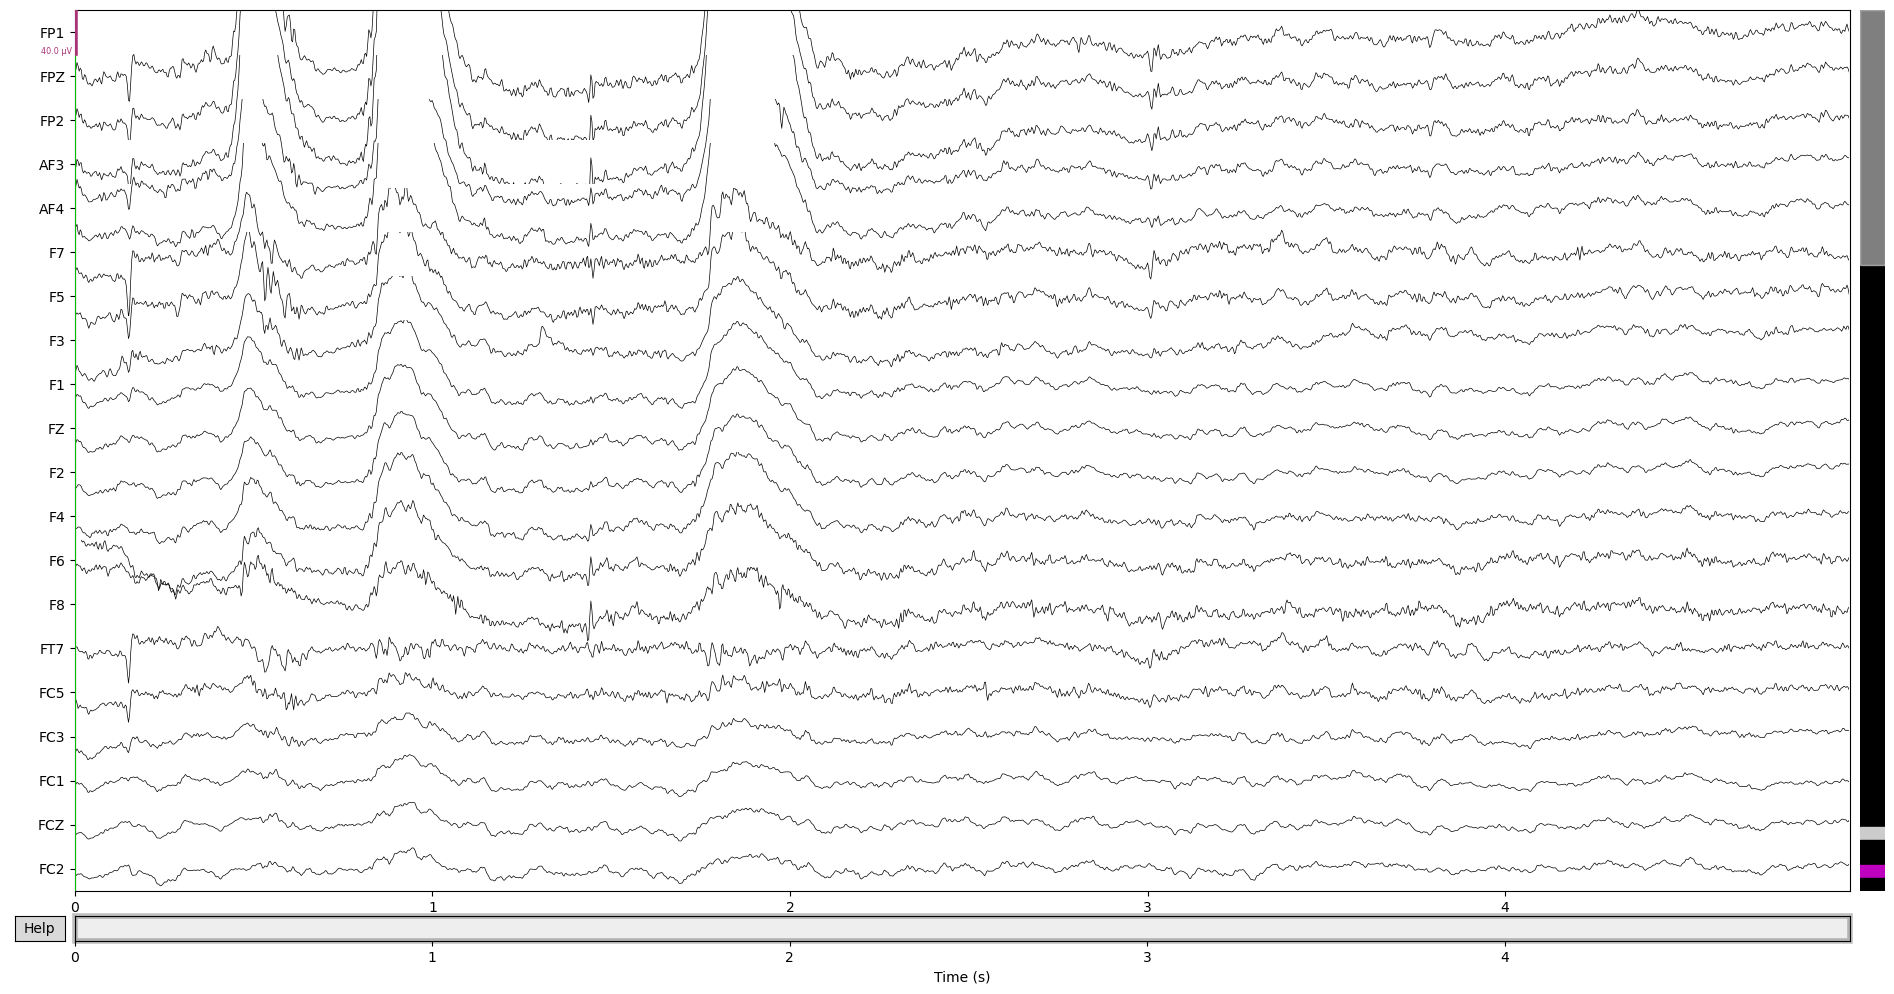

In [3]:
path=r'C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_00_tag1.raw.fif'
aux=os.path.join(path)
eeg=mne.io.read_raw_fif(aux,preload=True)
eeg.plot()

Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_00_tag1.raw.fif...
Isotrak not found
    Range : 15263 ... 20227 =     15.263 ...    20.227 secs
Ready.
Reading 0 ... 4964  =      0.000 ...     4.964 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Selecting by number: 57 components
Fitting ICA took 1.9s.


C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-4-c7e7fb7cbe88>:10: RuntimeWarning: filter_length (16384) is longer than the signal (4965), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 10 ICA components


<ipython-input-4-c7e7fb7cbe88>:10: RuntimeWarning: filter_length (16384) is longer than the signal (4965), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


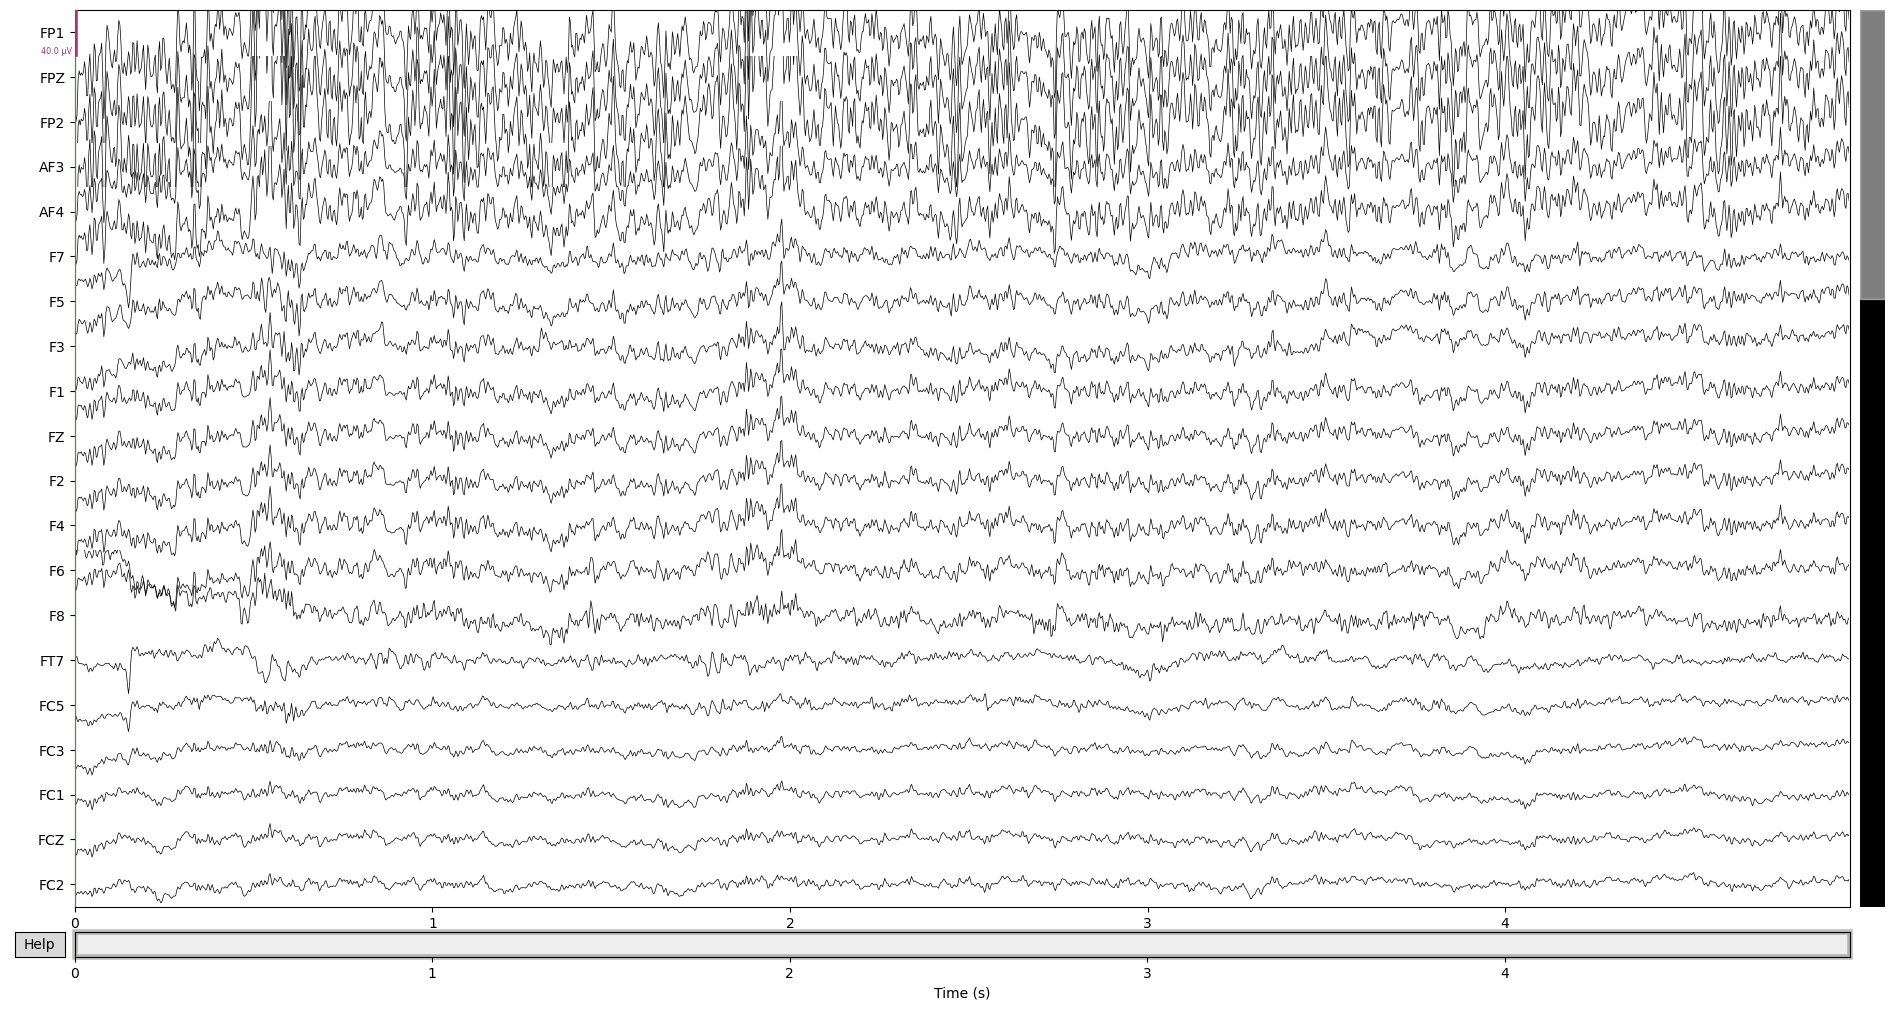

In [4]:
path=r'C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_00_tag1.raw.fif'
drop_ch = (['M1', 'M2','VEO', 'HEO', 'EKG', 'EMG', 'Trigger'])
ica = mne.preprocessing.ICA(n_components=57, random_state=0)
aux=os.path.join(path)
eeg=mne.io.read_raw_fif(aux,preload=True)
eeg.drop_channels(drop_ch)
ica.fit(eeg.copy().filter(0, 50))

# ica.plot_components(outlines="skirt");
bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)
eeg=ica.apply(eeg.copy(), exclude=bad_idx)
eeg.plot()

Effective window size : 2.048 (s)
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Effective window size : 2.048 (s)


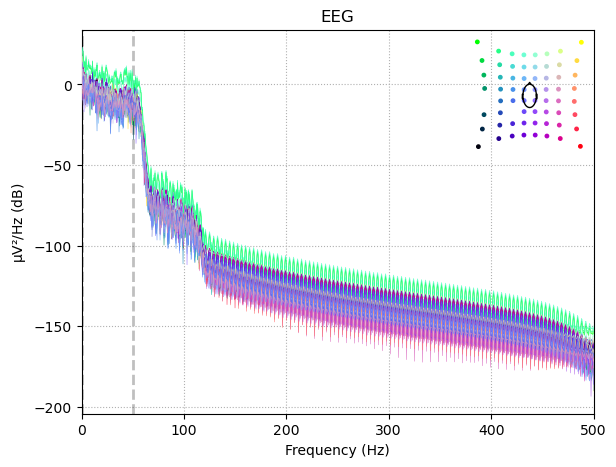

In [4]:
mne.viz.plot_raw_psd(eeg)

eeg.filter(None, 50, fir_design='firwin')
eeg.plot_psd(area_mode='range', tmax=10.0, average=False)


In [10]:
drop_ch = (['M1', 'M2','VEO', 'HEO', 'EKG', 'EMG', 'Trigger'])
# eeg.drop_channels(drop_ch)
# mne.viz.plot_raw(eeg)
#'FP1','FP2', 'FPZ', 'AF4', 'AF3

path=r'C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw'
fisiere=os.listdir(path)


drop_ch = (['M1', 'M2','VEO', 'HEO', 'EKG', 'EMG', 'Trigger'])
ica = mne.preprocessing.ICA(n_components=57, random_state=0)

covariatie = np.zeros((len(fisiere),62,62))

eeg_filtrat=[];
eeg_filtrat=np.zeros((len(fisiere),62,62))

for i,j in zip(fisiere,range(len(fisiere))):
    aux=os.path.join(path,i)
    if(aux[-4:len(aux)]=='.fif'):
        eeg=mne.io.read_raw_fif(aux,preload=True)
        eeg.drop_channels(drop_ch)
        ica.fit(eeg.copy().filter(0, 50))
        bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)
        
        eeg=ica.apply(eeg.copy(), exclude=bad_idx)
        eeg_filtrat=np.array(eeg[:][0])
        covariatie[j,:,:]=np.cov(eeg_filtrat)
#         eeg=np.array(eeg)
#         eeg_filtrat.append(eeg)
#         print(bad_idx)

# eeg_filtrat=np.array(eeg_filtrat)
np.save("eeg_filtrat.npy",covariatie)



Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_00_tag1.raw.fif...
Isotrak not found
    Range : 15263 ... 20227 =     15.263 ...    20.227 secs
Ready.
Reading 0 ... 4964  =      0.000 ...     4.964 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 H

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4965), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 10 ICA components
0
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_01_tag3.raw.fif...
Isotrak not found
    Range : 29856 ... 34827 =     29.856 ...    34.827 secs
Ready.
Reading 0 ... 4971  =      0.000 ...     4.971 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4965), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4972), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
1
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_02_tag3.raw.fif...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4972), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Isotrak not found
    Range : 45140 ... 50078 =     45.140 ...    50.078 secs
Ready.
Reading 0 ... 4938  =      0.000 ...     4.938 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.4s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (f

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4939), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
2
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_03_tag1.raw.fif...
Isotrak not found
    Range : 59607 ... 64561 =     59.607 ...    64.561 secs
Ready.
Reading 0 ... 4954  =      0.000 ...     4.954 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4939), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.4s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4955), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
3
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_04_tag0.raw.fif...
Isotrak not found
    Range : 74040 ... 78994 =     74.040 ...    78.994 secs
Ready.
Reading 0 ... 4954  =      0.000 ...     4.954 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4955), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.4s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4955), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
4
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_05_tag5.raw.fif...
Isotrak not found


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4955), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


    Range : 88136 ... 93092 =     88.136 ...    93.092 secs
Ready.
Reading 0 ... 4956  =      0.000 ...     4.956 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- H

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4957), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
5
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_06_tag6.raw.fif...
Isotrak not found
    Range : 102821 ... 107775 =    102.821 ...   107.775 secs
Ready.
Reading 0 ... 4954  =      0.000 ...     4.954 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4957), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4955), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
6
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_07_tag0.raw.fif...
Isotrak not found
    Range : 116857 ... 121807 =    116.857 ...   121.807 secs
Ready.
Reading 0 ... 4950  =      0.000 ...     4.950 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4955), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4951), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
7
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_08_tag6.raw.fif...
Isotrak not found
    Range : 130933 ... 135922 =    130.933 ...   135.922 secs
Ready.
Reading 0 ... 4989  =      0.000 ...     4.989 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4951), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4990), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
8
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_09_tag1.raw.fif...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4990), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Isotrak not found
    Range : 160554 ... 165506 =    160.554 ...   165.506 secs
Ready.
Reading 0 ... 4952  =      0.000 ...     4.952 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design 

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4953), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
9
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_100_tag8.raw.fif...
Isotrak not found
    Range : 2121975 ... 2126923 =   2121.975 ...  2126.923 secs
Ready.
Reading 0 ... 4948  =      0.000 ...     4.948 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4953), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.2s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4949), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 17 ICA components
10
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_101_tag7.raw.fif...
Isotrak not found
    Range : 2135958 ... 2140904 =   2135.958 ...  2140.904 secs
Ready.
Reading 0 ... 4946  =      0.000 ...     4.946 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4949), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4947), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
11
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_102_tag9.raw.fif...
Isotrak not found
    Range : 2149877 ... 2154836 =   2149.877 ...  2154.836 secs
Ready.
Reading 0 ... 4959  =      0.000 ...     4.959 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4947), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.3s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filt

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4960), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
12
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_103_tag9.raw.fif...
Isotrak not found
    Range : 2177857 ... 2182783 =   2177.857 ...  2182.783 secs
Ready.
Reading 0 ... 4926  =      0.000 ...     4.926 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4960), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4927), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
13
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_104_tag7.raw.fif...
Isotrak not found
    Range : 2192001 ... 2196948 =   2192.001 ...  2196.948 secs
Ready.
Reading 0 ... 4947  =      0.000 ...     4.947 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4927), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.4s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff freq

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4948), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
14
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_105_tag8.raw.fif...
Isotrak not found
    Range : 2206118 ... 2211080 =   2206.118 ...  2211.080 secs
Ready.


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4948), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Reading 0 ... 4962  =      0.000 ...     4.962 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4963), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
15
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_106_tag9.raw.fif...
Isotrak not found


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4963), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


    Range : 2220367 ... 2225295 =   2220.367 ...  2225.295 secs
Ready.
Reading 0 ... 4928  =      0.000 ...     4.928 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.6s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4929), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
16
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_107_tag9.raw.fif...
Isotrak not found
    Range : 2234245 ... 2239194 =   2234.245 ...  2239.194 secs
Ready.
Reading 0 ... 4949  =      0.000 ...     4.949 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4929), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4950), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
17
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_108_tag8.raw.fif...
Isotrak not found
    Range : 2248228 ... 2253175 =   2248.228 ...  2253.175 secs
Ready.
Reading 0 ... 4947  =      0.000 ...     4.947 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4950), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4948), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
18
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_109_tag7.raw.fif...
Isotrak not found
    Range : 2276642 ... 2281589 =   2276.642 ...  2281.589 secs
Ready.
Reading 0 ... 4947  =      0.000 ...     4.947 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4948), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequ

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4948), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
19
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_10_tag3.raw.fif...
Isotrak not found
    Range : 174986 ... 179955 =    174.986 ...   179.955 secs
Ready.
Reading 0 ... 4969  =      0.000 ...     4.969 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4948), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.2s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4970), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
20
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_110_tag8.raw.fif...
Isotrak not found


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4970), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


    Range : 2290626 ... 2295554 =   2290.626 ...  2295.554 secs
Ready.
Reading 0 ... 4928  =      0.000 ...     4.928 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4929), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
21
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_111_tag8.raw.fif...
Isotrak not found
    Range : 2305111 ... 2310054 =   2305.111 ...  2310.054 secs
Ready.


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4929), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Reading 0 ... 4943  =      0.000 ...     4.943 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.6s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4944), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 10 ICA components
22
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_112_tag10.raw.fif...
Isotrak not found
    Range : 2319006 ... 2323952 =   2319.006 ...  2323.952 secs
Ready.
Reading 0 ... 4946  =      0.000 ...     4.946 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4944), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.6s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4947), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
23
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_113_tag9.raw.fif...
Isotrak not found


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4947), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


    Range : 2361988 ... 2366899 =   2361.988 ...  2366.899 secs
Ready.
Reading 0 ... 4911  =      0.000 ...     4.911 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.3s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4912), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
24
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_114_tag10.raw.fif...
Isotrak not found
    Range : 2376086 ... 2381031 =   2376.086 ...  2381.031 secs
Ready.


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4912), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Reading 0 ... 4945  =      0.000 ...     4.945 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4946), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
25
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_115_tag10.raw.fif...
Isotrak not found
    Range : 2390349 ... 2395296 =   2390.349 ...  2395.296 secs
Ready.
Reading 0 ... 4947  =      0.000 ...     4.947 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4946), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.3s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4948), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
26
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_116_tag7.raw.fif...
Isotrak not found
    Range : 2413271 ... 2418215 =   2413.271 ...  2418.215 secs
Ready.


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4948), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Reading 0 ... 4944  =      0.000 ...     4.944 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.4s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4945), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
27
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_117_tag7.raw.fif...
Isotrak not found
    Range : 2427179 ... 2432146 =   2427.179 ...  2432.146 secs
Ready.


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4945), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Reading 0 ... 4967  =      0.000 ...     4.967 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4968), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
28
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_118_tag9.raw.fif...
Isotrak not found
    Range : 2454879 ... 2459826 =   2454.879 ...  2459.826 secs
Ready.
Reading 0 ... 4947  =      0.000 ...     4.947 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4968), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4948), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
29
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_11_tag0.raw.fif...
Isotrak not found
    Range : 189287 ... 194254 =    189.287 ...   194.254 secs
Ready.
Reading 0 ... 4967  =      0.000 ...     4.967 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4948), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.4s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4968), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
30
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_12_tag6.raw.fif...
Isotrak not found
    Range : 218302 ... 223253 =    218.302 ...   223.253 secs
Ready.
Reading 0 ... 4951  =      0.000 ...     4.951 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4968), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.2s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4952), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
31
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_13_tag3.raw.fif...
Isotrak not found
    Range : 246951 ... 251934 =    246.951 ...   251.934 secs
Ready.
Reading 0 ... 4983  =      0.000 ...     4.983 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4952), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4984), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
32
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_14_tag2.raw.fif...
Isotrak not found
    Range : 261200 ... 266133 =    261.200 ...   266.133 secs
Ready.
Reading 0 ... 4933  =      0.000 ...     4.933 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4984), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.2s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4934), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
33
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_15_tag6.raw.fif...
Isotrak not found
    Range : 289631 ... 294581 =    289.631 ...   294.581 secs
Ready.
Reading 0 ... 4950  =      0.000 ...     4.950 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4934), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4951), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
34
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_16_tag4.raw.fif...
Isotrak not found
    Range : 332462 ... 337411 =    332.462 ...   337.411 secs
Ready.
Reading 0 ... 4949  =      0.000 ...     4.949 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4951), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.3s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4950), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 9 ICA components
35
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_17_tag2.raw.fif...
Isotrak not found
    Range : 361410 ... 366360 =    361.410 ...   366.360 secs
Ready.
Reading 0 ... 4950  =      0.000 ...     4.950 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4950), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4951), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 16 ICA components
36
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_18_tag3.raw.fif...
Isotrak not found
    Range : 376005 ... 380959 =    376.005 ...   380.959 secs
Ready.
Reading 0 ... 4954  =      0.000 ...     4.954 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4951), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4955), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
37
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_19_tag5.raw.fif...
Isotrak not found
    Range : 390109 ... 395075 =    390.109 ...   395.075 secs
Ready.
Reading 0 ... 4966  =      0.000 ...     4.966 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4955), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.3s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4967), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
38
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_20_tag6.raw.fif...
Isotrak not found
    Range : 404708 ... 409658 =    404.708 ...   409.658 secs
Ready.
Reading 0 ... 4950  =      0.000 ...     4.950 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, ze

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4967), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4951), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
39
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_21_tag1.raw.fif...
Isotrak not found
    Range : 463575 ... 468524 =    463.575 ...   468.524 secs
Ready.
Reading 0 ... 4949  =      0.000 ...     4.949 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, ze

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4951), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.2s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4950), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
40
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_22_tag1.raw.fif...
Isotrak not found


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4950), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


    Range : 477788 ... 482739 =    477.788 ...   482.739 secs
Ready.
Reading 0 ... 4951  =      0.000 ...     4.951 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
-

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4952), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
41
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_23_tag3.raw.fif...
Isotrak not found
    Range : 520299 ... 525252 =    520.299 ...   525.252 secs
Ready.
Reading 0 ... 4953  =      0.000 ...     4.953 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, ze

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4952), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4954), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
42
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_24_tag4.raw.fif...
Isotrak not found
    Range : 563617 ... 568567 =    563.617 ...   568.567 secs
Ready.
Reading 0 ... 4950  =      0.000 ...     4.950 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, ze

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4954), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.3s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4951), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
43
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_25_tag0.raw.fif...
Isotrak not found
    Range : 592166 ... 597115 =    592.166 ...   597.115 secs
Ready.
Reading 0 ... 4949  =      0.000 ...     4.949 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4951), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4950), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 10 ICA components
44
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_26_tag4.raw.fif...
Isotrak not found
    Range : 632286 ... 637239 =    632.286 ...   637.239 secs
Ready.
Reading 0 ... 4953  =      0.000 ...     4.953 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, ze

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4950), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.6s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4954), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
45
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_27_tag1.raw.fif...
Isotrak not found
    Range : 647212 ... 652156 =    647.212 ...   652.156 secs
Ready.
Reading 0 ... 4944  =      0.000 ...     4.944 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4954), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4945), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
46
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_28_tag4.raw.fif...
Isotrak not found
    Range : 661255 ... 666221 =    661.255 ...   666.221 secs
Ready.
Reading 0 ... 4966  =      0.000 ...     4.966 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4945), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4967), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
47
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_29_tag5.raw.fif...
Isotrak not found
    Range : 675522 ... 680470 =    675.522 ...   680.470 secs
Ready.


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4967), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Reading 0 ... 4948  =      0.000 ...     4.948 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4949), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 10 ICA components
48
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_30_tag1.raw.fif...
Isotrak not found
    Range : 704252 ... 709185 =    704.252 ...   709.185 secs
Ready.
Reading 0 ... 4933  =      0.000 ...     4.933 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4949), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.2s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4934), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
49
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_31_tag2.raw.fif...
Isotrak not found
    Range : 732364 ... 737298 =    732.364 ...   737.298 secs
Ready.
Reading 0 ... 4934  =      0.000 ...     4.934 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4934), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4935), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
50
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_32_tag2.raw.fif...
Isotrak not found
    Range : 746697 ... 751647 =    746.697 ...   751.647 secs
Ready.
Reading 0 ... 4950  =      0.000 ...     4.950 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, ze

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4935), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4951), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
51
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_33_tag6.raw.fif...
Isotrak not found
    Range : 760648 ... 765596 =    760.648 ...   765.596 secs
Ready.
Reading 0 ... 4948  =      0.000 ...     4.948 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4951), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.3s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff freq

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4949), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
52
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_34_tag2.raw.fif...
Isotrak not found
    Range : 803829 ... 808760 =    803.829 ...   808.760 secs
Ready.
Reading 0 ... 4931  =      0.000 ...     4.931 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4949), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.4s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4932), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
53
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_35_tag3.raw.fif...
Isotrak not found
    Range : 817923 ... 822875 =    817.923 ...   822.875 secs
Ready.
Reading 0 ... 4952  =      0.000 ...     4.952 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, ze

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4932), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4953), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
54
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_36_tag1.raw.fif...
Isotrak not found
    Range : 832089 ... 837024 =    832.089 ...   837.024 secs
Ready.
Reading 0 ... 4935  =      0.000 ...     4.935 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, ze

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4953), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4936), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 16 ICA components
55
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_37_tag3.raw.fif...
Isotrak not found
    Range : 846340 ... 851272 =    846.340 ...   851.272 secs
Ready.
Reading 0 ... 4932  =      0.000 ...     4.932 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4936), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4933), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
56
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_38_tag4.raw.fif...
Isotrak not found
    Range : 860638 ... 865572 =    860.638 ...   865.572 secs
Ready.
Reading 0 ... 4934  =      0.000 ...     4.934 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4933), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.2s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4935), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
57
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_39_tag0.raw.fif...
Isotrak not found
    Range : 874870 ... 879837 =    874.870 ...   879.837 secs
Ready.
Reading 0 ... 4967  =      0.000 ...     4.967 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, ze

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4935), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4968), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
58
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_40_tag6.raw.fif...
Isotrak not found
    Range : 889357 ... 894286 =    889.357 ...   894.286 secs
Ready.
Reading 0 ... 4929  =      0.000 ...     4.929 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4968), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4930), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
59
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_41_tag5.raw.fif...
Isotrak not found
    Range : 903553 ... 908519 =    903.553 ...   908.519 secs
Ready.
Reading 0 ... 4966  =      0.000 ...     4.966 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4930), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.2s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequ

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4967), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
60
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_42_tag4.raw.fif...
Isotrak not found
    Range : 917800 ... 922734 =    917.800 ...   922.734 secs
Ready.
Reading 0 ... 4934  =      0.000 ...     4.934 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4967), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4935), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 16 ICA components
61
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_43_tag5.raw.fif...
Isotrak not found


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4935), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


    Range : 932084 ... 937033 =    932.084 ...   937.033 secs
Ready.
Reading 0 ... 4949  =      0.000 ...     4.949 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
-

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4950), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
62
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_44_tag1.raw.fif...
Isotrak not found
    Range : 946364 ... 951299 =    946.364 ...   951.299 secs
Ready.
Reading 0 ... 4935  =      0.000 ...     4.935 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4950), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.4s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4936), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
63
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_45_tag5.raw.fif...
Isotrak not found
    Range : 960481 ... 965448 =    960.481 ...   965.448 secs
Ready.
Reading 0 ... 4967  =      0.000 ...     4.967 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, ze

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4936), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4968), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
64
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_46_tag1.raw.fif...
Isotrak not found
    Range : 988814 ... 993761 =    988.814 ...   993.761 secs
Ready.
Reading 0 ... 4947  =      0.000 ...     4.947 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, ze

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4968), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4948), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 8 ICA components
65
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_47_tag2.raw.fif...
Isotrak not found
    Range : 1002911 ... 1007860 =   1002.911 ...  1007.860 secs
Ready.
Reading 0 ... 4949  =      0.000 ...     4.949 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4948), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.5s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4950), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
66
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_48_tag5.raw.fif...
Isotrak not found
    Range : 1017222 ... 1022193 =   1017.222 ...  1022.193 secs
Ready.
Reading 0 ... 4971  =      0.000 ...     4.971 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4950), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4972), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
67
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_49_tag6.raw.fif...
Isotrak not found


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4972), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


    Range : 1031458 ... 1036408 =   1031.458 ...  1036.408 secs
Ready.
Reading 0 ... 4950  =      0.000 ...     4.950 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4951), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
68
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_50_tag0.raw.fif...
Isotrak not found
    Range : 1060038 ... 1064989 =   1060.038 ...  1064.989 secs
Ready.
Reading 0 ... 4951  =      0.000 ...     4.951 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4951), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4952), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
69
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_51_tag1.raw.fif...
Isotrak not found
    Range : 1074374 ... 1079305 =   1074.374 ...  1079.305 secs
Ready.
Reading 0 ... 4931  =      0.000 ...     4.931 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4952), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4932), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
70
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_52_tag6.raw.fif...
Isotrak not found
    Range : 1088352 ... 1093320 =   1088.352 ...  1093.320 secs
Ready.
Reading 0 ... 4968  =      0.000 ...     4.968 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4932), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4969), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
71
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_53_tag0.raw.fif...
Isotrak not found
    Range : 1102703 ... 1107636 =   1102.703 ...  1107.636 secs
Ready.
Reading 0 ... 4933  =      0.000 ...     4.933 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4969), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4934), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
72
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_54_tag1.raw.fif...
Isotrak not found
    Range : 1117002 ... 1121951 =   1117.002 ...  1121.951 secs
Ready.
Reading 0 ... 4949  =      0.000 ...     4.949 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4934), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.5s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4950), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
73
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_55_tag3.raw.fif...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4950), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Isotrak not found
    Range : 1145285 ... 1150248 =   1145.285 ...  1150.248 secs
Ready.
Reading 0 ... 4963  =      0.000 ...     4.963 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.2s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain desig

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4964), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
74
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_56_tag5.raw.fif...
Isotrak not found
    Range : 1175182 ... 1180149 =   1175.182 ...  1180.149 secs
Ready.
Reading 0 ... 4967  =      0.000 ...     4.967 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, 

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4964), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.2s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4968), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
75
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_57_tag4.raw.fif...
Isotrak not found
    Range : 1189333 ... 1194298 =   1189.333 ...  1194.298 secs
Ready.
Reading 0 ... 4965  =      0.000 ...     4.965 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4968), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.2s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4966), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
76
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_58_tag0.raw.fif...
Isotrak not found
    Range : 1230172 ... 1235141 =   1230.172 ...  1235.141 secs
Ready.


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4966), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Reading 0 ... 4969  =      0.000 ...     4.969 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4970), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
77
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_59_tag6.raw.fif...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4970), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Isotrak not found
    Range : 1259910 ... 1264857 =   1259.910 ...  1264.857 secs
Ready.
Reading 0 ... 4947  =      0.000 ...     4.947 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.3s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain desig

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4948), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 10 ICA components
78
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_60_tag3.raw.fif...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4948), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Isotrak not found
    Range : 1274730 ... 1279658 =   1274.730 ...  1279.658 secs
Ready.
Reading 0 ... 4928  =      0.000 ...     4.928 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain desig

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4929), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
79
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_61_tag6.raw.fif...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4929), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Isotrak not found
    Range : 1289242 ... 1294174 =   1289.242 ...  1294.174 secs
Ready.
Reading 0 ... 4932  =      0.000 ...     4.932 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.5s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain desig

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4933), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 16 ICA components
80
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_62_tag0.raw.fif...
Isotrak not found
    Range : 1303660 ... 1308590 =   1303.660 ...  1308.590 secs
Ready.
Reading 0 ... 4930  =      0.000 ...     4.930 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, 

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4933), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)



Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.4s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4931), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 9 ICA components
81
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_63_tag1.raw.fif...
Isotrak not found
    Range : 1332842 ... 1337773 =   1332.842 ...  1337.773 secs
Ready.
Reading 0 ... 4931  =      0.000 ...     4.931 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4931), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4932), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
82
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_64_tag5.raw.fif...
Isotrak not found
    Range : 1361591 ... 1366504 =   1361.591 ...  1366.504 secs
Ready.
Reading 0 ... 4913  =      0.000 ...     4.913 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, 

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4932), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4914), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
83
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_65_tag2.raw.fif...
Isotrak not found
    Range : 1376071 ... 1381020 =   1376.071 ...  1381.020 secs
Ready.
Reading 0 ... 4949  =      0.000 ...     4.949 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, 

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4914), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4950), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
84
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_66_tag0.raw.fif...
Isotrak not found
    Range : 1390474 ... 1395453 =   1390.474 ...  1395.453 secs
Ready.
Reading 0 ... 4979  =      0.000 ...     4.979 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4950), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.2s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4980), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
85
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_67_tag4.raw.fif...
Isotrak not found
    Range : 1419391 ... 1424351 =   1419.391 ...  1424.351 secs
Ready.
Reading 0 ... 4960  =      0.000 ...     4.960 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, 

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4980), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.6s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4961), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 8 ICA components
86
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_68_tag2.raw.fif...
Isotrak not found
    Range : 1433602 ... 1438550 =   1433.602 ...  1438.550 secs
Ready.
Reading 0 ... 4948  =      0.000 ...     4.948 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4961), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4949), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
87
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_69_tag3.raw.fif...
Isotrak not found
    Range : 1462104 ... 1467031 =   1462.104 ...  1467.031 secs
Ready.
Reading 0 ... 4927  =      0.000 ...     4.927 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4949), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.3s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4928), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
88
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_70_tag0.raw.fif...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4928), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Isotrak not found
    Range : 1476333 ... 1481297 =   1476.333 ...  1481.297 secs
Ready.
Reading 0 ... 4964  =      0.000 ...     4.964 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain desig

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4965), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
89
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_71_tag2.raw.fif...
Isotrak not found
    Range : 1490735 ... 1495679 =   1490.735 ...  1495.679 secs
Ready.
Reading 0 ... 4944  =      0.000 ...     4.944 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, 

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4965), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4945), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
90
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_72_tag0.raw.fif...
Isotrak not found
    Range : 1505012 ... 1509978 =   1505.012 ...  1509.978 secs
Ready.
Reading 0 ... 4966  =      0.000 ...     4.966 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4945), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.3s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4967), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
91
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_73_tag4.raw.fif...
Isotrak not found
    Range : 1533501 ... 1538459 =   1533.501 ...  1538.459 secs
Ready.
Reading 0 ... 4958  =      0.000 ...     4.958 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4967), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4959), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
92
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_74_tag4.raw.fif...
Isotrak not found
    Range : 1547859 ... 1552808 =   1547.859 ...  1552.808 secs
Ready.
Reading 0 ... 4949  =      0.000 ...     4.949 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, 

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4959), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.5s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4950), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
93
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_75_tag5.raw.fif...
Isotrak not found
    Range : 1562164 ... 1567091 =   1562.164 ...  1567.091 secs
Ready.


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4950), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Reading 0 ... 4927  =      0.000 ...     4.927 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4928), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
94
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_76_tag10.raw.fif...
Isotrak not found
    Range : 1591279 ... 1596240 =   1591.279 ...  1596.240 secs
Ready.
Reading 0 ... 4961  =      0.000 ...     4.961 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass,

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4928), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4962), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
95
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_77_tag10.raw.fif...
Isotrak not found
    Range : 1606242 ... 1611174 =   1606.242 ...  1611.174 secs
Ready.
Reading 0 ... 4932  =      0.000 ...     4.932 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4962), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4933), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
96
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_78_tag7.raw.fif...
Isotrak not found
    Range : 1621326 ... 1626274 =   1621.326 ...  1626.274 secs
Ready.


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4933), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Reading 0 ... 4948  =      0.000 ...     4.948 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4949), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 16 ICA components
97
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_79_tag9.raw.fif...
Isotrak not found
    Range : 1636193 ... 1641158 =   1636.193 ...  1641.158 secs
Ready.
Reading 0 ... 4965  =      0.000 ...     4.965 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, 

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4949), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)



Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4966), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
98
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_80_tag7.raw.fif...
Isotrak not found
    Range : 1650578 ... 1655507 =   1650.578 ...  1655.507 secs
Ready.
Reading 0 ... 4929  =      0.000 ...     4.929 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, 

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4966), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4930), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
99
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_81_tag8.raw.fif...
Isotrak not found
    Range : 1682653 ... 1687596 =   1682.653 ...  1687.596 secs
Ready.
Reading 0 ... 4943  =      0.000 ...     4.943 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, 

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4930), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.2s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4944), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 16 ICA components
100
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_82_tag8.raw.fif...
Isotrak not found
    Range : 1696678 ... 1701645 =   1696.678 ...  1701.645 secs
Ready.
Reading 0 ... 4967  =      0.000 ...     4.967 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4944), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.4s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4968), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
101
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_83_tag9.raw.fif...
Isotrak not found
    Range : 1724945 ... 1729909 =   1724.945 ...  1729.909 secs
Ready.
Reading 0 ... 4964  =      0.000 ...     4.964 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4968), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4965), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
102
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_84_tag7.raw.fif...
Isotrak not found
    Range : 1782295 ... 1787239 =   1782.295 ...  1787.239 secs
Ready.
Reading 0 ... 4944  =      0.000 ...     4.944 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass,

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4965), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4945), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
103
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_85_tag10.raw.fif...
Isotrak not found
    Range : 1797107 ... 1802038 =   1797.107 ...  1802.038 secs
Ready.
Reading 0 ... 4931  =      0.000 ...     4.931 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4945), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4932), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
104
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_86_tag8.raw.fif...
Isotrak not found
    Range : 1837534 ... 1842480 =   1837.534 ...  1842.480 secs
Ready.
Reading 0 ... 4946  =      0.000 ...     4.946 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4932), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.6s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filt

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4947), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
105
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_87_tag10.raw.fif...
Isotrak not found


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4947), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


    Range : 1851433 ... 1856378 =   1851.433 ...  1856.378 secs
Ready.
Reading 0 ... 4945  =      0.000 ...     4.945 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4946), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
106
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_88_tag9.raw.fif...
Isotrak not found
    Range : 1865528 ... 1870477 =   1865.528 ...  1870.477 secs
Ready.
Reading 0 ... 4949  =      0.000 ...     4.949 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4946), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4950), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
107
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_89_tag7.raw.fif...
Isotrak not found
    Range : 1879559 ... 1884508 =   1879.559 ...  1884.508 secs


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4950), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Ready.
Reading 0 ... 4949  =      0.000 ...     4.949 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4950), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
108
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_90_tag7.raw.fif...
Isotrak not found
    Range : 1907927 ... 1912856 =   1907.927 ...  1912.856 secs
Ready.
Reading 0 ... 4929  =      0.000 ...     4.929 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4950), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequ

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4930), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
109
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_91_tag10.raw.fif...
Isotrak not found
    Range : 1922372 ... 1927288 =   1922.372 ...  1927.288 secs
Ready.
Reading 0 ... 4916  =      0.000 ...     4.916 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4930), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.6s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4917), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
110
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_92_tag9.raw.fif...
Isotrak not found
    Range : 1936307 ... 1941253 =   1936.307 ...  1941.253 secs
Ready.
Reading 0 ... 4946  =      0.000 ...     4.946 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4917), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4947), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
111
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_93_tag8.raw.fif...
Isotrak not found
    Range : 1950322 ... 1955268 =   1950.322 ...  1955.268 secs
Ready.
Reading 0 ... 4946  =      0.000 ...     4.946 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4947), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4947), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
112
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_94_tag8.raw.fif...
Isotrak not found
    Range : 1964469 ... 1969417 =   1964.469 ...  1969.417 secs
Ready.
Reading 0 ... 4948  =      0.000 ...     4.948 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4947), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4949), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
113
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_95_tag9.raw.fif...
Isotrak not found
    Range : 1978701 ... 1983632 =   1978.701 ...  1983.632 secs
Ready.
Reading 0 ... 4931  =      0.000 ...     4.931 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass,

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4949), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4932), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
114

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4932), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)



Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_96_tag10.raw.fif...
Isotrak not found
    Range : 2007666 ... 2012631 =   2007.666 ...  2012.631 secs
Ready.
Reading 0 ... 4965  =      0.000 ...     4.965 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4966), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
115
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_97_tag10.raw.fif...
Isotrak not found
    Range : 2021833 ... 2026796 =   2021.833 ...  2026.796 secs
Ready.
Reading 0 ... 4963  =      0.000 ...     4.963 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4966), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4964), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 10 ICA components
116
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_98_tag7.raw.fif...
Isotrak not found
    Range : 2036164 ... 2041112 =   2036.164 ...  2041.112 secs
Ready.
Reading 0 ... 4948  =      0.000 ...     4.948 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4964), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4949), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 19 ICA components
117
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_99_tag7.raw.fif...
Isotrak not found
    Range : 2093407 ... 2098375 =   2093.407 ...  2098.375 secs
Ready.
Reading 0 ... 4968  =      0.000 ...     4.968 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4949), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.3s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4969), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 10 ICA components
118
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_00_tag5.raw.fif...
Isotrak not found
    Range : 12910 ... 17909 =     12.910 ...    17.909 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4969), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.5s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
119
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_01_tag0.raw.fif...
Isotrak not found
    Range : 27616 ... 32615 =     27.616 ...    32.615 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zer

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
120
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_02_tag5.raw.fif...
Isotrak not found
    Range : 42752 ... 47751 =     42.752 ...    47.751 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zer

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 16 ICA components
121
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_03_tag6.raw.fif...
Isotrak not found
    Range : 57348 ... 62347 =     57.348 ...    62.347 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zer

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
122
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_04_tag3.raw.fif...
Isotrak not found
    Range : 72364 ... 77363 =     72.364 ...    77.363 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequ

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
123
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_05_tag1.raw.fif...
Isotrak not found
    Range : 86901 ... 91900 =     86.901 ...    91.900 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 17 ICA components
124
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_06_tag5.raw.fif...
Isotrak not found
    Range : 101312 ... 106311 =    101.312 ...   106.311 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
125
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_07_tag3.raw.fif...
Isotrak not found


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


    Range : 116317 ... 121316 =    116.317 ...   121.316 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
-

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 18 ICA components
126
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_08_tag5.raw.fif...
Isotrak not found
    Range : 130645 ... 135645 =    130.645 ...   135.645 secs
Ready.
Reading 0 ... 5000  =      0.000 ...     5.000 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, z

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5001), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 17 ICA components
127
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_09_tag5.raw.fif...
Isotrak not found
    Range : 144983 ... 149982 =    144.983 ...   149.982 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, z

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5001), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
128
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_100_tag7.raw.fif...
Isotrak not found
    Range : 1812253 ... 1817252 =   1812.253 ...  1817.252 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
129
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_101_tag7.raw.fif...
Isotrak not found
    Range : 1826151 ... 1831150 =   1826.151 ...  1831.150 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 18 ICA components
130
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_102_tag7.raw.fif...
Isotrak not found
    Range : 1840316 ... 1845315 =   1840.316 ...  1845.315 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
131
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_103_tag10.raw.fif...
Isotrak not found
    Range : 1854182 ... 1859181 =   1854.182 ...  1859.181 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pas

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
132
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_104_tag9.raw.fif...
Isotrak not found
    Range : 1881840 ... 1886839 =   1881.840 ...  1886.839 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
133
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_105_tag8.raw.fif...
Isotrak not found
    Range : 1912259 ... 1917258 =   1912.259 ...  1917.258 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)



Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
134
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_106_tag10.raw.fif...
Isotrak not found
    Range : 1925859 ... 1930858 =   1925.859 ...  1930.858 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pas

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.3s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
135
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_107_tag10.raw.fif...
Isotrak not found


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


    Range : 1939808 ... 1944807 =   1939.808 ...  1944.807 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
136
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_108_tag10.raw.fif...
Isotrak not found
    Range : 1953790 ... 1958789 =   1953.790 ...  1958.789 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pas

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 9 ICA components
137
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_109_tag10.raw.fif...
Isotrak not found
    Range : 1967956 ... 1972955 =   1967.956 ...  1972.955 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 16 ICA components
138
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_10_tag3.raw.fif...
Isotrak not found
    Range : 159629 ... 164628 =    159.629 ...   164.628 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.2s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 17 ICA components
139
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_110_tag7.raw.fif...
Isotrak not found
    Range : 1981866 ... 1986865 =   1981.866 ...  1986.865 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 8 ICA components
140
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_111_tag9.raw.fif...
Isotrak not found
    Range : 1996379 ... 2001378 =   1996.379 ...  2001.378 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
141
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_112_tag9.raw.fif...
Isotrak not found


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


    Range : 2010602 ... 2015601 =   2010.602 ...  2015.601 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 9 ICA components
142
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_113_tag7.raw.fif...
Isotrak not found
    Range : 2024516 ... 2029515 =   2024.516 ...  2029.515 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
143
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_114_tag8.raw.fif...
Isotrak not found
    Range : 2038411 ... 2043410 =   2038.411 ...  2043.410 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
144
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_115_tag9.raw.fif...
Isotrak not found
    Range : 2052228 ... 2057228 =   2052.228 ...  2057.228 secs
Ready.
Reading 0 ... 5000  =      0.000 ...     5.000 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)



Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5001), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 16 ICA components
145
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_11_tag6.raw.fif...
Isotrak not found
    Range : 173998 ... 178997 =    173.998 ...   178.997 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5001), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 10 ICA components
146
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_12_tag0.raw.fif...
Isotrak not found
    Range : 188363 ... 193362 =    188.363 ...   193.362 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.6s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filt

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
147
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_13_tag4.raw.fif...
Isotrak not found
    Range : 202813 ... 207812 =    202.813 ...   207.812 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, z

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.4s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
148
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_14_tag3.raw.fif...
Isotrak not found
    Range : 217647 ... 222646 =    217.647 ...   222.646 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 16 ICA components
149
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_15_tag3.raw.fif...
Isotrak not found
    Range : 246211 ... 251210 =    246.211 ...   251.210 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.4s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
150
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_16_tag6.raw.fif...
Isotrak not found
    Range : 260527 ... 265526 =    260.527 ...   265.526 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, z

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)



Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 16 ICA components
151
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_17_tag4.raw.fif...
Isotrak not found
    Range : 288817 ... 293816 =    288.817 ...   293.816 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.4s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
152
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_18_tag5.raw.fif...
Isotrak not found
    Range : 302856 ... 307855 =    302.856 ...   307.855 secs


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.2s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
153
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_19_tag3.raw.fif...
Isotrak not found
    Range : 317034 ... 322033 =    317.034 ...   322.033 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, z

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
154
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_20_tag2.raw.fif...
Isotrak not found


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


    Range : 331249 ... 336248 =    331.249 ...   336.248 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.4s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
-

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
155
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_21_tag6.raw.fif...
Isotrak not found


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


    Range : 345461 ... 350460 =    345.461 ...   350.460 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.2s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
-

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
156
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_22_tag1.raw.fif...
Isotrak not found
    Range : 360097 ... 365096 =    360.097 ...   365.096 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequ

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
157
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_23_tag0.raw.fif...
Isotrak not found
    Range : 374318 ... 379317 =    374.318 ...   379.317 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.3s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
158
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_24_tag6.raw.fif...
Isotrak not found
    Range : 388543 ... 393542 =    388.543 ...   393.542 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
159
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_25_tag4.raw.fif...
Isotrak not found
    Range : 402866 ... 407865 =    402.866 ...   407.865 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, z

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
160
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_26_tag2.raw.fif...
Isotrak not found
    Range : 416891 ... 421890 =    416.891 ...   421.890 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.3s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 18 ICA components
161
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_27_tag3.raw.fif...
Isotrak not found


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


    Range : 430921 ... 435920 =    430.921 ...   435.920 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.5s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
-

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
162
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_28_tag0.raw.fif...
Isotrak not found
    Range : 445311 ... 450310 =    445.311 ...   450.310 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.2s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 16 ICA components
163
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_29_tag0.raw.fif...
Isotrak not found


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


    Range : 459477 ... 464476 =    459.477 ...   464.476 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
-

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
164
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_30_tag5.raw.fif...
Isotrak not found
    Range : 474009 ... 479008 =    474.009 ...   479.008 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.4s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filt

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
165
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_31_tag4.raw.fif...
Isotrak not found
    Range : 502504 ... 507503 =    502.504 ...   507.503 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, z

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
166
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_32_tag2.raw.fif...
Isotrak not found
    Range : 516505 ... 521504 =    516.505 ...   521.504 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
167
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_33_tag1.raw.fif...
Isotrak not found
    Range : 530804 ... 535803 =    530.804 ...   535.803 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, z

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.3s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
168
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_34_tag0.raw.fif...
Isotrak not found
    Range : 545304 ... 550303 =    545.304 ...   550.303 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.6s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
169
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_35_tag3.raw.fif...
Isotrak not found
    Range : 559545 ... 564544 =    559.545 ...   564.544 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
170
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_36_tag6.raw.fif...
Isotrak not found
    Range : 573749 ... 578748 =    573.749 ...   578.748 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, z

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
171
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_37_tag2.raw.fif...
Isotrak not found
    Range : 587993 ... 592992 =    587.993 ...   592.992 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.3s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff freq

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
172
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_38_tag2.raw.fif...
Isotrak not found
    Range : 781615 ... 786614 =    781.615 ...   786.614 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, z

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
173
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_39_tag3.raw.fif...
Isotrak not found
    Range : 795848 ... 800847 =    795.848 ...   800.847 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, z

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
174
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_40_tag6.raw.fif...
Isotrak not found
    Range : 810437 ... 815436 =    810.437 ...   815.436 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequ

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
175
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_41_tag0.raw.fif...
Isotrak not found
    Range : 833556 ... 838555 =    833.556 ...   838.555 secs
Ready.


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
176
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_42_tag3.raw.fif...
Isotrak not found
    Range : 848032 ... 853031 =    848.032 ...   853.031 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequ

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 10 ICA components
177
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_43_tag1.raw.fif...
Isotrak not found
    Range : 863006 ... 868005 =    863.006 ...   868.005 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
178
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_44_tag5.raw.fif...
Isotrak not found
    Range : 877281 ... 882280 =    877.281 ...   882.280 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, z

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
179
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_45_tag0.raw.fif...
Isotrak not found
    Range : 891738 ... 896737 =    891.738 ...   896.737 secs
Ready.


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
180
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_46_tag3.raw.fif...
Isotrak not found
    Range : 906164 ... 911163 =    906.164 ...   911.163 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 16 ICA components
181
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_47_tag4.raw.fif...
Isotrak not found
    Range : 934911 ... 939910 =    934.911 ...   939.910 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequ

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
182
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_48_tag1.raw.fif...
Isotrak not found
    Range : 949227 ... 954226 =    949.227 ...   954.226 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, z

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.5s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
183
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_49_tag0.raw.fif...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Isotrak not found
    Range : 963717 ... 968716 =    963.717 ...   968.716 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design 

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
184
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_50_tag3.raw.fif...
Isotrak not found
    Range : 1019056 ... 1024055 =   1019.056 ...  1024.055 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass,

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
185
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_51_tag0.raw.fif...
Isotrak not found
    Range : 1033208 ... 1038207 =   1033.208 ...  1038.207 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 sampl

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
186

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)



Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_52_tag2.raw.fif...
Isotrak not found
    Range : 1047641 ... 1052640 =   1047.641 ...  1052.640 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
----------

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
187
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_53_tag1.raw.fif...
Isotrak not found
    Range : 1062015 ... 1067014 =   1062.015 ...  1067.014 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass,

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.3s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
188
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_54_tag5.raw.fif...
Isotrak not found
    Range : 1076181 ... 1081180 =   1076.181 ...  1081.180 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 sampl

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
189
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_55_tag2.raw.fif...
Isotrak not found
    Range : 1090771 ... 1095770 =   1090.771 ...  1095.770 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
190
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_56_tag2.raw.fif...
Isotrak not found
    Range : 1104950 ... 1109949 =   1104.950 ...  1109.949 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.4s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 17 ICA components
191
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_57_tag4.raw.fif...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Isotrak not found
    Range : 1119115 ... 1124114 =   1119.115 ...  1124.114 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain desig

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
192
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_58_tag1.raw.fif...
Isotrak not found
    Range : 1133193 ... 1138192 =   1133.193 ...  1138.192 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.3s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 18 ICA components
193
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_59_tag4.raw.fif...
Isotrak not found
    Range : 1147465 ... 1152464 =   1147.465 ...  1152.464 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
194
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_60_tag1.raw.fif...
Isotrak not found
    Range : 1190155 ... 1195154 =   1190.155 ...  1195.154 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass,

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
195
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_61_tag1.raw.fif...
Isotrak not found
    Range : 1204404 ... 1209403 =   1204.404 ...  1209.403 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 16 ICA components
196
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_62_tag1.raw.fif...
Isotrak not found
    Range : 1233238 ... 1238237 =   1233.238 ...  1238.237 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass,

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
197
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_63_tag4.raw.fif...
Isotrak not found
    Range : 1247509 ... 1252508 =   1247.509 ...  1252.508 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass,

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
198
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_64_tag4.raw.fif...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Isotrak not found
    Range : 1261784 ... 1266783 =   1261.784 ...  1266.783 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain desig

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
199
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_65_tag6.raw.fif...
Isotrak not found
    Range : 1276257 ... 1281256 =   1276.257 ...  1281.256 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass,

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
200

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)



Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_66_tag1.raw.fif...
Isotrak not found
    Range : 1290539 ... 1295538 =   1290.539 ...  1295.538 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
----------

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
201
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_67_tag6.raw.fif...
Isotrak not found
    Range : 1304631 ... 1309630 =   1304.631 ...  1309.630 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass,

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 16 ICA components
202
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_68_tag6.raw.fif...
Isotrak not found
    Range : 1349732 ... 1354731 =   1349.732 ...  1354.731 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.4s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
203
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_69_tag2.raw.fif...
Isotrak not found
    Range : 1363655 ... 1368654 =   1363.655 ...  1368.654 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 17 ICA components
204
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_70_tag7.raw.fif...
Isotrak not found
    Range : 1377603 ... 1382602 =   1377.603 ...  1382.602 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass,

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.6s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
205
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_71_tag8.raw.fif...
Isotrak not found
    Range : 1391778 ... 1396777 =   1391.778 ...  1396.777 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass,

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
206
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_72_tag10.raw.fif...
Isotrak not found
    Range : 1405784 ... 1410783 =   1405.784 ...  1410.783 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
207
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_73_tag7.raw.fif...
Isotrak not found
    Range : 1419615 ... 1424614 =   1419.615 ...  1424.614 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass,

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
208
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_74_tag10.raw.fif...
Isotrak not found
    Range : 1434027 ... 1439026 =   1434.027 ...  1439.026 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
209
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_75_tag10.raw.fif...
Isotrak not found
    Range : 1448222 ... 1453221 =   1448.222 ...  1453.221 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
210
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_76_tag8.raw.fif...
Isotrak not found
    Range : 1462156 ... 1467155 =   1462.156 ...  1467.155 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass,

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.6s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
211
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_77_tag8.raw.fif...
Isotrak not found


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


    Range : 1476127 ... 1481126 =   1476.127 ...  1481.126 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 16 ICA components
212
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_78_tag9.raw.fif...
Isotrak not found
    Range : 1490225 ... 1495224 =   1490.225 ...  1495.224 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
213
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_79_tag10.raw.fif...
Isotrak not found
    Range : 1504156 ... 1509155 =   1504.156 ...  1509.155 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 17 ICA components
214
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_80_tag8.raw.fif...
Isotrak not found
    Range : 1518020 ... 1523019 =   1518.020 ...  1523.019 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass,

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.6s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
215
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_81_tag7.raw.fif...
Isotrak not found
    Range : 1531902 ... 1536901 =   1531.902 ...  1536.901 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.2s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
216
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_82_tag7.raw.fif...
Isotrak not found
    Range : 1546010 ... 1551009 =   1546.010 ...  1551.009 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass,

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.4s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
217
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_83_tag9.raw.fif...
Isotrak not found
    Range : 1559642 ... 1564641 =   1559.642 ...  1564.641 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass,

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.6s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
218
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_84_tag10.raw.fif...
Isotrak not found
    Range : 1573405 ... 1578404 =   1573.405 ...  1578.404 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
219
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_85_tag9.raw.fif...
Isotrak not found
    Range : 1587508 ... 1592507 =   1587.508 ...  1592.507 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass,

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 16 ICA components
220
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_86_tag9.raw.fif...
Isotrak not found


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


    Range : 1601526 ... 1606525 =   1601.526 ...  1606.525 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
221
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_87_tag8.raw.fif...
Isotrak not found
    Range : 1615901 ... 1620900 =   1615.901 ...  1620.900 secs
Ready.


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 19 ICA components
222
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_88_tag7.raw.fif...
Isotrak not found
    Range : 1630041 ... 1635040 =   1630.041 ...  1635.040 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.6s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 sampl

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
223
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_89_tag8.raw.fif...
Isotrak not found
    Range : 1643905 ... 1648904 =   1643.905 ...  1648.904 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 18 ICA components
224
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_90_tag7.raw.fif...
Isotrak not found


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


    Range : 1658050 ... 1663049 =   1658.050 ...  1663.049 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
225
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_91_tag10.raw.fif...
Isotrak not found
    Range : 1685512 ... 1690511 =   1685.512 ...  1690.511 secs
Ready.


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.3s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 18 ICA components
226
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_92_tag9.raw.fif...
Isotrak not found
    Range : 1699411 ... 1704410 =   1699.411 ...  1704.410 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.4s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
227
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_93_tag9.raw.fif...
Isotrak not found
    Range : 1713391 ... 1718390 =   1713.391 ...  1718.390 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
228
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_94_tag8.raw.fif...
Isotrak not found
    Range : 1727521 ... 1732520 =   1727.521 ...  1732.520 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
229
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_95_tag8.raw.fif...
Isotrak not found
    Range : 1741786 ... 1746785 =   1741.786 ...  1746.785 secs
Ready.


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
230
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_96_tag8.raw.fif...
Isotrak not found
    Range : 1756009 ... 1761008 =   1756.009 ...  1761.008 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass,

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.2s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
231
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_97_tag10.raw.fif...
Isotrak not found
    Range : 1770104 ... 1775103 =   1770.104 ...  1775.103 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Transforming to ICA space (57 components)
Zeroing out 14 ICA components
232
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_98_tag7.raw.fif...
Isotrak not found
    Range : 1784165 ... 1789148 =   1784.165 ...  1789.148 secs
Ready.
Reading 0 ... 4983  =      0.000 ...     4.983 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
S

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4984), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
233
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM10_99_tag9.raw.fif...
Isotrak not found
    Range : 1798298 ... 1803297 =   1798.298 ...  1803.297 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4984), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.5s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
234
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_00_tag0.raw.fif...
Isotrak not found
    Range : 33321 ... 38326 =     33.321 ...    38.326 secs
Ready.
Reading 0 ... 5005  =      0.000 ...     5.005 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.3s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5006), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
235
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_01_tag6.raw.fif...
Isotrak not found
    Range : 47670 ... 52708 =     47.670 ...    52.708 secs
Ready.
Reading 0 ... 5038  =      0.000 ...     5.038 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zer

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5006), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5039), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
236
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_02_tag6.raw.fif...
Isotrak not found
    Range : 101726 ... 106730 =    101.726 ...   106.730 secs
Ready.
Reading 0 ... 5004  =      0.000 ...     5.004 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5039), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5005), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 16 ICA components
237
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_03_tag0.raw.fif...
Isotrak not found
    Range : 116460 ... 121480 =    116.460 ...   121.480 secs
Ready.
Reading 0 ... 5020  =      0.000 ...     5.020 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5005), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5021), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
238
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_04_tag6.raw.fif...
Isotrak not found
    Range : 131494 ... 136530 =    131.494 ...   136.530 secs
Ready.
Reading 0 ... 5036  =      0.000 ...     5.036 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5021), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5037), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 17 ICA components
239
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_05_tag4.raw.fif...
Isotrak not found


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5037), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


    Range : 145893 ... 150896 =    145.893 ...   150.896 secs
Ready.
Reading 0 ... 5003  =      0.000 ...     5.003 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.6s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
-

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5004), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 17 ICA components
240
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_06_tag4.raw.fif...
Isotrak not found
    Range : 160459 ... 165479 =    160.459 ...   165.479 secs
Ready.
Reading 0 ... 5020  =      0.000 ...     5.020 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5004), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5021), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
241
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_07_tag3.raw.fif...
Isotrak not found
    Range : 174825 ... 179844 =    174.825 ...   179.844 secs
Ready.
Reading 0 ... 5019  =      0.000 ...     5.019 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5021), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.5s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5020), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
242
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_08_tag5.raw.fif...
Isotrak not found
    Range : 189225 ... 194243 =    189.225 ...   194.243 secs
Ready.
Reading 0 ... 5018  =      0.000 ...     5.018 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5020), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.4s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5019), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
243
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_09_tag0.raw.fif...
Isotrak not found
    Range : 203223 ... 208242 =    203.223 ...   208.242 secs
Ready.
Reading 0 ... 5019  =      0.000 ...     5.019 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5019), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5020), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 18 ICA components
244
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_100_tag7.raw.fif...
Isotrak not found
    Range : 1898308 ... 1903319 =   1898.308 ...  1903.319 secs
Ready.
Reading 0 ... 5011  =      0.000 ...     5.011 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5020), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5012), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
245
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_101_tag7.raw.fif...
Isotrak not found
    Range : 1912591 ... 1917585 =   1912.591 ...  1917.585 secs


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5012), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Ready.
Reading 0 ... 4994  =      0.000 ...     4.994 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4995), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 16 ICA components
246
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_102_tag10.raw.fif...
Isotrak not found
    Range : 1926839 ... 1931834 =   1926.839 ...  1931.834 secs
Ready.
Reading 0 ... 4995  =      0.000 ...     4.995 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4995), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.6s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4996), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
247
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_103_tag10.raw.fif...
Isotrak not found
    Range : 1941473 ... 1946467 =   1941.473 ...  1946.467 secs
Ready.
Reading 0 ... 4994  =      0.000 ...     4.994 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4996), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.3s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4995), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
248
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_104_tag9.raw.fif...
Isotrak not found
    Range : 1955688 ... 1960699 =   1955.688 ...  1960.699 secs
Ready.
Reading 0 ... 5011  =      0.000 ...     5.011 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4995), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5012), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
249
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_105_tag8.raw.fif...
Isotrak not found
    Range : 1970053 ... 1975081 =   1970.053 ...  1975.081 secs
Ready.
Reading 0 ... 5028  =      0.000 ...     5.028 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5012), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.6s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5029), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
250
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_106_tag8.raw.fif...
Isotrak not found
    Range : 1984387 ... 1989397 =   1984.387 ...  1989.397 secs
Ready.
Reading 0 ... 5010  =      0.000 ...     5.010 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5029), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5011), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
251
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_107_tag10.raw.fif...
Isotrak not found
    Range : 1998552 ... 2003562 =   1998.552 ...  2003.562 secs
Ready.
Reading 0 ... 5010  =      0.000 ...     5.010 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5011), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5011), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
252
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_108_tag7.raw.fif...
Isotrak not found
    Range : 2013101 ... 2018112 =   2013.101 ...  2018.112 secs
Ready.
Reading 0 ... 5011  =      0.000 ...     5.011 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5011), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5012), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
253
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_109_tag8.raw.fif...
Isotrak not found
    Range : 2027817 ... 2032829 =   2027.817 ...  2032.829 secs
Ready.
Reading 0 ... 5012  =      0.000 ...     5.012 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5012), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.5s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5013), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
254
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_10_tag1.raw.fif...
Isotrak not found
    Range : 217906 ... 222925 =    217.906 ...   222.925 secs
Ready.
Reading 0 ... 5019  =      0.000 ...     5.019 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, z

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5013), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.4s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5020), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 16 ICA components


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5020), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


255
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_110_tag9.raw.fif...
Isotrak not found
    Range : 2042502 ... 2047495 =   2042.502 ...  2047.495 secs
Ready.
Reading 0 ... 4993  =      0.000 ...     4.993 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.2s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
------

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4994), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 21 ICA components
256
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_111_tag9.raw.fif...
Isotrak not found
    Range : 2056801 ... 2061810 =   2056.801 ...  2061.810 secs
Ready.
Reading 0 ... 5009  =      0.000 ...     5.009 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4994), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.2s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5010), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
257
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_112_tag10.raw.fif...
Isotrak not found
    Range : 2071400 ... 2076427 =   2071.400 ...  2076.427 secs
Ready.
Reading 0 ... 5027  =      0.000 ...     5.027 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5010), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5028), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
258
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_113_tag10.raw.fif...
Isotrak not found
    Range : 2086100 ... 2091093 =   2086.100 ...  2091.093 secs
Ready.
Reading 0 ... 4993  =      0.000 ...     4.993 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pas

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5028), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.3s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4994), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 17 ICA components
259
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_114_tag9.raw.fif...
Isotrak not found
    Range : 2100900 ... 2105910 =   2100.900 ...  2105.910 secs
Ready.
Reading 0 ... 5010  =      0.000 ...     5.010 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4994), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5011), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
260
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_115_tag8.raw.fif...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5011), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Isotrak not found
    Range : 2207574 ... 2212585 =   2207.574 ...  2212.585 secs
Ready.
Reading 0 ... 5011  =      0.000 ...     5.011 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain desig

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5012), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
261
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_116_tag7.raw.fif...
Isotrak not found
    Range : 2221522 ... 2226550 =   2221.522 ...  2226.550 secs
Ready.
Reading 0 ... 5028  =      0.000 ...     5.028 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5012), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.4s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5029), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 18 ICA components
262
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_117_tag10.raw.fif...
Isotrak not found
    Range : 2236023 ... 2241032 =   2236.023 ...  2241.032 secs
Ready.
Reading 0 ... 5009  =      0.000 ...     5.009 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pas

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5029), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.5s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5010), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
263
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_118_tag10.raw.fif...
Isotrak not found
    Range : 2250105 ... 2255097 =   2250.105 ...  2255.097 secs
Ready.
Reading 0 ... 4992  =      0.000 ...     4.992 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pas

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5010), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.6s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4993), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
264
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_119_tag10.raw.fif...
Isotrak not found
    Range : 2264603 ... 2269614 =   2264.603 ...  2269.614 secs
Ready.
Reading 0 ... 5011  =      0.000 ...     5.011 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pas

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4993), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.6s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5012), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
265
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_11_tag3.raw.fif...
Isotrak not found
    Range : 232422 ... 237407 =    232.422 ...   237.407 secs
Ready.
Reading 0 ... 4985  =      0.000 ...     4.985 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, z

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5012), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4986), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 16 ICA components
266
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_120_tag7.raw.fif...
Isotrak not found
    Range : 2278768 ... 2283779 =   2278.768 ...  2283.779 secs


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4986), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Ready.
Reading 0 ... 5011  =      0.000 ...     5.011 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5012), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 16 ICA components
267
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_121_tag7.raw.fif...
Isotrak not found
    Range : 2293235 ... 2298262 =   2293.235 ...  2298.262 secs
Ready.
Reading 0 ... 5027  =      0.000 ...     5.027 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5012), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5028), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
268
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_122_tag10.raw.fif...
Isotrak not found
    Range : 2308219 ... 2313229 =   2308.219 ...  2313.229 secs
Ready.
Reading 0 ... 5010  =      0.000 ...     5.010 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5028), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5011), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
269
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_123_tag9.raw.fif...
Isotrak not found
    Range : 2322384 ... 2327394 =   2322.384 ...  2327.394 secs
Ready.
Reading 0 ... 5010  =      0.000 ...     5.010 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5011), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5011), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 18 ICA components
270
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_124_tag8.raw.fif...
Isotrak not found
    Range : 2337418 ... 2342411 =   2337.418 ...  2342.411 secs
Ready.
Reading 0 ... 4993  =      0.000 ...     4.993 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5011), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.2s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4994), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
271
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_125_tag7.raw.fif...
Isotrak not found
    Range : 2351835 ... 2356827 =   2351.835 ...  2356.827 secs
Ready.
Reading 0 ... 4992  =      0.000 ...     4.992 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4994), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4993), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
272
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_12_tag2.raw.fif...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4993), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Isotrak not found
    Range : 246922 ... 251940 =    246.922 ...   251.940 secs
Ready.
Reading 0 ... 5018  =      0.000 ...     5.018 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.5s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design 

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5019), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
273
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_13_tag0.raw.fif...
Isotrak not found
    Range : 261254 ... 266289 =    261.254 ...   266.289 secs
Ready.
Reading 0 ... 5035  =      0.000 ...     5.035 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5019), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5036), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
274
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_14_tag2.raw.fif...
Isotrak not found
    Range : 276239 ... 281239 =    276.239 ...   281.239 secs
Ready.
Reading 0 ... 5000  =      0.000 ...     5.000 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, z

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5036), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5001), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
275
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_15_tag1.raw.fif...
Isotrak not found
    Range : 290688 ... 295722 =    290.688 ...   295.722 secs
Ready.
Reading 0 ... 5034  =      0.000 ...     5.034 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, z

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5001), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5035), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 17 ICA components
276
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_16_tag0.raw.fif...
Isotrak not found
    Range : 305337 ... 310338 =    305.337 ...   310.338 secs
Ready.
Reading 0 ... 5001  =      0.000 ...     5.001 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5035), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5002), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
277
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_17_tag4.raw.fif...
Isotrak not found
    Range : 319687 ... 324687 =    319.687 ...   324.687 secs
Ready.
Reading 0 ... 5000  =      0.000 ...     5.000 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, z

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5002), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5001), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
278
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_18_tag2.raw.fif...
Isotrak not found
    Range : 334436 ... 339454 =    334.436 ...   339.454 secs
Ready.
Reading 0 ... 5018  =      0.000 ...     5.018 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5001), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5019), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 10 ICA components
279
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_19_tag5.raw.fif...
Isotrak not found
    Range : 349154 ... 354171 =    349.154 ...   354.171 secs
Ready.
Reading 0 ... 5017  =      0.000 ...     5.017 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, z

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5019), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5018), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
280
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_20_tag0.raw.fif...
Isotrak not found
    Range : 364939 ... 369956 =    364.939 ...   369.956 secs
Ready.


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5018), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Reading 0 ... 5017  =      0.000 ...     5.017 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.2s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5018), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 17 ICA components
281
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_21_tag4.raw.fif...
Isotrak not found


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5018), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


    Range : 379439 ... 384456 =    379.439 ...   384.456 secs
Ready.
Reading 0 ... 5017  =      0.000 ...     5.017 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
-

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5018), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
282
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_22_tag2.raw.fif...
Isotrak not found


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5018), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


    Range : 393888 ... 398871 =    393.888 ...   398.871 secs
Ready.
Reading 0 ... 4983  =      0.000 ...     4.983 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
-

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4984), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
283
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_23_tag4.raw.fif...
Isotrak not found
    Range : 409005 ... 414023 =    409.005 ...   414.023 secs
Ready.
Reading 0 ... 5018  =      0.000 ...     5.018 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4984), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.2s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5019), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
284
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_24_tag5.raw.fif...
Isotrak not found
    Range : 423856 ... 428873 =    423.856 ...   428.873 secs
Ready.


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5019), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Reading 0 ... 5017  =      0.000 ...     5.017 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.3s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5018), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
285
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_25_tag0.raw.fif...
Isotrak not found
    Range : 438422 ... 443439 =    438.422 ...   443.439 secs
Ready.
Reading 0 ... 5017  =      0.000 ...     5.017 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5018), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.2s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5018), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
286
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_26_tag5.raw.fif...
Isotrak not found


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5018), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


    Range : 453072 ... 458088 =    453.072 ...   458.088 secs
Ready.
Reading 0 ... 5016  =      0.000 ...     5.016 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
-

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5017), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
287
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_27_tag0.raw.fif...
Isotrak not found
    Range : 467805 ... 472789 =    467.805 ...   472.789 secs
Ready.
Reading 0 ... 4984  =      0.000 ...     4.984 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5017), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.6s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4985), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
288
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_28_tag6.raw.fif...
Isotrak not found
    Range : 482204 ... 487221 =    482.204 ...   487.221 secs
Ready.
Reading 0 ... 5017  =      0.000 ...     5.017 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, z

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4985), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)



Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.4s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5018), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
289
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_29_tag1.raw.fif...
Isotrak not found
    Range : 496904 ... 501938 =    496.904 ...   501.938 secs
Ready.
Reading 0 ... 5034  =      0.000 ...     5.034 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5018), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5035), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
290
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_30_tag5.raw.fif...
Isotrak not found
    Range : 511303 ... 516303 =    511.303 ...   516.303 secs
Ready.
Reading 0 ... 5000  =      0.000 ...     5.000 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, z

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5035), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5001), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 8 ICA components
291
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_31_tag5.raw.fif...
Isotrak not found
    Range : 525619 ... 530636 =    525.619 ...   530.636 secs
Ready.
Reading 0 ... 5017  =      0.000 ...     5.017 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5001), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequ

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5018), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 10 ICA components
292
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_32_tag2.raw.fif...
Isotrak not found
    Range : 540319 ... 545319 =    540.319 ...   545.319 secs
Ready.
Reading 0 ... 5000  =      0.000 ...     5.000 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5018), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5001), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 7 ICA components
293
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_33_tag3.raw.fif...
Isotrak not found
    Range : 554585 ... 559601 =    554.585 ...   559.601 secs
Ready.
Reading 0 ... 5016  =      0.000 ...     5.016 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, ze

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5001), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5017), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
294
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_34_tag6.raw.fif...
Isotrak not found
    Range : 569301 ... 574301 =    569.301 ...   574.301 secs
Ready.
Reading 0 ... 5000  =      0.000 ...     5.000 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, z

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5017), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5001), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 17 ICA components
295
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_35_tag1.raw.fif...
Isotrak not found
    Range : 583968 ... 588967 =    583.968 ...   588.967 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5001), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
296
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_36_tag4.raw.fif...
Isotrak not found
    Range : 598367 ... 603400 =    598.367 ...   603.400 secs
Ready.
Reading 0 ... 5033  =      0.000 ...     5.033 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5034), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
297
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_37_tag6.raw.fif...
Isotrak not found
    Range : 613435 ... 618417 =    613.435 ...   618.417 secs
Ready.
Reading 0 ... 4982  =      0.000 ...     4.982 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5034), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4983), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 8 ICA components
298
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_38_tag5.raw.fif...
Isotrak not found


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4983), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


    Range : 628101 ... 633117 =    628.101 ...   633.117 secs
Ready.
Reading 0 ... 5016  =      0.000 ...     5.016 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
-

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5017), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
299
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_39_tag5.raw.fif...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5017), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Isotrak not found
    Range : 642701 ... 647717 =    642.701 ...   647.717 secs
Ready.
Reading 0 ... 5016  =      0.000 ...     5.016 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.3s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design 

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5017), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
300
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_40_tag3.raw.fif...
Isotrak not found
    Range : 866540 ... 871555 =    866.540 ...   871.555 secs
Ready.
Reading 0 ... 5015  =      0.000 ...     5.015 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, z

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5017), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.5s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5016), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
301
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_41_tag1.raw.fif...
Isotrak not found


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5016), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


    Range : 881491 ... 886523 =    881.491 ...   886.523 secs
Ready.
Reading 0 ... 5032  =      0.000 ...     5.032 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.3s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
-

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5033), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
302
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_42_tag4.raw.fif...
Isotrak not found
    Range : 896158 ... 901173 =    896.158 ...   901.173 secs
Ready.
Reading 0 ... 5015  =      0.000 ...     5.015 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5033), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5016), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 17 ICA components
303
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_43_tag4.raw.fif...
Isotrak not found
    Range : 911191 ... 916206 =    911.191 ...   916.206 secs
Ready.
Reading 0 ... 5015  =      0.000 ...     5.015 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, z

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5016), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.2s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5016), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 18 ICA components
304
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_44_tag2.raw.fif...
Isotrak not found
    Range : 926075 ... 931089 =    926.075 ...   931.089 secs
Ready.
Reading 0 ... 5014  =      0.000 ...     5.014 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5016), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.6s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5015), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 10 ICA components
305
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_45_tag1.raw.fif...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5015), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Isotrak not found
    Range : 940775 ... 945773 =    940.775 ...   945.773 secs
Ready.
Reading 0 ... 4998  =      0.000 ...     4.998 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design 

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4999), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
306
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_46_tag3.raw.fif...
Isotrak not found


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4999), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


    Range : 955476 ... 960506 =    955.476 ...   960.506 secs
Ready.
Reading 0 ... 5030  =      0.000 ...     5.030 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
-

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5031), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 17 ICA components
307
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_47_tag3.raw.fif...
Isotrak not found
    Range : 1005104 ... 1010118 =   1005.104 ...  1010.118 secs
Ready.
Reading 0 ... 5014  =      0.000 ...     5.014 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5031), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5015), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 17 ICA components
308
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_48_tag2.raw.fif...
Isotrak not found
    Range : 1019821 ... 1024852 =   1019.821 ...  1024.852 secs
Ready.
Reading 0 ... 5031  =      0.000 ...     5.031 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5015), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.5s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5032), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
309
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_49_tag4.raw.fif...
Isotrak not found
    Range : 1034753 ... 1039768 =   1034.753 ...  1039.768 secs
Ready.
Reading 0 ... 5015  =      0.000 ...     5.015 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5032), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.6s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5016), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 10 ICA components
310
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_50_tag0.raw.fif...
Isotrak not found
    Range : 1049571 ... 1054568 =   1049.571 ...  1054.568 secs
Ready.
Reading 0 ... 4997  =      0.000 ...     4.997 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass,

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5016), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.5s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4998), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
311
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_51_tag0.raw.fif...
Isotrak not found
    Range : 1064088 ... 1069085 =   1064.088 ...  1069.085 secs
Ready.
Reading 0 ... 4997  =      0.000 ...     4.997 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4998), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4998), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
312
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_52_tag2.raw.fif...
Isotrak not found
    Range : 1079104 ... 1084102 =   1079.104 ...  1084.102 secs
Ready.
Reading 0 ... 4998  =      0.000 ...     4.998 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4998), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff freq

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4999), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
313
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_53_tag6.raw.fif...
Isotrak not found
    Range : 1093571 ... 1098585 =   1093.571 ...  1098.585 secs
Ready.
Reading 0 ... 5014  =      0.000 ...     5.014 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4999), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5015), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 9 ICA components
314
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_54_tag1.raw.fif...
Isotrak not found
    Range : 1108354 ... 1113369 =   1108.354 ...  1113.369 secs
Ready.
Reading 0 ... 5015  =      0.000 ...     5.015 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5015), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5016), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
315
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_55_tag1.raw.fif...
Isotrak not found
    Range : 1122954 ... 1127952 =   1122.954 ...  1127.952 secs
Ready.
Reading 0 ... 4998  =      0.000 ...     4.998 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5016), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.6s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4999), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
316
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_56_tag0.raw.fif...
Isotrak not found
    Range : 1137570 ... 1142584 =   1137.570 ...  1142.584 secs
Ready.
Reading 0 ... 5014  =      0.000 ...     5.014 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4999), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.3s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequ

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5015), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
317
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_57_tag6.raw.fif...
Isotrak not found
    Range : 1152069 ... 1157084 =   1152.069 ...  1157.084 secs
Ready.
Reading 0 ... 5015  =      0.000 ...     5.015 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass,

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5015), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.5s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5016), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
318
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_58_tag4.raw.fif...
Isotrak not found
    Range : 1166937 ... 1171951 =   1166.937 ...  1171.951 secs
Ready.
Reading 0 ... 5014  =      0.000 ...     5.014 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass,

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5016), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5015), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
319
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_59_tag3.raw.fif...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5015), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Isotrak not found
    Range : 1181453 ... 1186467 =   1181.453 ...  1186.467 secs
Ready.
Reading 0 ... 5014  =      0.000 ...     5.014 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain desig

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5015), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 16 ICA components
320
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_60_tag2.raw.fif...
Isotrak not found
    Range : 1196086 ... 1201117 =   1196.086 ...  1201.117 secs
Ready.
Reading 0 ... 5031  =      0.000 ...     5.031 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5015), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 sampl

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5032), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
321
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_61_tag3.raw.fif...
Isotrak not found
    Range : 1210869 ... 1215900 =   1210.869 ...  1215.900 secs
Ready.
Reading 0 ... 5031  =      0.000 ...     5.031 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass,

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5032), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.6s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5032), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
322
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_62_tag4.raw.fif...
Isotrak not found
    Range : 1225569 ... 1230600 =   1225.569 ...  1230.600 secs
Ready.
Reading 0 ... 5031  =      0.000 ...     5.031 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5032), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 sampl

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5032), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
323
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_63_tag6.raw.fif...
Isotrak not found
    Range : 1240068 ... 1245100 =   1240.068 ...  1245.100 secs
Ready.
Reading 0 ... 5032  =      0.000 ...     5.032 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5032), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5033), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
324
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_64_tag3.raw.fif...
Isotrak not found
    Range : 1254685 ... 1259699 =   1254.685 ...  1259.699 secs
Ready.


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5033), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Reading 0 ... 5014  =      0.000 ...     5.014 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5015), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
325
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_65_tag6.raw.fif...
Isotrak not found
    Range : 1269469 ... 1274466 =   1269.469 ...  1274.466 secs
Ready.
Reading 0 ... 4997  =      0.000 ...     4.997 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass,

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5015), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4998), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 10 ICA components
326

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4998), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)



Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_66_tag3.raw.fif...
Isotrak not found
    Range : 1284185 ... 1289199 =   1284.185 ...  1289.199 secs
Ready.
Reading 0 ... 5014  =      0.000 ...     5.014 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
----------

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5015), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 9 ICA components
327
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_67_tag5.raw.fif...
Isotrak not found
    Range : 1298702 ... 1303715 =   1298.702 ...  1303.715 secs
Ready.
Reading 0 ... 5013  =      0.000 ...     5.013 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, 

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5015), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)



Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.2s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5014), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 17 ICA components
328
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_68_tag2.raw.fif...
Isotrak not found
    Range : 1313485 ... 1318481 =   1313.485 ...  1318.481 secs
Ready.
Reading 0 ... 4996  =      0.000 ...     4.996 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5014), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4997), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
329
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_69_tag5.raw.fif...
Isotrak not found
    Range : 1328302 ... 1333315 =   1328.302 ...  1333.315 secs
Ready.
Reading 0 ... 5013  =      0.000 ...     5.013 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4997), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5014), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
330
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_70_tag5.raw.fif...
Isotrak not found
    Range : 1342951 ... 1347965 =   1342.951 ...  1347.965 secs
Ready.
Reading 0 ... 5014  =      0.000 ...     5.014 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass,

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5014), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5015), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 17 ICA components
331
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_71_tag0.raw.fif...
Isotrak not found
    Range : 1358087 ... 1363066 =   1358.087 ...  1363.066 secs
Ready.
Reading 0 ... 4979  =      0.000 ...     4.979 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5015), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4980), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 10 ICA components
332
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_72_tag1.raw.fif...
Isotrak not found
    Range : 1373104 ... 1378099 =   1373.104 ...  1378.099 secs
Ready.
Reading 0 ... 4995  =      0.000 ...     4.995 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4980), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.4s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4996), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
333
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_73_tag3.raw.fif...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4996), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Isotrak not found
    Range : 1387753 ... 1392766 =   1387.753 ...  1392.766 secs
Ready.
Reading 0 ... 5013  =      0.000 ...     5.013 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain desig

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5014), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 16 ICA components
334
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_74_tag6.raw.fif...
Isotrak not found
    Range : 1417136 ... 1422166 =   1417.136 ...  1422.166 secs
Ready.
Reading 0 ... 5030  =      0.000 ...     5.030 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5014), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5031), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
335
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_75_tag2.raw.fif...
Isotrak not found
    Range : 1431720 ... 1436765 =   1431.720 ...  1436.765 secs
Ready.
Reading 0 ... 5045  =      0.000 ...     5.045 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5031), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.5s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff freq

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5046), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
336
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_76_tag1.raw.fif...
Isotrak not found
    Range : 1497301 ... 1502330 =   1497.301 ...  1502.330 secs
Ready.
Reading 0 ... 5029  =      0.000 ...     5.029 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass,

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5046), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5030), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
337
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_77_tag1.raw.fif...
Isotrak not found
    Range : 1511683 ... 1516696 =   1511.683 ...  1516.696 secs
Ready.
Reading 0 ... 5013  =      0.000 ...     5.013 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5030), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5014), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
338
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_78_tag5.raw.fif...
Isotrak not found


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5014), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


    Range : 1526183 ... 1531196 =   1526.183 ...  1531.196 secs
Ready.
Reading 0 ... 5013  =      0.000 ...     5.013 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.6s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5014), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
339
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_79_tag10.raw.fif...
Isotrak not found
    Range : 1540665 ... 1545678 =   1540.665 ...  1545.678 secs
Ready.
Reading 0 ... 5013  =      0.000 ...     5.013 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5014), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.6s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5014), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
340
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_80_tag8.raw.fif...
Isotrak not found
    Range : 1555015 ... 1560044 =   1555.015 ...  1560.044 secs
Ready.
Reading 0 ... 5029  =      0.000 ...     5.029 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5014), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5030), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
341
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_81_tag8.raw.fif...
Isotrak not found
    Range : 1569798 ... 1574827 =   1569.798 ...  1574.827 secs
Ready.
Reading 0 ... 5029  =      0.000 ...     5.029 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5030), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5030), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
342
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_82_tag8.raw.fif...
Isotrak not found
    Range : 1584331 ... 1589327 =   1584.331 ...  1589.327 secs
Ready.
Reading 0 ... 4996  =      0.000 ...     4.996 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass,

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5030), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4997), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
343
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_83_tag10.raw.fif...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4997), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Isotrak not found
    Range : 1598880 ... 1603876 =   1598.880 ...  1603.876 secs
Ready.
Reading 0 ... 4996  =      0.000 ...     4.996 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain desig

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4997), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
344
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_84_tag8.raw.fif...
Isotrak not found
    Range : 1613781 ... 1618793 =   1613.781 ...  1618.793 secs
Ready.
Reading 0 ... 5012  =      0.000 ...     5.012 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4997), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.6s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5013), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 10 ICA components
345
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_85_tag9.raw.fif...
Isotrak not found


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5013), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


    Range : 1628465 ... 1633493 =   1628.465 ...  1633.493 secs
Ready.
Reading 0 ... 5028  =      0.000 ...     5.028 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5029), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 8 ICA components
346
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_86_tag7.raw.fif...
Isotrak not found
    Range : 1642963 ... 1647976 =   1642.963 ...  1647.976 secs
Ready.
Reading 0 ... 5013  =      0.000 ...     5.013 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5029), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.2s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5014), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
347
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_87_tag8.raw.fif...
Isotrak not found
    Range : 1657363 ... 1662375 =   1657.363 ...  1662.375 secs
Ready.
Reading 0 ... 5012  =      0.000 ...     5.012 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass,

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5014), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.4s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5013), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 16 ICA components
348
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_88_tag9.raw.fif...
Isotrak not found
    Range : 1705822 ... 1710835 =   1705.822 ...  1710.835 secs
Ready.
Reading 0 ... 5013  =      0.000 ...     5.013 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5013), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.6s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5014), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
349
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_89_tag9.raw.fif...
Isotrak not found
    Range : 1720305 ... 1725317 =   1720.305 ...  1725.317 secs
Ready.
Reading 0 ... 5012  =      0.000 ...     5.012 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass,

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5014), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.4s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5013), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
350
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_90_tag8.raw.fif...
Isotrak not found
    Range : 1735206 ... 1740234 =   1735.206 ...  1740.234 secs
Ready.
Reading 0 ... 5028  =      0.000 ...     5.028 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass,

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5013), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5029), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 19 ICA components
351
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_91_tag8.raw.fif...
Isotrak not found
    Range : 1749522 ... 1754533 =   1749.522 ...  1754.533 secs
Ready.
Reading 0 ... 5011  =      0.000 ...     5.011 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5029), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.2s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5012), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 9 ICA components
352
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_92_tag7.raw.fif...
Isotrak not found


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5012), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


    Range : 1763838 ... 1768832 =   1763.838 ...  1768.832 secs
Ready.
Reading 0 ... 4994  =      0.000 ...     4.994 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4995), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 9 ICA components
353
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_93_tag9.raw.fif...
Isotrak not found
    Range : 1778203 ... 1783214 =   1778.203 ...  1783.214 secs
Ready.
Reading 0 ... 5011  =      0.000 ...     5.011 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4995), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5012), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 18 ICA components
354
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_94_tag10.raw.fif...
Isotrak not found
    Range : 1792419 ... 1797413 =   1792.419 ...  1797.413 secs
Ready.
Reading 0 ... 4994  =      0.000 ...     4.994 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5012), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.2s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4995), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
355
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_95_tag7.raw.fif...
Isotrak not found
    Range : 1806667 ... 1811695 =   1806.667 ...  1811.695 secs
Ready.
Reading 0 ... 5028  =      0.000 ...     5.028 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4995), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.5s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5029), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
356
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_96_tag9.raw.fif...
Isotrak not found


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5029), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


    Range : 1821033 ... 1826061 =   1821.033 ...  1826.061 secs
Ready.
Reading 0 ... 5028  =      0.000 ...     5.028 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.2s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5029), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
357
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_97_tag9.raw.fif...
Isotrak not found


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5029), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


    Range : 1835182 ... 1840210 =   1835.182 ...  1840.210 secs
Ready.
Reading 0 ... 5028  =      0.000 ...     5.028 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.5s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5029), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 17 ICA components
358
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_98_tag7.raw.fif...
Isotrak not found
    Range : 1849464 ... 1854492 =   1849.464 ...  1854.492 secs
Ready.
Reading 0 ... 5028  =      0.000 ...     5.028 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5029), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5029), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
359
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM11_99_tag7.raw.fif...
Isotrak not found
    Range : 1880417 ... 1885429 =   1880.417 ...  1885.429 secs
Ready.
Reading 0 ... 5012  =      0.000 ...     5.012 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass,

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5029), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5013), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 17 ICA components
360
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_00_tag2.raw.fif...
Isotrak not found
    Range : 12301 ... 17300 =     12.301 ...    17.300 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zer

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5013), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
361
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_01_tag1.raw.fif...
Isotrak not found
    Range : 26693 ... 31688 =     26.693 ...    31.688 secs
Ready.
Reading 0 ... 4995  =      0.000 ...     4.995 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zer

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)



Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4996), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
362
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_02_tag2.raw.fif...
Isotrak not found
    Range : 41314 ... 46313 =     41.314 ...    46.313 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4996), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.3s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
363
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_03_tag3.raw.fif...
Isotrak not found
    Range : 55558 ... 60557 =     55.558 ...    60.557 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zer

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
364
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_04_tag4.raw.fif...
Isotrak not found
    Range : 69657 ... 74656 =     69.657 ...    74.656 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
365
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_05_tag2.raw.fif...
Isotrak not found
    Range : 84406 ... 89403 =     84.406 ...    89.403 secs
Ready.


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Reading 0 ... 4997  =      0.000 ...     4.997 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4998), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
366
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_06_tag5.raw.fif...
Isotrak not found
    Range : 98705 ... 103702 =     98.705 ...   103.702 secs
Ready.
Reading 0 ... 4997  =      0.000 ...     4.997 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, ze

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4998), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4998), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
367
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_07_tag4.raw.fif...
Isotrak not found
    Range : 113090 ... 118089 =    113.090 ...   118.089 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, z

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4998), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.3s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 17 ICA components
368
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_08_tag5.raw.fif...
Isotrak not found
    Range : 127591 ... 132590 =    127.591 ...   132.590 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, z

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
369
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_09_tag6.raw.fif...
Isotrak not found
    Range : 141739 ... 146738 =    141.739 ...   146.738 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
370
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_100_tag10.raw.fif...
Isotrak not found
    Range : 1575350 ... 1580349 =   1575.350 ...  1580.349 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.2s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
371
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_101_tag8.raw.fif...
Isotrak not found
    Range : 1589698 ... 1594697 =   1589.698 ...  1594.697 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.5s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
372
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_102_tag9.raw.fif...
Isotrak not found
    Range : 1604116 ... 1609115 =   1604.116 ...  1609.115 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 9 ICA components
373
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_103_tag8.raw.fif...
Isotrak not found
    Range : 1618582 ... 1623581 =   1618.582 ...  1623.581 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass,

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
374
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_104_tag9.raw.fif...
Isotrak not found
    Range : 1633149 ... 1638148 =   1633.149 ...  1638.148 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 7 ICA components
375
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_105_tag10.raw.fif...
Isotrak not found
    Range : 1647494 ... 1652493 =   1647.494 ...  1652.493 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.4s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 10 ICA components
376
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_106_tag8.raw.fif...
Isotrak not found
    Range : 1662292 ... 1667291 =   1662.292 ...  1667.291 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.5s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filt

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 18 ICA components
377
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_107_tag9.raw.fif...
Isotrak not found
    Range : 1676623 ... 1681621 =   1676.623 ...  1681.621 secs
Ready.
Reading 0 ... 4998  =      0.000 ...     4.998 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)



Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4999), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
378
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_108_tag7.raw.fif...
Isotrak not found
    Range : 1692331 ... 1697330 =   1692.331 ...  1697.330 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4999), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
379
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_109_tag8.raw.fif...
Isotrak not found
    Range : 1706915 ... 1711914 =   1706.915 ...  1711.914 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.5s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
380
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_10_tag2.raw.fif...
Isotrak not found
    Range : 156203 ... 161202 =    156.203 ...   161.202 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.3s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 18 ICA components
381
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_110_tag9.raw.fif...
Isotrak not found
    Range : 1721306 ... 1726304 =   1721.306 ...  1726.304 secs
Ready.
Reading 0 ... 4998  =      0.000 ...     4.998 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4999), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 10 ICA components
382
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_111_tag7.raw.fif...
Isotrak not found
    Range : 1735829 ... 1740828 =   1735.829 ...  1740.828 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4999), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.6s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
383
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_112_tag8.raw.fif...
Isotrak not found
    Range : 1750464 ... 1755463 =   1750.464 ...  1755.463 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
384
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_113_tag7.raw.fif...
Isotrak not found
    Range : 1765259 ... 1770258 =   1765.259 ...  1770.258 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.2s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
385
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_114_tag8.raw.fif...
Isotrak not found
    Range : 1779923 ... 1784904 =   1779.923 ...  1784.904 secs
Ready.
Reading 0 ... 4981  =      0.000 ...     4.981 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4982), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
386
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_115_tag8.raw.fif...
Isotrak not found
    Range : 1794579 ... 1799578 =   1794.579 ...  1799.578 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4982), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 16 ICA components
387
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_116_tag9.raw.fif...
Isotrak not found
    Range : 1808812 ... 1813811 =   1808.812 ...  1813.811 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
388
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_117_tag7.raw.fif...
Isotrak not found
    Range : 1823288 ... 1828285 =   1823.288 ...  1828.285 secs
Ready.
Reading 0 ... 4997  =      0.000 ...     4.997 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4998), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
389
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_118_tag9.raw.fif...
Isotrak not found
    Range : 1838528 ... 1843527 =   1838.528 ...  1843.527 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4998), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
390
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_119_tag8.raw.fif...
Isotrak not found
    Range : 1852922 ... 1857921 =   1852.922 ...  1857.921 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
391
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_11_tag2.raw.fif...
Isotrak not found
    Range : 170768 ... 175766 =    170.768 ...   175.766 secs
Ready.
Reading 0 ... 4998  =      0.000 ...     4.998 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, z

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4999), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
392
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_120_tag10.raw.fif...
Isotrak not found
    Range : 1893799 ... 1898798 =   1893.799 ...  1898.798 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pas

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4999), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 16 ICA components
393
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_121_tag9.raw.fif...
Isotrak not found
    Range : 1908019 ... 1913018 =   1908.019 ...  1913.018 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.3s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
394
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_122_tag10.raw.fif...
Isotrak not found
    Range : 1922035 ... 1927034 =   1922.035 ...  1927.034 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pas

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
395
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_123_tag7.raw.fif...
Isotrak not found
    Range : 1936751 ... 1941750 =   1936.751 ...  1941.750 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.3s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 17 ICA components
396
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_124_tag9.raw.fif...
Isotrak not found
    Range : 1951298 ... 1956297 =   1951.298 ...  1956.297 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.3s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
397
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_125_tag10.raw.fif...
Isotrak not found
    Range : 1965743 ... 1970741 =   1965.743 ...  1970.741 secs
Ready.
Reading 0 ... 4998  =      0.000 ...     4.998 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4999), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 16 ICA components
398
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_126_tag7.raw.fif...
Isotrak not found
    Range : 1980111 ... 1985110 =   1980.111 ...  1985.110 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4999), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.3s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
399
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_127_tag8.raw.fif...
Isotrak not found
    Range : 1994390 ... 1999389 =   1994.390 ...  1999.389 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 17 ICA components
400
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_128_tag9.raw.fif...
Isotrak not found
    Range : 2008915 ... 2013914 =   2008.915 ...  2013.914 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 16 ICA components
401
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_129_tag7.raw.fif...
Isotrak not found
    Range : 2023515 ... 2028514 =   2023.515 ...  2028.514 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 sampl

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 10 ICA components
402
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_12_tag6.raw.fif...
Isotrak not found
    Range : 185171 ... 190170 =    185.171 ...   190.170 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
403
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_130_tag10.raw.fif...
Isotrak not found
    Range : 2038080 ... 2043079 =   2038.080 ...  2043.079 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pas

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
404
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_13_tag6.raw.fif...
Isotrak not found
    Range : 199439 ... 204438 =    199.439 ...   204.438 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, z

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
405
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_14_tag6.raw.fif...
Isotrak not found
    Range : 213639 ... 218638 =    213.639 ...   218.638 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, z

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.3s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
406
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_15_tag5.raw.fif...
Isotrak not found
    Range : 228267 ... 233266 =    228.267 ...   233.266 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, z

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
407
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_16_tag1.raw.fif...
Isotrak not found
    Range : 242780 ... 247778 =    242.780 ...   247.778 secs
Ready.
Reading 0 ... 4998  =      0.000 ...     4.998 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequ

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4999), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
408
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_17_tag6.raw.fif...
Isotrak not found
    Range : 257654 ... 262653 =    257.654 ...   262.653 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4999), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff freq

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
409
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_18_tag5.raw.fif...
Isotrak not found
    Range : 272430 ... 277429 =    272.430 ...   277.429 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, z

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.6s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
410
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_19_tag0.raw.fif...
Isotrak not found
    Range : 286603 ... 291602 =    286.603 ...   291.602 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
411
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_20_tag0.raw.fif...
Isotrak not found
    Range : 301033 ... 306032 =    301.033 ...   306.032 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, z

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
412
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_21_tag3.raw.fif...
Isotrak not found


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


    Range : 315428 ... 320411 =    315.428 ...   320.411 secs
Ready.
Reading 0 ... 4983  =      0.000 ...     4.983 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
-

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4984), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
413
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_22_tag5.raw.fif...
Isotrak not found
    Range : 330115 ... 335114 =    330.115 ...   335.114 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, z

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4984), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
414
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_23_tag4.raw.fif...
Isotrak not found
    Range : 344430 ... 349429 =    344.430 ...   349.429 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, z

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Selecting by number: 57 components
Fitting ICA took 1.3s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
415
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_24_tag4.raw.fif...
Isotrak not found
    Range : 358832 ... 363831 =    358.832 ...   363.831 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, z

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.5s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
416
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_25_tag3.raw.fif...
Isotrak not found
    Range : 373112 ... 378111 =    373.112 ...   378.111 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, z

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
417
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_26_tag3.raw.fif...
Isotrak not found
    Range : 387916 ... 392915 =    387.916 ...   392.915 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, z

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
418
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_27_tag6.raw.fif...
Isotrak not found
    Range : 402710 ... 407709 =    402.710 ...   407.709 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, z

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
419
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_28_tag5.raw.fif...
Isotrak not found
    Range : 417677 ... 422676 =    417.677 ...   422.676 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, z

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
420
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_29_tag6.raw.fif...
Isotrak not found
    Range : 432082 ... 437081 =    432.082 ...   437.081 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
421
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_30_tag3.raw.fif...
Isotrak not found
    Range : 446932 ... 451931 =    446.932 ...   451.931 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
422
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_31_tag1.raw.fif...
Isotrak not found
    Range : 461744 ... 466743 =    461.744 ...   466.743 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, z

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.2s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
423
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_32_tag4.raw.fif...
Isotrak not found
    Range : 476429 ... 481428 =    476.429 ...   481.428 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.2s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
424
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_33_tag1.raw.fif...
Isotrak not found
    Range : 490765 ... 495764 =    490.765 ...   495.764 secs
Ready.


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.3s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
425
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_34_tag1.raw.fif...
Isotrak not found
    Range : 504930 ... 509929 =    504.930 ...   509.929 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.3s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 16 ICA components
426
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_35_tag2.raw.fif...
Isotrak not found
    Range : 519246 ... 524245 =    519.246 ...   524.245 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 17 ICA components
427
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_36_tag3.raw.fif...
Isotrak not found
    Range : 533846 ... 538845 =    533.846 ...   538.845 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filt

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
428
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_37_tag6.raw.fif...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Isotrak not found
    Range : 548576 ... 553575 =    548.576 ...   553.575 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design 

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 16 ICA components
429
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_38_tag3.raw.fif...
Isotrak not found
    Range : 563154 ... 568153 =    563.154 ...   568.153 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 17 ICA components
430
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_39_tag1.raw.fif...
Isotrak not found
    Range : 577875 ... 582874 =    577.875 ...   582.874 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, z

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.6s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 18 ICA components
431
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_40_tag2.raw.fif...
Isotrak not found
    Range : 592394 ... 597393 =    592.394 ...   597.393 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.2s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
432
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_41_tag5.raw.fif...
Isotrak not found
    Range : 674462 ... 679461 =    674.462 ...   679.461 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, z

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.5s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 16 ICA components
433
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_42_tag0.raw.fif...
Isotrak not found
    Range : 689214 ... 694213 =    689.214 ...   694.213 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 sampl

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 19 ICA components
434
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_43_tag3.raw.fif...
Isotrak not found
    Range : 703613 ... 708612 =    703.613 ...   708.612 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, z

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.5s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 10 ICA components
435
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_44_tag1.raw.fif...
Isotrak not found
    Range : 718275 ... 723274 =    718.275 ...   723.274 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.3s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
436
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_45_tag3.raw.fif...
Isotrak not found
    Range : 732728 ... 737727 =    732.728 ...   737.727 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, z

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.5s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
437
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_46_tag0.raw.fif...
Isotrak not found
    Range : 746995 ... 751994 =    746.995 ...   751.994 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, z

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 16 ICA components
438
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_47_tag2.raw.fif...
Isotrak not found
    Range : 761394 ... 766393 =    761.394 ...   766.393 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, z

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)



Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.2s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
439
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_48_tag2.raw.fif...
Isotrak not found
    Range : 776010 ... 781009 =    776.010 ...   781.009 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, z

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
440
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_49_tag4.raw.fif...
Isotrak not found
    Range : 790292 ... 795291 =    790.292 ...   795.291 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
441
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_50_tag2.raw.fif...
Isotrak not found
    Range : 804450 ... 809449 =    804.450 ...   809.449 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
442
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_51_tag0.raw.fif...
Isotrak not found
    Range : 819140 ... 824139 =    819.140 ...   824.139 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 16 ICA components
443
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_52_tag0.raw.fif...
Isotrak not found
    Range : 833590 ... 838589 =    833.590 ...   838.589 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.4s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filt

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
444
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_53_tag4.raw.fif...
Isotrak not found
    Range : 847853 ... 852852 =    847.853 ...   852.852 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filt

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 16 ICA components
445
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_54_tag0.raw.fif...
Isotrak not found
    Range : 862389 ... 867388 =    862.389 ...   867.388 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, z

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 16 ICA components
446
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_55_tag4.raw.fif...
Isotrak not found


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


    Range : 876804 ... 881803 =    876.804 ...   881.803 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
-

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 17 ICA components
447
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_56_tag0.raw.fif...
Isotrak not found
    Range : 893622 ... 898621 =    893.622 ...   898.621 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, z

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.4s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
448
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_57_tag5.raw.fif...
Isotrak not found
    Range : 908242 ... 913241 =    908.242 ...   913.241 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.4s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
449
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_58_tag3.raw.fif...
Isotrak not found
    Range : 922519 ... 927518 =    922.519 ...   927.518 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
450
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_59_tag5.raw.fif...
Isotrak not found
    Range : 937208 ... 942207 =    937.208 ...   942.207 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.3s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
451
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_60_tag2.raw.fif...
Isotrak not found
    Range : 952219 ... 957218 =    952.219 ...   957.218 secs
Ready.


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
452
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_61_tag4.raw.fif...
Isotrak not found
    Range : 967153 ... 972152 =    967.153 ...   972.152 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 16 ICA components
453
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_62_tag3.raw.fif...
Isotrak not found
    Range : 981519 ... 986518 =    981.519 ...   986.518 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
454
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_63_tag4.raw.fif...
Isotrak not found
    Range : 995919 ... 1000918 =    995.919 ...  1000.918 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 16 ICA components
455
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_64_tag6.raw.fif...
Isotrak not found
    Range : 1010399 ... 1015398 =   1010.399 ...  1015.398 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
456
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_65_tag4.raw.fif...
Isotrak not found
    Range : 1025073 ... 1030072 =   1025.073 ...  1030.072 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 18 ICA components
457
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_66_tag5.raw.fif...
Isotrak not found
    Range : 1040140 ... 1045139 =   1040.140 ...  1045.139 secs
Ready.


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.6s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
458
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_67_tag3.raw.fif...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Isotrak not found
    Range : 1054924 ... 1059923 =   1054.924 ...  1059.923 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain desig

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
459
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_68_tag5.raw.fif...
Isotrak not found
    Range : 1069623 ... 1074622 =   1069.623 ...  1074.622 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
460
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_69_tag1.raw.fif...
Isotrak not found
    Range : 1084371 ... 1089370 =   1084.371 ...  1089.370 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass,

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 18 ICA components
461
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_70_tag1.raw.fif...
Isotrak not found
    Range : 1099140 ... 1104139 =   1099.140 ...  1104.139 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
462
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_71_tag0.raw.fif...
Isotrak not found
    Range : 1113607 ... 1118606 =   1113.607 ...  1118.606 secs
Ready.


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 19 ICA components
463
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_72_tag2.raw.fif...
Isotrak not found
    Range : 1128301 ... 1133300 =   1128.301 ...  1133.300 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
464
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_73_tag1.raw.fif...
Isotrak not found
    Range : 1143168 ... 1148167 =   1143.168 ...  1148.167 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
465
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_74_tag6.raw.fif...
Isotrak not found


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


    Range : 1157683 ... 1162682 =   1157.683 ...  1162.682 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
466
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_75_tag1.raw.fif...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Isotrak not found
    Range : 1172271 ... 1177270 =   1172.271 ...  1177.270 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain desig

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
467
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_76_tag0.raw.fif...
Isotrak not found
    Range : 1187406 ... 1192405 =   1187.406 ...  1192.405 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.3s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 16 ICA components
468
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_77_tag0.raw.fif...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Isotrak not found
    Range : 1201873 ... 1206872 =   1201.873 ...  1206.872 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain desig

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Transforming to ICA space (57 components)
Zeroing out 10 ICA components
469
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_78_tag0.raw.fif...
Isotrak not found
    Range : 1216367 ... 1221366 =   1216.367 ...  1221.366 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
S

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
470
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_79_tag1.raw.fif...
Isotrak not found
    Range : 1231299 ... 1236298 =   1231.299 ...  1236.298 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequ

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
471
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_80_tag6.raw.fif...
Isotrak not found
    Range : 1281364 ... 1286363 =   1281.364 ...  1286.363 secs
Ready.


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 17 ICA components
472
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_81_tag4.raw.fif...
Isotrak not found
    Range : 1296136 ... 1301135 =   1296.136 ...  1301.135 secs


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
473
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_82_tag6.raw.fif...
Isotrak not found
    Range : 1310517 ... 1315516 =   1310.517 ...  1315.516 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff freq

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 17 ICA components
474
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_83_tag10.raw.fif...
Isotrak not found
    Range : 1325419 ... 1330418 =   1325.419 ...  1330.418 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.3s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 16 ICA components
475
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_84_tag10.raw.fif...
Isotrak not found
    Range : 1339768 ... 1344767 =   1339.768 ...  1344.767 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
476
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_85_tag9.raw.fif...
Isotrak not found
    Range : 1354214 ... 1359213 =   1354.214 ...  1359.213 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass,

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.2s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
477
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_86_tag10.raw.fif...
Isotrak not found
    Range : 1368496 ... 1373495 =   1368.496 ...  1373.495 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 17 ICA components
478
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_87_tag7.raw.fif...
Isotrak not found
    Range : 1382912 ... 1387911 =   1382.912 ...  1387.911 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 17 ICA components
479
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_88_tag9.raw.fif...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Isotrak not found
    Range : 1397515 ... 1402514 =   1397.515 ...  1402.514 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.4s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain desig

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 16 ICA components
480
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_89_tag10.raw.fif...
Isotrak not found
    Range : 1412191 ... 1417189 =   1412.191 ...  1417.189 secs
Ready.
Reading 0 ... 4998  =      0.000 ...     4.998 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.6s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4999), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
481
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_90_tag8.raw.fif...
Isotrak not found
    Range : 1427183 ... 1432182 =   1427.183 ...  1432.182 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass,

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4999), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.3s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
482
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_91_tag9.raw.fif...
Isotrak not found
    Range : 1442400 ... 1447399 =   1442.400 ...  1447.399 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass,

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 8 ICA components
483
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_92_tag8.raw.fif...
Isotrak not found
    Range : 1457212 ... 1462211 =   1457.212 ...  1462.211 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
484
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_93_tag7.raw.fif...
Isotrak not found
    Range : 1471983 ... 1476982 =   1471.983 ...  1476.982 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.3s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 sampl

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
485
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_94_tag7.raw.fif...
Isotrak not found
    Range : 1486565 ... 1491564 =   1486.565 ...  1491.564 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequ

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 9 ICA components
486
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_95_tag7.raw.fif...
Isotrak not found
    Range : 1501127 ... 1506126 =   1501.127 ...  1506.126 secs
Ready.


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 16 ICA components
487
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_96_tag8.raw.fif...
Isotrak not found
    Range : 1515649 ... 1520648 =   1515.649 ...  1520.648 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass,

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
488
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_97_tag10.raw.fif...
Isotrak not found
    Range : 1531833 ... 1536832 =   1531.833 ...  1536.832 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 sampl

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 18 ICA components
489
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_98_tag10.raw.fif...
Isotrak not found
    Range : 1546382 ... 1551381 =   1546.382 ...  1551.381 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
490
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM16_99_tag7.raw.fif...
Isotrak not found


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


    Range : 1560801 ... 1565800 =   1560.801 ...  1565.800 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
491
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_00_tag3.raw.fif...
Isotrak not found
    Range : 11114 ... 16113 =     11.114 ...    16.113 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
492
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_01_tag0.raw.fif...
Isotrak not found
    Range : 25209 ... 30179 =     25.209 ...    30.179 secs
Ready.
Reading 0 ... 4970  =      0.000 ...     4.970 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4971), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
493
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_02_tag2.raw.fif...
Isotrak not found
    Range : 39594 ... 44593 =     39.594 ...    44.593 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zer

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4971), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
494
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_03_tag3.raw.fif...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Isotrak not found
    Range : 53289 ... 58288 =     53.289 ...    58.288 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (f

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
495
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_04_tag5.raw.fif...
Isotrak not found
    Range : 67404 ... 72403 =     67.404 ...    72.403 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zer

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 16 ICA components
496
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_05_tag3.raw.fif...
Isotrak not found
    Range : 81436 ... 86435 =     81.436 ...    86.435 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zer

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
497
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_06_tag5.raw.fif...
Isotrak not found
    Range : 95920 ... 100905 =     95.920 ...   100.905 secs
Ready.
Reading 0 ... 4985  =      0.000 ...     4.985 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4986), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
498
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_07_tag6.raw.fif...
Isotrak not found
    Range : 110588 ... 115587 =    110.588 ...   115.587 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4986), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.4s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
499
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_08_tag4.raw.fif...
Isotrak not found
    Range : 124938 ... 129937 =    124.938 ...   129.937 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filt

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
500
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_09_tag4.raw.fif...
Isotrak not found
    Range : 139253 ... 144252 =    139.253 ...   144.252 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.2s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
501
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_100_tag9.raw.fif...
Isotrak not found
    Range : 1875021 ... 1880020 =   1875.021 ...  1880.020 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 10 ICA components
502
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_101_tag9.raw.fif...
Isotrak not found
    Range : 1916169 ... 1921168 =   1916.169 ...  1921.168 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 17 ICA components
503
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_102_tag10.raw.fif...
Isotrak not found
    Range : 1930566 ... 1935565 =   1930.566 ...  1935.565 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pas

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
504
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_103_tag8.raw.fif...
Isotrak not found
    Range : 1965766 ... 1970765 =   1965.766 ...  1970.765 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.4s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
505
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_104_tag7.raw.fif...
Isotrak not found
    Range : 1979964 ... 1984963 =   1979.964 ...  1984.963 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
506
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_105_tag9.raw.fif...
Isotrak not found
    Range : 1994509 ... 1999508 =   1994.509 ...  1999.508 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequ

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
507
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_106_tag8.raw.fif...
Isotrak not found
    Range : 2038273 ... 2043272 =   2038.273 ...  2043.272 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 16 ICA components
508
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_107_tag10.raw.fif...
Isotrak not found
    Range : 2052846 ... 2057845 =   2052.846 ...  2057.845 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pas

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)



Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.2s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 16 ICA components
509
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_108_tag10.raw.fif...
Isotrak not found
    Range : 2067612 ... 2072611 =   2067.612 ...  2072.611 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pas

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
510
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_109_tag7.raw.fif...
Isotrak not found
    Range : 2081978 ... 2086977 =   2081.978 ...  2086.977 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 10 ICA components
511
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_10_tag5.raw.fif...
Isotrak not found
    Range : 153548 ... 158547 =    153.548 ...   158.547 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, z

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.5s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
512
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_11_tag6.raw.fif...
Isotrak not found
    Range : 167880 ... 172879 =    167.880 ...   172.879 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
513
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_12_tag2.raw.fif...
Isotrak not found
    Range : 182384 ... 187383 =    182.384 ...   187.383 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, z

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
514
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_13_tag3.raw.fif...
Isotrak not found


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


    Range : 196733 ... 201732 =    196.733 ...   201.732 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
-

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 17 ICA components
515
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_14_tag4.raw.fif...
Isotrak not found
    Range : 210978 ... 215977 =    210.978 ...   215.977 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, z

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.6s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
516
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_15_tag6.raw.fif...
Isotrak not found
    Range : 225347 ... 230346 =    225.347 ...   230.346 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, z

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
517
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_16_tag3.raw.fif...
Isotrak not found
    Range : 254163 ... 259162 =    254.163 ...   259.162 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, z

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
518
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_17_tag3.raw.fif...
Isotrak not found
    Range : 268645 ... 273644 =    268.645 ...   273.644 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.5s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequ

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
519
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_18_tag2.raw.fif...
Isotrak not found
    Range : 282827 ... 287826 =    282.827 ...   287.826 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
520
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_19_tag2.raw.fif...
Isotrak not found
    Range : 296843 ... 301842 =    296.843 ...   301.842 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filt

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
521
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_20_tag5.raw.fif...
Isotrak not found
    Range : 311042 ... 316041 =    311.042 ...   316.041 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.5s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
522
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_21_tag6.raw.fif...
Isotrak not found
    Range : 325602 ... 330601 =    325.602 ...   330.601 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, z

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
523
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_22_tag3.raw.fif...
Isotrak not found
    Range : 340089 ... 345057 =    340.089 ...   345.057 secs
Ready.
Reading 0 ... 4968  =      0.000 ...     4.968 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.5s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4969), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
524
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_23_tag5.raw.fif...
Isotrak not found
    Range : 354289 ... 359288 =    354.289 ...   359.288 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, z

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4969), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
525
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_24_tag2.raw.fif...
Isotrak not found
    Range : 368768 ... 373767 =    368.768 ...   373.767 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, z

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
526
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_25_tag1.raw.fif...
Isotrak not found
    Range : 383087 ... 388054 =    383.087 ...   388.054 secs
Ready.
Reading 0 ... 4967  =      0.000 ...     4.967 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, z

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4968), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
527
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_26_tag5.raw.fif...
Isotrak not found
    Range : 397420 ... 402419 =    397.420 ...   402.419 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, z

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4968), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 17 ICA components
528
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_27_tag6.raw.fif...
Isotrak not found
    Range : 426781 ... 431780 =    426.781 ...   431.780 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, z

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
529
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_28_tag2.raw.fif...
Isotrak not found
    Range : 441819 ... 446804 =    441.819 ...   446.804 secs
Ready.
Reading 0 ... 4985  =      0.000 ...     4.985 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4986), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
530
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_29_tag1.raw.fif...
Isotrak not found
    Range : 456070 ... 461069 =    456.070 ...   461.069 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, z

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4986), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
531
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_30_tag0.raw.fif...
Isotrak not found
    Range : 470451 ... 475450 =    470.451 ...   475.450 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, z

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
532
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_31_tag2.raw.fif...
Isotrak not found
    Range : 484784 ... 489783 =    484.784 ...   489.783 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, z

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
533
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_32_tag1.raw.fif...
Isotrak not found
    Range : 539406 ... 544405 =    539.406 ...   544.405 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, z

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
534
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_33_tag5.raw.fif...
Isotrak not found
    Range : 554593 ... 559592 =    554.593 ...   559.592 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filt

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
535
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_34_tag5.raw.fif...
Isotrak not found
    Range : 569008 ... 574007 =    569.008 ...   574.007 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, z

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
536
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_35_tag6.raw.fif...
Isotrak not found
    Range : 583487 ... 588486 =    583.487 ...   588.486 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, z

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.6s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 16 ICA components
537
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_36_tag2.raw.fif...
Isotrak not found
    Range : 597887 ... 602886 =    597.887 ...   602.886 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, z

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
538
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_37_tag2.raw.fif...
Isotrak not found
    Range : 612352 ... 617351 =    612.352 ...   617.351 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
539
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_38_tag0.raw.fif...
Isotrak not found
    Range : 626601 ... 631600 =    626.601 ...   631.600 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, z

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
540
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_39_tag2.raw.fif...
Isotrak not found
    Range : 714682 ... 719681 =    714.682 ...   719.681 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
541
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_40_tag0.raw.fif...
Isotrak not found
    Range : 728963 ... 733962 =    728.963 ...   733.962 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, z

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.3s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 10 ICA components
542
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_41_tag5.raw.fif...
Isotrak not found
    Range : 743302 ... 748285 =    743.302 ...   748.285 secs
Ready.


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Reading 0 ... 4983  =      0.000 ...     4.983 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4984), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
543
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_42_tag0.raw.fif...
Isotrak not found
    Range : 758051 ... 763050 =    758.051 ...   763.050 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4984), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.6s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 16 ICA components
544
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_43_tag1.raw.fif...
Isotrak not found


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


    Range : 772481 ... 777480 =    772.481 ...   777.480 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
-

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
545
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_44_tag4.raw.fif...
Isotrak not found
    Range : 786749 ... 791748 =    786.749 ...   791.748 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 sampl

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
546
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_45_tag6.raw.fif...
Isotrak not found
    Range : 801050 ... 806049 =    801.050 ...   806.049 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
547
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_46_tag3.raw.fif...
Isotrak not found
    Range : 829580 ... 834579 =    829.580 ...   834.579 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
548
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_47_tag4.raw.fif...
Isotrak not found
    Range : 843726 ... 848725 =    843.726 ...   848.725 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, z

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
549
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_48_tag1.raw.fif...
Isotrak not found
    Range : 857995 ... 862994 =    857.995 ...   862.994 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, z

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
550
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_49_tag0.raw.fif...
Isotrak not found
    Range : 887060 ... 892059 =    887.060 ...   892.059 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, z

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 19 ICA components
551
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_50_tag5.raw.fif...
Isotrak not found
    Range : 901441 ... 906440 =    901.441 ...   906.440 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, z

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
552

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)



Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_51_tag6.raw.fif...
Isotrak not found
    Range : 915725 ... 920724 =    915.725 ...   920.724 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
------------

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 18 ICA components
553
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_52_tag1.raw.fif...
Isotrak not found
    Range : 929974 ... 934973 =    929.974 ...   934.973 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.3s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 16 ICA components
554
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_53_tag0.raw.fif...
Isotrak not found
    Range : 944455 ... 949454 =    944.455 ...   949.454 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.2s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
555
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_54_tag4.raw.fif...
Isotrak not found
    Range : 972970 ... 977969 =    972.970 ...   977.969 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, z

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
556
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_55_tag1.raw.fif...
Isotrak not found
    Range : 987470 ... 992469 =    987.470 ...   992.469 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, z

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
557
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_56_tag4.raw.fif...
Isotrak not found
    Range : 1016203 ... 1021202 =   1016.203 ...  1021.202 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass,

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
558
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_57_tag0.raw.fif...
Isotrak not found
    Range : 1030630 ... 1035629 =   1030.630 ...  1035.629 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 10 ICA components
559
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_58_tag6.raw.fif...
Isotrak not found
    Range : 1059551 ... 1064550 =   1059.551 ...  1064.550 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
560
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_59_tag0.raw.fif...
Isotrak not found
    Range : 1088846 ... 1093845 =   1088.846 ...  1093.845 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.6s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
561
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_60_tag2.raw.fif...
Isotrak not found
    Range : 1103125 ... 1108124 =   1103.125 ...  1108.124 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass,

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
562
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_61_tag3.raw.fif...
Isotrak not found
    Range : 1117398 ... 1122397 =   1117.398 ...  1122.397 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass,

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
563
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_62_tag0.raw.fif...
Isotrak not found
    Range : 1132194 ... 1137193 =   1132.194 ...  1137.193 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass,

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.4s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
564
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_63_tag4.raw.fif...
Isotrak not found
    Range : 1176330 ... 1181314 =   1176.330 ...  1181.314 secs
Ready.
Reading 0 ... 4984  =      0.000 ...     4.984 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass,

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4985), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
565
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_64_tag0.raw.fif...
Isotrak not found
    Range : 1190897 ... 1195896 =   1190.897 ...  1195.896 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4985), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
566
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_65_tag1.raw.fif...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Isotrak not found
    Range : 1205146 ... 1210145 =   1205.146 ...  1210.145 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.2s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain desig

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
567
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_66_tag3.raw.fif...
Isotrak not found
    Range : 1219974 ... 1224973 =   1219.974 ...  1224.973 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff freq

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
568
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_67_tag4.raw.fif...
Isotrak not found
    Range : 1234375 ... 1239374 =   1234.375 ...  1239.374 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.6s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 16 ICA components
569
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_68_tag3.raw.fif...
Isotrak not found
    Range : 1248810 ... 1253809 =   1248.810 ...  1253.809 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
570
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_69_tag1.raw.fif...
Isotrak not found
    Range : 1277476 ... 1282475 =   1277.476 ...  1282.475 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass,

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
571
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_70_tag1.raw.fif...
Isotrak not found
    Range : 1315945 ... 1320929 =   1315.945 ...  1320.929 secs
Ready.
Reading 0 ... 4984  =      0.000 ...     4.984 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass,

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4985), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
572
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_71_tag2.raw.fif...
Isotrak not found
    Range : 1346128 ... 1351127 =   1346.128 ...  1351.127 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass,

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4985), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
573
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_72_tag8.raw.fif...
Isotrak not found
    Range : 1360715 ... 1365697 =   1360.715 ...  1365.697 secs
Ready.
Reading 0 ... 4982  =      0.000 ...     4.982 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass,

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4983), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
574
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_73_tag9.raw.fif...
Isotrak not found
    Range : 1375047 ... 1380046 =   1375.047 ...  1380.046 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4983), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.2s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequ

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
575
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_74_tag8.raw.fif...
Isotrak not found
    Range : 1389546 ... 1394545 =   1389.546 ...  1394.545 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass,

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.6s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
576
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_75_tag7.raw.fif...
Isotrak not found
    Range : 1404247 ... 1409229 =   1404.247 ...  1409.229 secs
Ready.
Reading 0 ... 4982  =      0.000 ...     4.982 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass,

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.4s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4983), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
577
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_76_tag8.raw.fif...
Isotrak not found
    Range : 1418779 ... 1423778 =   1418.779 ...  1423.778 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass,

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4983), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
578
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_77_tag7.raw.fif...
Isotrak not found
    Range : 1433445 ... 1438444 =   1433.445 ...  1438.444 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass,

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 10 ICA components
579
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_78_tag7.raw.fif...
Isotrak not found
    Range : 1448262 ... 1453261 =   1448.262 ...  1453.261 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 9 ICA components
580
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_79_tag10.raw.fif...
Isotrak not found
    Range : 1477009 ... 1481977 =   1477.009 ...  1481.977 secs
Ready.
Reading 0 ... 4968  =      0.000 ...     4.968 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass,

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4969), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
581
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_80_tag8.raw.fif...
Isotrak not found
    Range : 1491594 ... 1496576 =   1491.594 ...  1496.576 secs
Ready.
Reading 0 ... 4982  =      0.000 ...     4.982 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass,

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4969), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4983), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
582
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_81_tag9.raw.fif...
Isotrak not found
    Range : 1526640 ... 1531639 =   1526.640 ...  1531.639 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4983), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.4s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 10 ICA components
583
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_82_tag8.raw.fif...
Isotrak not found
    Range : 1541569 ... 1546568 =   1541.569 ...  1546.568 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 17 ICA components
584
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_83_tag9.raw.fif...
Isotrak not found
    Range : 1570401 ... 1575400 =   1570.401 ...  1575.400 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass,

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.4s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 10 ICA components
585
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_84_tag7.raw.fif...
Isotrak not found
    Range : 1585172 ... 1590171 =   1585.172 ...  1590.171 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass,

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
586
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_85_tag9.raw.fif...
Isotrak not found


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


    Range : 1599904 ... 1604888 =   1599.904 ...  1604.888 secs
Ready.
Reading 0 ... 4984  =      0.000 ...     4.984 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4985), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
587
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_86_tag10.raw.fif...
Isotrak not found
    Range : 1614354 ... 1619353 =   1614.354 ...  1619.353 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4985), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.6s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 9 ICA components
588
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_87_tag8.raw.fif...
Isotrak not found
    Range : 1628632 ... 1633631 =   1628.632 ...  1633.631 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
589
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_88_tag8.raw.fif...
Isotrak not found


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


    Range : 1642983 ... 1647982 =   1642.983 ...  1647.982 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
590
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_89_tag8.raw.fif...
Isotrak not found
    Range : 1657396 ... 1662395 =   1657.396 ...  1662.395 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.6s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Transforming to ICA space (57 components)
Zeroing out 13 ICA components
591
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_90_tag10.raw.fif...
Isotrak not found
    Range : 1671929 ... 1676928 =   1671.929 ...  1676.928 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.5s.
Using channel FP1 as EOG channel
... filtering ICA sources


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
592
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_91_tag7.raw.fif...
Isotrak not found
    Range : 1700716 ... 1705682 =   1700.716 ...  1705.682 secs
Ready.
Reading 0 ... 4966  =      0.000 ...     4.966 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff freq

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4967), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
593
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_92_tag9.raw.fif...
Isotrak not found
    Range : 1715049 ... 1720048 =   1715.049 ...  1720.048 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4967), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
594
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_93_tag10.raw.fif...
Isotrak not found
    Range : 1743713 ... 1748712 =   1743.713 ...  1748.712 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
595
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_94_tag9.raw.fif...
Isotrak not found
    Range : 1758006 ... 1763005 =   1758.006 ...  1763.005 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
596
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_95_tag10.raw.fif...
Isotrak not found
    Range : 1772437 ... 1777436 =   1772.437 ...  1777.436 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
597
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_96_tag7.raw.fif...
Isotrak not found
    Range : 1787430 ... 1792428 =   1787.430 ...  1792.428 secs
Ready.
Reading 0 ... 4998  =      0.000 ...     4.998 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4999), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
598
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_97_tag9.raw.fif...
Isotrak not found
    Range : 1801878 ... 1806861 =   1801.878 ...  1806.861 secs
Ready.
Reading 0 ... 4983  =      0.000 ...     4.983 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4999), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4984), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
599
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_98_tag8.raw.fif...
Isotrak not found
    Range : 1816460 ... 1821444 =   1816.460 ...  1821.444 secs
Ready.
Reading 0 ... 4984  =      0.000 ...     4.984 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass,

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4984), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4985), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
600
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM18_99_tag7.raw.fif...
Isotrak not found
    Range : 1845628 ... 1850626 =   1845.628 ...  1850.626 secs
Ready.
Reading 0 ... 4998  =      0.000 ...     4.998 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4985), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4999), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 17 ICA components
601
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_00_tag1.raw.fif...
Isotrak not found
    Range : 11838 ... 16833 =     11.838 ...    16.833 secs
Ready.
Reading 0 ... 4995  =      0.000 ...     4.995 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4999), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.3s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4996), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
602
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_01_tag6.raw.fif...
Isotrak not found
    Range : 60198 ... 65192 =     60.198 ...    65.192 secs
Ready.
Reading 0 ... 4994  =      0.000 ...     4.994 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4996), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4995), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
603
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_02_tag0.raw.fif...
Isotrak not found
    Range : 75225 ... 80224 =     75.225 ...    80.224 secs
Ready.


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4995), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 10 ICA components
604
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_03_tag5.raw.fif...
Isotrak not found
    Range : 90359 ... 95358 =     90.359 ...    95.358 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
605
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_04_tag5.raw.fif...
Isotrak not found


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


    Range : 105366 ... 110344 =    105.366 ...   110.344 secs
Ready.
Reading 0 ... 4978  =      0.000 ...     4.978 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.2s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
-

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4979), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
606
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_05_tag6.raw.fif...
Isotrak not found
    Range : 120102 ... 125094 =    120.102 ...   125.094 secs
Ready.
Reading 0 ... 4992  =      0.000 ...     4.992 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4979), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4993), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 9 ICA components
607
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_06_tag0.raw.fif...
Isotrak not found
    Range : 134666 ... 139660 =    134.666 ...   139.660 secs
Ready.
Reading 0 ... 4994  =      0.000 ...     4.994 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, ze

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4993), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4995), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 10 ICA components
608
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_07_tag2.raw.fif...
Isotrak not found


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4995), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


    Range : 149218 ... 154177 =    149.218 ...   154.177 secs
Ready.
Reading 0 ... 4959  =      0.000 ...     4.959 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.2s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
-

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4960), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
609
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_08_tag2.raw.fif...
Isotrak not found
    Range : 163908 ... 168907 =    163.908 ...   168.907 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, z

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4960), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 10 ICA components
610
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_09_tag6.raw.fif...
Isotrak not found
    Range : 178315 ... 183309 =    178.315 ...   183.309 secs
Ready.
Reading 0 ... 4994  =      0.000 ...     4.994 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, z

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4995), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 10 ICA components
611
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_100_tag9.raw.fif...
Isotrak not found
    Range : 1942428 ... 1947427 =   1942.428 ...  1947.427 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4995), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
612
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_101_tag9.raw.fif...
Isotrak not found
    Range : 1956669 ... 1961645 =   1956.669 ...  1961.645 secs
Ready.


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Reading 0 ... 4976  =      0.000 ...     4.976 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.3s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4977), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
613
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_102_tag8.raw.fif...
Isotrak not found
    Range : 1970869 ... 1975861 =   1970.869 ...  1975.861 secs
Ready.
Reading 0 ... 4992  =      0.000 ...     4.992 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4977), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4993), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
614
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_103_tag10.raw.fif...
Isotrak not found
    Range : 1985109 ... 1990108 =   1985.109 ...  1990.108 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4993), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
615
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_104_tag9.raw.fif...
Isotrak not found
    Range : 1999725 ... 2004724 =   1999.725 ...  2004.724 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
616
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_105_tag8.raw.fif...
Isotrak not found
    Range : 2014300 ... 2019292 =   2014.300 ...  2019.292 secs
Ready.
Reading 0 ... 4992  =      0.000 ...     4.992 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4993), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
617
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_106_tag9.raw.fif...
Isotrak not found
    Range : 2028755 ... 2033754 =   2028.755 ...  2033.754 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4993), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.2s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
618
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_107_tag9.raw.fif...
Isotrak not found
    Range : 2043300 ... 2048291 =   2043.300 ...  2048.291 secs
Ready.
Reading 0 ... 4991  =      0.000 ...     4.991 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4992), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 7 ICA components
619
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_108_tag10.raw.fif...
Isotrak not found
    Range : 2057672 ... 2062671 =   2057.672 ...  2062.671 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4992), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
620
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_109_tag10.raw.fif...
Isotrak not found
    Range : 2072050 ... 2077022 =   2072.050 ...  2077.022 secs
Ready.
Reading 0 ... 4972  =      0.000 ...     4.972 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pas

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4973), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 9 ICA components
621
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_10_tag2.raw.fif...
Isotrak not found
    Range : 192791 ... 197790 =    192.791 ...   197.790 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4973), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 sampl

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
622
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_110_tag7.raw.fif...
Isotrak not found
    Range : 2086532 ... 2091522 =   2086.532 ...  2091.522 secs
Ready.
Reading 0 ... 4990  =      0.000 ...     4.990 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4991), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 8 ICA components
623
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_111_tag7.raw.fif...
Isotrak not found
    Range : 2100963 ... 2105955 =   2100.963 ...  2105.955 secs
Ready.
Reading 0 ... 4992  =      0.000 ...     4.992 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4991), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4993), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 10 ICA components
624
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_112_tag10.raw.fif...
Isotrak not found
    Range : 2115177 ... 2120170 =   2115.177 ...  2120.170 secs
Ready.
Reading 0 ... 4993  =      0.000 ...     4.993 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4993), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filt

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4994), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
625
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_113_tag9.raw.fif...
Isotrak not found
    Range : 2129584 ... 2134583 =   2129.584 ...  2134.583 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4994), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
626
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_114_tag7.raw.fif...
Isotrak not found
    Range : 2144111 ... 2149085 =   2144.111 ...  2149.085 secs
Ready.
Reading 0 ... 4974  =      0.000 ...     4.974 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.2s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequ

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4975), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
627
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_115_tag8.raw.fif...
Isotrak not found
    Range : 2158517 ... 2163516 =   2158.517 ...  2163.516 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4975), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.6s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 9 ICA components
628
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_116_tag10.raw.fif...
Isotrak not found
    Range : 2172810 ... 2177800 =   2172.810 ...  2177.800 secs
Ready.
Reading 0 ... 4990  =      0.000 ...     4.990 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4991), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
629
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_117_tag8.raw.fif...
Isotrak not found
    Range : 2187114 ... 2192113 =   2187.114 ...  2192.113 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4991), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.6s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
630
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_118_tag8.raw.fif...
Isotrak not found
    Range : 2201308 ... 2206265 =   2201.308 ...  2206.265 secs
Ready.
Reading 0 ... 4957  =      0.000 ...     4.957 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4958), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
631
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_119_tag10.raw.fif...
Isotrak not found
    Range : 2215641 ... 2220631 =   2215.641 ...  2220.631 secs
Ready.
Reading 0 ... 4990  =      0.000 ...     4.990 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pas

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4958), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4991), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
632
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_11_tag1.raw.fif...
Isotrak not found
    Range : 207198 ... 212191 =    207.198 ...   212.191 secs
Ready.
Reading 0 ... 4993  =      0.000 ...     4.993 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4991), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4994), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
633
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_120_tag7.raw.fif...
Isotrak not found
    Range : 2245306 ... 2250281 =   2245.306 ...  2250.281 secs
Ready.
Reading 0 ... 4975  =      0.000 ...     4.975 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4994), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4976), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
634
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_121_tag7.raw.fif...
Isotrak not found
    Range : 2259496 ... 2264495 =   2259.496 ...  2264.495 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4976), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequ

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 9 ICA components
635
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_122_tag7.raw.fif...
Isotrak not found
    Range : 2273654 ... 2278645 =   2273.654 ...  2278.645 secs
Ready.
Reading 0 ... 4991  =      0.000 ...     4.991 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff freq

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4992), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 8 ICA components
636
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_123_tag7.raw.fif...
Isotrak not found
    Range : 2287870 ... 2292860 =   2287.870 ...  2292.860 secs
Ready.
Reading 0 ... 4990  =      0.000 ...     4.990 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4992), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.2s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff freq

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4991), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
637
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_124_tag10.raw.fif...
Isotrak not found
    Range : 2302169 ... 2307159 =   2302.169 ...  2307.159 secs
Ready.
Reading 0 ... 4990  =      0.000 ...     4.990 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4991), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4991), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
638
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_125_tag7.raw.fif...
Isotrak not found
    Range : 2316358 ... 2321357 =   2316.358 ...  2321.357 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4991), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 9 ICA components
639
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_126_tag9.raw.fif...
Isotrak not found
    Range : 2331024 ... 2336023 =   2331.024 ...  2336.023 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass,

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
640
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_127_tag8.raw.fif...
Isotrak not found
    Range : 2345316 ... 2350307 =   2345.316 ...  2350.307 secs
Ready.
Reading 0 ... 4991  =      0.000 ...     4.991 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4992), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
641
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_128_tag7.raw.fif...
Isotrak not found
    Range : 2359498 ... 2364489 =   2359.498 ...  2364.489 secs
Ready.
Reading 0 ... 4991  =      0.000 ...     4.991 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4992), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.3s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filt

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4992), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
642
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_129_tag7.raw.fif...
Isotrak not found
    Range : 2373746 ... 2378721 =   2373.746 ...  2378.721 secs
Ready.
Reading 0 ... 4975  =      0.000 ...     4.975 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4992), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4976), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
643
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_12_tag1.raw.fif...
Isotrak not found
    Range : 221629 ... 226624 =    221.629 ...   226.624 secs
Ready.
Reading 0 ... 4995  =      0.000 ...     4.995 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, z

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4976), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4996), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
644
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_130_tag10.raw.fif...
Isotrak not found
    Range : 2388047 ... 2393037 =   2388.047 ...  2393.037 secs
Ready.
Reading 0 ... 4990  =      0.000 ...     4.990 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pas

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4996), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4991), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
645
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_13_tag2.raw.fif...
Isotrak not found
    Range : 236103 ... 241102 =    236.103 ...   241.102 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4991), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.6s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
646
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_14_tag1.raw.fif...
Isotrak not found


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


    Range : 265036 ... 270035 =    265.036 ...   270.035 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
-

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
647
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_15_tag4.raw.fif...
Isotrak not found
    Range : 279751 ... 284750 =    279.751 ...   284.750 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 10 ICA components
648
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_16_tag6.raw.fif...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Isotrak not found
    Range : 294144 ... 299137 =    294.144 ...   299.137 secs
Ready.
Reading 0 ... 4993  =      0.000 ...     4.993 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.2s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design 

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4994), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
649
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_17_tag6.raw.fif...
Isotrak not found
    Range : 308593 ... 313587 =    308.593 ...   313.587 secs
Ready.
Reading 0 ... 4994  =      0.000 ...     4.994 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4994), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4995), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
650
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_18_tag4.raw.fif...
Isotrak not found
    Range : 323293 ... 328286 =    323.293 ...   328.286 secs
Ready.
Reading 0 ... 4993  =      0.000 ...     4.993 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4995), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4994), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
651
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_19_tag4.raw.fif...
Isotrak not found
    Range : 337876 ... 342870 =    337.876 ...   342.870 secs
Ready.
Reading 0 ... 4994  =      0.000 ...     4.994 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4994), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4995), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
652
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_20_tag0.raw.fif...
Isotrak not found
    Range : 352234 ... 357233 =    352.234 ...   357.233 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4995), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.2s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
653
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_21_tag5.raw.fif...
Isotrak not found
    Range : 366675 ... 371668 =    366.675 ...   371.668 secs
Ready.
Reading 0 ... 4993  =      0.000 ...     4.993 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4994), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 16 ICA components
654
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_22_tag0.raw.fif...
Isotrak not found
    Range : 381098 ... 386097 =    381.098 ...   386.097 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4994), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
655
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_23_tag6.raw.fif...
Isotrak not found
    Range : 395624 ... 400617 =    395.624 ...   400.617 secs
Ready.
Reading 0 ... 4993  =      0.000 ...     4.993 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, z

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4994), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
656
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_24_tag6.raw.fif...
Isotrak not found
    Range : 410447 ... 415446 =    410.447 ...   415.446 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4994), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 9 ICA components
657
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_25_tag4.raw.fif...
Isotrak not found
    Range : 424856 ... 429850 =    424.856 ...   429.850 secs
Ready.
Reading 0 ... 4994  =      0.000 ...     4.994 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4995), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
658
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_26_tag2.raw.fif...
Isotrak not found
    Range : 439305 ... 444282 =    439.305 ...   444.282 secs
Ready.
Reading 0 ... 4977  =      0.000 ...     4.977 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4995), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4978), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 7 ICA components
659
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_27_tag0.raw.fif...
Isotrak not found
    Range : 453873 ... 458865 =    453.873 ...   458.865 secs
Ready.
Reading 0 ... 4992  =      0.000 ...     4.992 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4978), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4993), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 8 ICA components
660
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_28_tag1.raw.fif...
Isotrak not found
    Range : 468522 ... 473498 =    468.522 ...   473.498 secs
Ready.
Reading 0 ... 4976  =      0.000 ...     4.976 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4993), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.3s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 sampl

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4977), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
661
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_29_tag0.raw.fif...
Isotrak not found
    Range : 482855 ... 487847 =    482.855 ...   487.847 secs
Ready.
Reading 0 ... 4992  =      0.000 ...     4.992 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4977), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filt

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4993), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 10 ICA components
662
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_30_tag3.raw.fif...
Isotrak not found


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4993), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


    Range : 497470 ... 502463 =    497.470 ...   502.463 secs
Ready.
Reading 0 ... 4993  =      0.000 ...     4.993 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
-

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4994), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
663
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_31_tag5.raw.fif...
Isotrak not found
    Range : 511896 ... 516895 =    511.896 ...   516.895 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4994), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 sampl

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 9 ICA components
664
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_32_tag6.raw.fif...
Isotrak not found
    Range : 526236 ... 531195 =    526.236 ...   531.195 secs
Ready.
Reading 0 ... 4959  =      0.000 ...     4.959 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.6s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4960), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 10 ICA components
665
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_33_tag5.raw.fif...
Isotrak not found
    Range : 540769 ... 545761 =    540.769 ...   545.761 secs
Ready.
Reading 0 ... 4992  =      0.000 ...     4.992 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4960), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4993), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
666
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_34_tag5.raw.fif...
Isotrak not found
    Range : 588417 ... 593416 =    588.417 ...   593.416 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, z

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4993), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
667
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_35_tag4.raw.fif...
Isotrak not found
    Range : 602843 ... 607835 =    602.843 ...   607.835 secs
Ready.
Reading 0 ... 4992  =      0.000 ...     4.992 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.3s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4993), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 9 ICA components
668
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_36_tag3.raw.fif...
Isotrak not found
    Range : 617408 ... 622401 =    617.408 ...   622.401 secs
Ready.
Reading 0 ... 4993  =      0.000 ...     4.993 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4993), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4994), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
669
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_37_tag4.raw.fif...
Isotrak not found
    Range : 631765 ... 636764 =    631.765 ...   636.764 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4994), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.4s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
670
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_38_tag3.raw.fif...
Isotrak not found


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


    Range : 646081 ... 651080 =    646.081 ...   651.080 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
-

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 10 ICA components
671
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_39_tag2.raw.fif...
Isotrak not found
    Range : 660579 ... 665578 =    660.579 ...   665.578 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.2s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
672
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_40_tag2.raw.fif...
Isotrak not found
    Range : 850419 ... 855411 =    850.419 ...   855.411 secs
Ready.
Reading 0 ... 4992  =      0.000 ...     4.992 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4993), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
673
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_41_tag1.raw.fif...
Isotrak not found
    Range : 864652 ... 869643 =    864.652 ...   869.643 secs
Ready.
Reading 0 ... 4991  =      0.000 ...     4.991 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4993), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4992), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 10 ICA components
674
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_42_tag6.raw.fif...
Isotrak not found
    Range : 878941 ... 883940 =    878.941 ...   883.940 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4992), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.3s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 10 ICA components
675
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_43_tag2.raw.fif...
Isotrak not found
    Range : 893498 ... 898492 =    893.498 ...   898.492 secs
Ready.
Reading 0 ... 4994  =      0.000 ...     4.994 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.2s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filt

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4995), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 10 ICA components
676
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_44_tag3.raw.fif...
Isotrak not found
    Range : 908006 ... 913005 =    908.006 ...   913.005 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4995), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
677
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_45_tag6.raw.fif...
Isotrak not found
    Range : 922607 ... 927606 =    922.607 ...   927.606 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.4s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
678
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_46_tag3.raw.fif...
Isotrak not found
    Range : 937358 ... 942357 =    937.358 ...   942.357 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
679
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_47_tag0.raw.fif...
Isotrak not found
    Range : 951631 ... 956623 =    951.631 ...   956.623 secs
Ready.
Reading 0 ... 4992  =      0.000 ...     4.992 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4993), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
680
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_48_tag1.raw.fif...
Isotrak not found


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4993), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


    Range : 966380 ... 971357 =    966.380 ...   971.357 secs
Ready.
Reading 0 ... 4977  =      0.000 ...     4.977 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
-

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4978), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 17 ICA components
681
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_49_tag5.raw.fif...
Isotrak not found


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4978), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


    Range : 981063 ... 986057 =    981.063 ...   986.057 secs
Ready.
Reading 0 ... 4994  =      0.000 ...     4.994 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.4s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
-

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4995), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 10 ICA components
682
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_50_tag5.raw.fif...
Isotrak not found
    Range : 995914 ... 1000906 =    995.914 ...  1000.906 secs
Ready.
Reading 0 ... 4992  =      0.000 ...     4.992 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4995), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4993), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
683
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_51_tag0.raw.fif...
Isotrak not found
    Range : 1010723 ... 1015722 =   1010.723 ...  1015.722 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4993), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
684
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_52_tag5.raw.fif...
Isotrak not found
    Range : 1025566 ... 1030557 =   1025.566 ...  1030.557 secs
Ready.
Reading 0 ... 4991  =      0.000 ...     4.991 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.2s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4992), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 18 ICA components
685
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_53_tag2.raw.fif...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4992), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Isotrak not found
    Range : 1040316 ... 1045307 =   1040.316 ...  1045.307 secs
Ready.
Reading 0 ... 4991  =      0.000 ...     4.991 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain desig

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4992), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
686
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_54_tag5.raw.fif...
Isotrak not found
    Range : 1054864 ... 1059840 =   1054.864 ...  1059.840 secs
Ready.
Reading 0 ... 4976  =      0.000 ...     4.976 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4992), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4977), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
687
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_55_tag1.raw.fif...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4977), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Isotrak not found
    Range : 1069119 ... 1074118 =   1069.119 ...  1074.118 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.5s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain desig

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
688
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_56_tag3.raw.fif...
Isotrak not found
    Range : 1083220 ... 1088219 =   1083.220 ...  1088.219 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 9 ICA components
689
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_57_tag4.raw.fif...
Isotrak not found
    Range : 1097651 ... 1102650 =   1097.651 ...  1102.650 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
690
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_58_tag0.raw.fif...
Isotrak not found
    Range : 1112185 ... 1117184 =   1112.185 ...  1117.184 secs
Ready.


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
691
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_59_tag3.raw.fif...
Isotrak not found
    Range : 1126743 ... 1131719 =   1126.743 ...  1131.719 secs
Ready.
Reading 0 ... 4976  =      0.000 ...     4.976 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4977), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
692
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_60_tag1.raw.fif...
Isotrak not found
    Range : 1141261 ... 1146252 =   1141.261 ...  1146.252 secs
Ready.
Reading 0 ... 4991  =      0.000 ...     4.991 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4977), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4992), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
693
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_61_tag4.raw.fif...
Isotrak not found
    Range : 1155409 ... 1160400 =   1155.409 ...  1160.400 secs
Ready.
Reading 0 ... 4991  =      0.000 ...     4.991 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4992), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.3s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4992), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
694
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_62_tag3.raw.fif...
Isotrak not found
    Range : 1169723 ... 1174683 =   1169.723 ...  1174.683 secs
Ready.
Reading 0 ... 4960  =      0.000 ...     4.960 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4992), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.2s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4961), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 10 ICA components
695
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_63_tag5.raw.fif...
Isotrak not found
    Range : 1184006 ... 1188998 =   1184.006 ...  1188.998 secs
Ready.
Reading 0 ... 4992  =      0.000 ...     4.992 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4961), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.2s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4993), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
696
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_64_tag3.raw.fif...
Isotrak not found
    Range : 1198688 ... 1203682 =   1198.688 ...  1203.682 secs
Ready.
Reading 0 ... 4994  =      0.000 ...     4.994 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4993), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4995), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
697
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_65_tag2.raw.fif...
Isotrak not found
    Range : 1213297 ... 1218296 =   1213.297 ...  1218.296 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4995), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
698
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_66_tag3.raw.fif...
Isotrak not found
    Range : 1228021 ... 1232998 =   1228.021 ...  1232.998 secs
Ready.
Reading 0 ... 4977  =      0.000 ...     4.977 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass,

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4978), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
699
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_67_tag5.raw.fif...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4978), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Isotrak not found
    Range : 1242539 ... 1247531 =   1242.539 ...  1247.531 secs
Ready.
Reading 0 ... 4992  =      0.000 ...     4.992 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain desig

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4993), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
700
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_68_tag2.raw.fif...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4993), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Isotrak not found
    Range : 1256962 ... 1261961 =   1256.962 ...  1261.961 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.4s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain desig

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
701
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_69_tag4.raw.fif...
Isotrak not found


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


    Range : 1271420 ... 1276413 =   1271.420 ...  1276.413 secs
Ready.
Reading 0 ... 4993  =      0.000 ...     4.993 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.2s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4994), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
702
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_70_tag6.raw.fif...
Isotrak not found


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4994), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


    Range : 1285878 ... 1290877 =   1285.878 ...  1290.877 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
703
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_71_tag4.raw.fif...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Isotrak not found
    Range : 1300620 ... 1305612 =   1300.620 ...  1305.612 secs
Ready.
Reading 0 ... 4992  =      0.000 ...     4.992 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.6s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain desig

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4993), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 10 ICA components
704
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_72_tag3.raw.fif...
Isotrak not found
    Range : 1315252 ... 1320245 =   1315.252 ...  1320.245 secs
Ready.
Reading 0 ... 4993  =      0.000 ...     4.993 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4993), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4994), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
705
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_73_tag2.raw.fif...
Isotrak not found
    Range : 1329936 ... 1334928 =   1329.936 ...  1334.928 secs
Ready.
Reading 0 ... 4992  =      0.000 ...     4.992 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4994), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4993), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
706
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_74_tag1.raw.fif...
Isotrak not found
    Range : 1344442 ... 1349441 =   1344.442 ...  1349.441 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4993), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filt

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
707
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_75_tag4.raw.fif...
Isotrak not found


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


    Range : 1359135 ... 1364128 =   1359.135 ...  1364.128 secs
Ready.
Reading 0 ... 4993  =      0.000 ...     4.993 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.2s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4994), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
708
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_76_tag3.raw.fif...
Isotrak not found
    Range : 1373944 ... 1378943 =   1373.944 ...  1378.943 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4994), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.6s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
709
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_77_tag6.raw.fif...
Isotrak not found
    Range : 1388360 ... 1393359 =   1388.360 ...  1393.359 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
710
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_78_tag1.raw.fif...
Isotrak not found
    Range : 1402935 ... 1407927 =   1402.935 ...  1407.927 secs
Ready.
Reading 0 ... 4992  =      0.000 ...     4.992 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4993), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 10 ICA components
711
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_79_tag1.raw.fif...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4993), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Isotrak not found
    Range : 1417490 ... 1422489 =   1417.490 ...  1422.489 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain desig

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Transforming to ICA space (57 components)
Zeroing out 15 ICA components
712
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_80_tag0.raw.fif...
Isotrak not found
    Range : 1654270 ... 1659261 =   1654.270 ...  1659.261 secs
Ready.
Reading 0 ... 4991  =      0.000 ...     4.991 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
S

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4992), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 8 ICA components
713
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_81_tag4.raw.fif...
Isotrak not found
    Range : 1668787 ... 1673778 =   1668.787 ...  1673.778 secs
Ready.
Reading 0 ... 4991  =      0.000 ...     4.991 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4992), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4992), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
714
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_82_tag0.raw.fif...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4992), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Isotrak not found
    Range : 1683068 ... 1688060 =   1683.068 ...  1688.060 secs
Ready.
Reading 0 ... 4992  =      0.000 ...     4.992 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain desig

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4993), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 9 ICA components
715
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_83_tag8.raw.fif...
Isotrak not found


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4993), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


    Range : 1697684 ... 1702676 =   1697.684 ...  1702.676 secs
Ready.
Reading 0 ... 4992  =      0.000 ...     4.992 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4993), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 9 ICA components
716
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_84_tag9.raw.fif...
Isotrak not found
    Range : 1711983 ... 1716975 =   1711.983 ...  1716.975 secs
Ready.
Reading 0 ... 4992  =      0.000 ...     4.992 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4993), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.2s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filt

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4993), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 9 ICA components
717
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_85_tag10.raw.fif...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4993), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Isotrak not found
    Range : 1726435 ... 1731425 =   1726.435 ...  1731.425 secs
Ready.
Reading 0 ... 4990  =      0.000 ...     4.990 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.2s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain desig

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4991), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 9 ICA components
718
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_86_tag8.raw.fif...
Isotrak not found


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4991), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


    Range : 1741016 ... 1746007 =   1741.016 ...  1746.007 secs
Ready.
Reading 0 ... 4991  =      0.000 ...     4.991 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.2s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4992), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
719
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_87_tag8.raw.fif...
Isotrak not found


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4992), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


    Range : 1755801 ... 1760791 =   1755.801 ...  1760.791 secs
Ready.
Reading 0 ... 4990  =      0.000 ...     4.990 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4991), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 10 ICA components
720
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_88_tag10.raw.fif...
Isotrak not found
    Range : 1770248 ... 1775240 =   1770.248 ...  1775.240 secs
Ready.
Reading 0 ... 4992  =      0.000 ...     4.992 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4991), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 sampl

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4993), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
721
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_89_tag9.raw.fif...
Isotrak not found
    Range : 1784848 ... 1789823 =   1784.848 ...  1789.823 secs


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4993), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Ready.
Reading 0 ... 4975  =      0.000 ...     4.975 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.6s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4976), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
722
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_90_tag9.raw.fif...
Isotrak not found
    Range : 1799415 ... 1804406 =   1799.415 ...  1804.406 secs
Ready.
Reading 0 ... 4991  =      0.000 ...     4.991 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4976), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4992), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
723
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_91_tag8.raw.fif...
Isotrak not found
    Range : 1813981 ... 1818972 =   1813.981 ...  1818.972 secs
Ready.
Reading 0 ... 4991  =      0.000 ...     4.991 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4992), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4992), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
724
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_92_tag9.raw.fif...
Isotrak not found
    Range : 1828335 ... 1833334 =   1828.335 ...  1833.334 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4992), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.6s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
725
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_93_tag10.raw.fif...
Isotrak not found
    Range : 1842965 ... 1847954 =   1842.965 ...  1847.954 secs


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Ready.
Reading 0 ... 4989  =      0.000 ...     4.989 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4990), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
726
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_94_tag8.raw.fif...
Isotrak not found
    Range : 1857214 ... 1862204 =   1857.214 ...  1862.204 secs
Ready.
Reading 0 ... 4990  =      0.000 ...     4.990 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4990), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4991), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
727
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_95_tag9.raw.fif...
Isotrak not found


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4991), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


    Range : 1871500 ... 1876499 =   1871.500 ...  1876.499 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.5s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
728
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_96_tag7.raw.fif...
Isotrak not found
    Range : 1885716 ... 1890715 =   1885.716 ...  1890.715 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 10 ICA components
729
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_97_tag8.raw.fif...
Isotrak not found
    Range : 1899827 ... 1904817 =   1899.827 ...  1904.817 secs
Ready.
Reading 0 ... 4990  =      0.000 ...     4.990 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4991), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
730
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_98_tag7.raw.fif...
Isotrak not found
    Range : 1914091 ... 1919082 =   1914.091 ...  1919.082 secs
Ready.
Reading 0 ... 4991  =      0.000 ...     4.991 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4991), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4992), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
731
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM19_99_tag10.raw.fif...
Isotrak not found
    Range : 1928374 ... 1933364 =   1928.374 ...  1933.364 secs
Ready.
Reading 0 ... 4990  =      0.000 ...     4.990 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4992), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4991), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
732
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_00_tag1.raw.fif...
Isotrak not found
    Range : 79387 ... 84386 =     79.387 ...    84.386 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zer

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4991), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
733
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_01_tag6.raw.fif...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Isotrak not found
    Range : 93788 ... 98785 =     93.788 ...    98.785 secs
Ready.
Reading 0 ... 4997  =      0.000 ...     4.997 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (f

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4998), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 17 ICA components
734
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_02_tag4.raw.fif...
Isotrak not found
    Range : 108036 ... 113034 =    108.036 ...   113.034 secs
Ready.
Reading 0 ... 4998  =      0.000 ...     4.998 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, z

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4998), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4999), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
735
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_03_tag4.raw.fif...
Isotrak not found
    Range : 122219 ... 127216 =    122.219 ...   127.216 secs
Ready.
Reading 0 ... 4997  =      0.000 ...     4.997 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4999), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4998), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
736
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_04_tag1.raw.fif...
Isotrak not found
    Range : 136500 ... 141498 =    136.500 ...   141.498 secs
Ready.
Reading 0 ... 4998  =      0.000 ...     4.998 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4998), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4999), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
737
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_05_tag5.raw.fif...
Isotrak not found
    Range : 150765 ... 155747 =    150.765 ...   155.747 secs
Ready.
Reading 0 ... 4982  =      0.000 ...     4.982 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4999), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4983), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
738
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_06_tag2.raw.fif...
Isotrak not found
    Range : 165282 ... 170280 =    165.282 ...   170.280 secs
Ready.
Reading 0 ... 4998  =      0.000 ...     4.998 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4983), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4999), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
739
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_07_tag0.raw.fif...
Isotrak not found
    Range : 180065 ... 185063 =    180.065 ...   185.063 secs
Ready.
Reading 0 ... 4998  =      0.000 ...     4.998 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4999), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4999), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
740
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_08_tag5.raw.fif...
Isotrak not found


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4999), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


    Range : 194276 ... 199275 =    194.276 ...   199.275 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
-

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
741
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_09_tag6.raw.fif...
Isotrak not found
    Range : 208841 ... 213840 =    208.841 ...   213.840 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
742
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_100_tag10.raw.fif...
Isotrak not found


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


    Range : 1596154 ... 1601146 =   1596.154 ...  1601.146 secs
Ready.
Reading 0 ... 4992  =      0.000 ...     4.992 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4993), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
743
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_101_tag9.raw.fif...
Isotrak not found
    Range : 1610678 ... 1615677 =   1610.678 ...  1615.677 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4993), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 16 ICA components
744
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_102_tag9.raw.fif...
Isotrak not found
    Range : 1625276 ... 1630275 =   1625.276 ...  1630.275 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
745
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_103_tag7.raw.fif...
Isotrak not found
    Range : 1639592 ... 1644591 =   1639.592 ...  1644.591 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)



Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
746
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_104_tag8.raw.fif...
Isotrak not found
    Range : 1654103 ... 1659093 =   1654.103 ...  1659.093 secs
Ready.
Reading 0 ... 4990  =      0.000 ...     4.990 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4991), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
747
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_105_tag9.raw.fif...
Isotrak not found
    Range : 1668554 ... 1673543 =   1668.554 ...  1673.543 secs
Ready.
Reading 0 ... 4989  =      0.000 ...     4.989 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4991), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4990), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
748
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_106_tag8.raw.fif...
Isotrak not found
    Range : 1682892 ... 1687891 =   1682.892 ...  1687.891 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4990), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
749
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_107_tag10.raw.fif...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Isotrak not found
    Range : 1697068 ... 1702057 =   1697.068 ...  1702.057 secs
Ready.
Reading 0 ... 4989  =      0.000 ...     4.989 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain desig

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4990), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
750
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_108_tag9.raw.fif...
Isotrak not found
    Range : 1711650 ... 1716641 =   1711.650 ...  1716.641 secs
Ready.
Reading 0 ... 4991  =      0.000 ...     4.991 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4990), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4992), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 9 ICA components
751
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_109_tag8.raw.fif...
Isotrak not found
    Range : 1726033 ... 1731023 =   1726.033 ...  1731.023 secs
Ready.
Reading 0 ... 4990  =      0.000 ...     4.990 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4992), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.5s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4991), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
752
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_10_tag3.raw.fif...
Isotrak not found


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4991), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


    Range : 223549 ... 228528 =    223.549 ...   228.528 secs
Ready.
Reading 0 ... 4979  =      0.000 ...     4.979 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
-

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4980), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 17 ICA components
753
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_110_tag8.raw.fif...
Isotrak not found
    Range : 1740271 ... 1745270 =   1740.271 ...  1745.270 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4980), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
754
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_111_tag7.raw.fif...
Isotrak not found


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


    Range : 1754732 ... 1759720 =   1754.732 ...  1759.720 secs
Ready.
Reading 0 ... 4988  =      0.000 ...     4.988 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4989), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
755
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_112_tag7.raw.fif...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4989), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Isotrak not found
    Range : 1769265 ... 1774254 =   1769.265 ...  1774.254 secs
Ready.
Reading 0 ... 4989  =      0.000 ...     4.989 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain desig

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4990), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 10 ICA components
756
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_113_tag7.raw.fif...
Isotrak not found


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4990), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


    Range : 1783767 ... 1788766 =   1783.767 ...  1788.766 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
757
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_114_tag9.raw.fif...
Isotrak not found
    Range : 1798280 ... 1803270 =   1798.280 ...  1803.270 secs
Ready.
Reading 0 ... 4990  =      0.000 ...     4.990 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4991), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
758
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_115_tag9.raw.fif...
Isotrak not found
    Range : 1812579 ... 1817569 =   1812.579 ...  1817.569 secs
Ready.


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4991), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Reading 0 ... 4990  =      0.000 ...     4.990 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4991), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
759
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_116_tag10.raw.fif...
Isotrak not found


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4991), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


    Range : 1827213 ... 1832212 =   1827.213 ...  1832.212 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
760
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_117_tag8.raw.fif...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Isotrak not found
    Range : 1841496 ... 1846483 =   1841.496 ...  1846.483 secs
Ready.
Reading 0 ... 4987  =      0.000 ...     4.987 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain desig

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4988), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 9 ICA components
761
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_118_tag10.raw.fif...
Isotrak not found
    Range : 1855876 ... 1860866 =   1855.876 ...  1860.866 secs
Ready.
Reading 0 ... 4990  =      0.000 ...     4.990 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4988), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4991), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 10 ICA components
762
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_119_tag9.raw.fif...
Isotrak not found
    Range : 1909920 ... 1914919 =   1909.920 ...  1914.919 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4991), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
763
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_11_tag5.raw.fif...
Isotrak not found
    Range : 237730 ... 242710 =    237.730 ...   242.710 secs
Ready.
Reading 0 ... 4980  =      0.000 ...     4.980 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4981), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
764
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_120_tag10.raw.fif...
Isotrak not found
    Range : 1924299 ... 1929271 =   1924.299 ...  1929.271 secs
Ready.


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4981), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Reading 0 ... 4972  =      0.000 ...     4.972 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4973), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 8 ICA components
765
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_121_tag8.raw.fif...
Isotrak not found


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4973), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


    Range : 1938636 ... 1943635 =   1938.636 ...  1943.635 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.6s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 10 ICA components
766
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_122_tag7.raw.fif...
Isotrak not found
    Range : 1953065 ... 1958052 =   1953.065 ...  1958.052 secs
Ready.
Reading 0 ... 4987  =      0.000 ...     4.987 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4988), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 10 ICA components
767
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_123_tag10.raw.fif...
Isotrak not found
    Range : 1967666 ... 1972665 =   1967.666 ...  1972.665 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pas

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4988), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 8 ICA components
768
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_124_tag7.raw.fif...
Isotrak not found
    Range : 1982217 ... 1987216 =   1982.217 ...  1987.216 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
769
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_125_tag9.raw.fif...
Isotrak not found
    Range : 1996711 ... 2001685 =   1996.711 ...  2001.685 secs
Ready.
Reading 0 ... 4974  =      0.000 ...     4.974 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4975), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
770
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_126_tag10.raw.fif...
Isotrak not found
    Range : 2011249 ... 2016248 =   2011.249 ...  2016.248 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4975), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 7 ICA components
771
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_127_tag10.raw.fif...
Isotrak not found


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


    Range : 2025876 ... 2030868 =   2025.876 ...  2030.868 secs
Ready.
Reading 0 ... 4992  =      0.000 ...     4.992 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4993), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 8 ICA components
772
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_128_tag8.raw.fif...
Isotrak not found
    Range : 2040333 ... 2045332 =   2040.333 ...  2045.332 secs
Ready.


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4993), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 9 ICA components
773
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_129_tag8.raw.fif...
Isotrak not found
    Range : 2054630 ... 2059629 =   2054.630 ...  2059.629 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 10 ICA components
774
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_12_tag2.raw.fif...
Isotrak not found
    Range : 252445 ... 257444 =    252.445 ...   257.444 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
775
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_13_tag5.raw.fif...
Isotrak not found
    Range : 266629 ... 271626 =    266.629 ...   271.626 secs
Ready.
Reading 0 ... 4997  =      0.000 ...     4.997 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4998), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 16 ICA components
776
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_14_tag1.raw.fif...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4998), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Isotrak not found
    Range : 281127 ... 286125 =    281.127 ...   286.125 secs
Ready.
Reading 0 ... 4998  =      0.000 ...     4.998 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design 

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4999), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 16 ICA components
777
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_15_tag1.raw.fif...
Isotrak not found
    Range : 295292 ... 300290 =    295.292 ...   300.290 secs
Ready.
Reading 0 ... 4998  =      0.000 ...     4.998 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4999), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4999), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
778
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_16_tag0.raw.fif...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4999), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Isotrak not found
    Range : 309503 ... 314502 =    309.503 ...   314.502 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design 

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
779
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_17_tag4.raw.fif...
Isotrak not found


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


    Range : 323606 ... 328587 =    323.606 ...   328.587 secs
Ready.
Reading 0 ... 4981  =      0.000 ...     4.981 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
-

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4982), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 16 ICA components
780
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_18_tag6.raw.fif...
Isotrak not found


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4982), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


    Range : 337823 ... 342820 =    337.823 ...   342.820 secs
Ready.
Reading 0 ... 4997  =      0.000 ...     4.997 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
-

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4998), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
781
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_19_tag1.raw.fif...
Isotrak not found
    Range : 352351 ... 357350 =    352.351 ...   357.350 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4998), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.2s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 10 ICA components
782
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_20_tag1.raw.fif...
Isotrak not found


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


    Range : 366638 ... 371635 =    366.638 ...   371.635 secs
Ready.
Reading 0 ... 4997  =      0.000 ...     4.997 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
-

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4998), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
783
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_21_tag2.raw.fif...
Isotrak not found
    Range : 381149 ... 386148 =    381.149 ...   386.148 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, z

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4998), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
784
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_22_tag0.raw.fif...
Isotrak not found
    Range : 395084 ... 400065 =    395.084 ...   400.065 secs
Ready.
Reading 0 ... 4981  =      0.000 ...     4.981 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4982), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 8 ICA components
785
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_23_tag3.raw.fif...
Isotrak not found
    Range : 409419 ... 414415 =    409.419 ...   414.415 secs
Ready.
Reading 0 ... 4996  =      0.000 ...     4.996 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4982), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4997), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 10 ICA components
786
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_24_tag1.raw.fif...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4997), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Isotrak not found
    Range : 423683 ... 428664 =    423.683 ...   428.664 secs
Ready.
Reading 0 ... 4981  =      0.000 ...     4.981 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design 

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4982), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
787
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_25_tag0.raw.fif...
Isotrak not found
    Range : 438567 ... 443564 =    438.567 ...   443.564 secs
Ready.
Reading 0 ... 4997  =      0.000 ...     4.997 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4982), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4998), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 9 ICA components
788
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_26_tag6.raw.fif...
Isotrak not found
    Range : 452860 ... 457859 =    452.860 ...   457.859 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, ze

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4998), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)



Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
789
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_27_tag2.raw.fif...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Isotrak not found
    Range : 467248 ... 472245 =    467.248 ...   472.245 secs
Ready.
Reading 0 ... 4997  =      0.000 ...     4.997 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design 

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4998), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 10 ICA components
790
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_28_tag4.raw.fif...
Isotrak not found
    Range : 481608 ... 486607 =    481.608 ...   486.607 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4998), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
791
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_29_tag3.raw.fif...
Isotrak not found
    Range : 495729 ... 500710 =    495.729 ...   500.710 secs
Ready.
Reading 0 ... 4981  =      0.000 ...     4.981 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4982), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 17 ICA components
792
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_30_tag1.raw.fif...
Isotrak not found


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4982), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


    Range : 509922 ... 514921 =    509.922 ...   514.921 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
-

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 10 ICA components
793
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_31_tag2.raw.fif...
Isotrak not found
    Range : 524370 ... 529369 =    524.370 ...   529.369 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
794
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_32_tag0.raw.fif...
Isotrak not found
    Range : 538392 ... 543373 =    538.392 ...   543.373 secs
Ready.
Reading 0 ... 4981  =      0.000 ...     4.981 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4982), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 10 ICA components
795
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_33_tag2.raw.fif...
Isotrak not found
    Range : 552657 ... 557655 =    552.657 ...   557.655 secs
Ready.


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4982), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Reading 0 ... 4998  =      0.000 ...     4.998 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4999), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 8 ICA components
796
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_34_tag6.raw.fif...
Isotrak not found
    Range : 567083 ... 572082 =    567.083 ...   572.082 secs
Ready.


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4999), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 10 ICA components
797
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_35_tag1.raw.fif...
Isotrak not found
    Range : 581289 ... 586286 =    581.289 ...   586.286 secs
Ready.
Reading 0 ... 4997  =      0.000 ...     4.997 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4998), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 16 ICA components
798
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_36_tag4.raw.fif...
Isotrak not found
    Range : 595367 ... 600366 =    595.367 ...   600.366 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4998), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 8 ICA components
799
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_37_tag3.raw.fif...
Isotrak not found
    Range : 609805 ... 614767 =    609.805 ...   614.767 secs
Ready.
Reading 0 ... 4962  =      0.000 ...     4.962 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4963), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
800
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_38_tag5.raw.fif...
Isotrak not found
    Range : 624136 ... 629133 =    624.136 ...   629.133 secs
Ready.
Reading 0 ... 4997  =      0.000 ...     4.997 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4963), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4998), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 7 ICA components
801
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_39_tag6.raw.fif...
Isotrak not found
    Range : 638285 ... 643265 =    638.285 ...   643.265 secs
Ready.
Reading 0 ... 4980  =      0.000 ...     4.980 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4998), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4981), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 8 ICA components
802
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_40_tag6.raw.fif...
Isotrak not found
    Range : 652553 ... 657548 =    652.553 ...   657.548 secs
Ready.
Reading 0 ... 4995  =      0.000 ...     4.995 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4981), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4996), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
803
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_41_tag5.raw.fif...
Isotrak not found
    Range : 691489 ... 696485 =    691.489 ...   696.485 secs
Ready.
Reading 0 ... 4996  =      0.000 ...     4.996 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4996), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4997), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
804
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_42_tag5.raw.fif...
Isotrak not found
    Range : 705788 ... 710784 =    705.788 ...   710.784 secs
Ready.
Reading 0 ... 4996  =      0.000 ...     4.996 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4997), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.4s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filt

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4997), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
805
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_43_tag6.raw.fif...
Isotrak not found
    Range : 720304 ... 725300 =    720.304 ...   725.300 secs
Ready.
Reading 0 ... 4996  =      0.000 ...     4.996 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4997), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4997), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
806
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_44_tag6.raw.fif...
Isotrak not found
    Range : 734532 ... 739531 =    734.532 ...   739.531 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, z

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4997), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.6s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
807
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_45_tag3.raw.fif...
Isotrak not found
    Range : 749231 ... 754230 =    749.231 ...   754.230 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, z

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
808
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_46_tag0.raw.fif...
Isotrak not found
    Range : 763503 ... 768498 =    763.503 ...   768.498 secs
Ready.
Reading 0 ... 4995  =      0.000 ...     4.995 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4996), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 16 ICA components
809
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_47_tag2.raw.fif...
Isotrak not found
    Range : 778060 ... 783059 =    778.060 ...   783.059 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4996), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 17 ICA components
810
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_48_tag3.raw.fif...
Isotrak not found


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


    Range : 792251 ... 797246 =    792.251 ...   797.246 secs
Ready.
Reading 0 ... 4995  =      0.000 ...     4.995 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.4s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
-

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4996), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 7 ICA components
811
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_49_tag5.raw.fif...
Isotrak not found
    Range : 806632 ... 811629 =    806.632 ...   811.629 secs
Ready.
Reading 0 ... 4997  =      0.000 ...     4.997 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4996), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.6s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4998), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
812
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_50_tag4.raw.fif...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4998), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Isotrak not found
    Range : 820960 ... 825959 =    820.960 ...   825.959 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.6s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design 

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
813
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_51_tag4.raw.fif...
Isotrak not found
    Range : 835197 ... 840193 =    835.197 ...   840.193 secs
Ready.
Reading 0 ... 4996  =      0.000 ...     4.996 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4997), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
814
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_52_tag3.raw.fif...
Isotrak not found


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4997), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


    Range : 849663 ... 854659 =    849.663 ...   854.659 secs
Ready.
Reading 0 ... 4996  =      0.000 ...     4.996 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
-

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4997), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 18 ICA components
815
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_53_tag4.raw.fif...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4997), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Isotrak not found
    Range : 864013 ... 869009 =    864.013 ...   869.009 secs
Ready.
Reading 0 ... 4996  =      0.000 ...     4.996 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.2s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design 

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4997), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 17 ICA components
816
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_54_tag6.raw.fif...
Isotrak not found
    Range : 878222 ... 883221 =    878.222 ...   883.221 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4997), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 10 ICA components
817
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_55_tag2.raw.fif...
Isotrak not found
    Range : 892738 ... 897737 =    892.738 ...   897.737 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.6s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 17 ICA components
818
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_56_tag4.raw.fif...
Isotrak not found
    Range : 906936 ... 911935 =    906.936 ...   911.935 secs
Ready.


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
819
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_57_tag6.raw.fif...
Isotrak not found


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


    Range : 948463 ... 953462 =    948.463 ...   953.462 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
-

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 9 ICA components
820
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_58_tag0.raw.fif...
Isotrak not found
    Range : 963038 ... 968032 =    963.038 ...   968.032 secs
Ready.
Reading 0 ... 4994  =      0.000 ...     4.994 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4995), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 8 ICA components
821
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_59_tag2.raw.fif...
Isotrak not found
    Range : 977314 ... 982313 =    977.314 ...   982.313 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, ze

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4995), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
822
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_60_tag3.raw.fif...
Isotrak not found
    Range : 991536 ... 996530 =    991.536 ...   996.530 secs
Ready.
Reading 0 ... 4994  =      0.000 ...     4.994 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4995), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
823
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_61_tag0.raw.fif...
Isotrak not found
    Range : 1005903 ... 1010895 =   1005.903 ...  1010.895 secs
Ready.
Reading 0 ... 4992  =      0.000 ...     4.992 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4995), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4993), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
824
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_62_tag0.raw.fif...
Isotrak not found
    Range : 1020152 ... 1025144 =   1020.152 ...  1025.144 secs
Ready.
Reading 0 ... 4992  =      0.000 ...     4.992 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4993), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4993), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 10 ICA components
825
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_63_tag3.raw.fif...
Isotrak not found
    Range : 1034566 ... 1039560 =   1034.566 ...  1039.560 secs
Ready.
Reading 0 ... 4994  =      0.000 ...     4.994 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass,

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4993), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4995), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
826
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_64_tag1.raw.fif...
Isotrak not found
    Range : 1048807 ... 1053806 =   1048.807 ...  1053.806 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4995), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
827
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_65_tag3.raw.fif...
Isotrak not found
    Range : 1063208 ... 1068207 =   1063.208 ...  1068.207 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
828
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_66_tag0.raw.fif...
Isotrak not found
    Range : 1077683 ... 1082657 =   1077.683 ...  1082.657 secs
Ready.


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Reading 0 ... 4974  =      0.000 ...     4.974 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4975), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 10 ICA components
829
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_67_tag5.raw.fif...
Isotrak not found
    Range : 1091915 ... 1096906 =   1091.915 ...  1096.906 secs
Ready.
Reading 0 ... 4991  =      0.000 ...     4.991 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4975), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4992), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
830
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_68_tag2.raw.fif...
Isotrak not found
    Range : 1106431 ... 1111423 =   1106.431 ...  1111.423 secs
Ready.
Reading 0 ... 4992  =      0.000 ...     4.992 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass,

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4992), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4993), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
831
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_69_tag1.raw.fif...
Isotrak not found
    Range : 1121011 ... 1126005 =   1121.011 ...  1126.005 secs
Ready.
Reading 0 ... 4994  =      0.000 ...     4.994 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass,

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4993), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.3s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4995), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 10 ICA components
832
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_70_tag3.raw.fif...
Isotrak not found
    Range : 1135319 ... 1140318 =   1135.319 ...  1140.318 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4995), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 sampl

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
833
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_71_tag0.raw.fif...
Isotrak not found
    Range : 1149710 ... 1154704 =   1149.710 ...  1154.704 secs
Ready.
Reading 0 ... 4994  =      0.000 ...     4.994 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4995), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 16 ICA components
834
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_72_tag5.raw.fif...
Isotrak not found


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4995), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


    Range : 1164226 ... 1169220 =   1164.226 ...  1169.220 secs
Ready.
Reading 0 ... 4994  =      0.000 ...     4.994 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4995), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 16 ICA components
835
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_73_tag4.raw.fif...
Isotrak not found
    Range : 1178843 ... 1183836 =   1178.843 ...  1183.836 secs
Ready.
Reading 0 ... 4993  =      0.000 ...     4.993 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4995), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4994), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
836
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_74_tag5.raw.fif...
Isotrak not found
    Range : 1193226 ... 1198219 =   1193.226 ...  1198.219 secs
Ready.
Reading 0 ... 4993  =      0.000 ...     4.993 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4994), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4994), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 16 ICA components
837
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_75_tag0.raw.fif...
Isotrak not found
    Range : 1207933 ... 1212932 =   1207.933 ...  1212.932 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4994), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 16 ICA components
838
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_76_tag2.raw.fif...
Isotrak not found
    Range : 1222309 ... 1227301 =   1222.309 ...  1227.301 secs
Ready.
Reading 0 ... 4992  =      0.000 ...     4.992 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.4s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4993), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
839

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4993), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)



Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_77_tag4.raw.fif...
Isotrak not found
    Range : 1236776 ... 1241767 =   1236.776 ...  1241.767 secs
Ready.
Reading 0 ... 4991  =      0.000 ...     4.991 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
----------

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4992), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 18 ICA components
840
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_78_tag6.raw.fif...
Isotrak not found
    Range : 1251276 ... 1256249 =   1251.276 ...  1256.249 secs
Ready.
Reading 0 ... 4973  =      0.000 ...     4.973 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4992), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4974), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 19 ICA components
841
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_79_tag2.raw.fif...
Isotrak not found


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4974), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


    Range : 1265758 ... 1270749 =   1265.758 ...  1270.749 secs
Ready.
Reading 0 ... 4991  =      0.000 ...     4.991 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4992), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
842
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_80_tag1.raw.fif...
Isotrak not found
    Range : 1280022 ... 1285015 =   1280.022 ...  1285.015 secs
Ready.
Reading 0 ... 4993  =      0.000 ...     4.993 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4992), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequ

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4994), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 8 ICA components
843
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_81_tag3.raw.fif...
Isotrak not found
    Range : 1323774 ... 1328747 =   1323.774 ...  1328.747 secs
Ready.
Reading 0 ... 4973  =      0.000 ...     4.973 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4994), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.2s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4974), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
844
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_82_tag5.raw.fif...
Isotrak not found
    Range : 1337905 ... 1342896 =   1337.905 ...  1342.896 secs
Ready.


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4974), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Reading 0 ... 4991  =      0.000 ...     4.991 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4992), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
845
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_83_tag4.raw.fif...
Isotrak not found
    Range : 1352373 ... 1357362 =   1352.373 ...  1357.362 secs
Ready.
Reading 0 ... 4989  =      0.000 ...     4.989 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4992), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4990), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 17 ICA components
846
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_84_tag8.raw.fif...
Isotrak not found


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4990), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


    Range : 1366802 ... 1371777 =   1366.802 ...  1371.777 secs
Ready.
Reading 0 ... 4975  =      0.000 ...     4.975 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4976), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
847
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_85_tag7.raw.fif...
Isotrak not found


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4976), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


    Range : 1381251 ... 1386243 =   1381.251 ...  1386.243 secs
Ready.
Reading 0 ... 4992  =      0.000 ...     4.992 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4993), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
848
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_86_tag10.raw.fif...
Isotrak not found
    Range : 1395409 ... 1400408 =   1395.409 ...  1400.408 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4993), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 18 ICA components
849
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_87_tag7.raw.fif...
Isotrak not found
    Range : 1409720 ... 1414719 =   1409.720 ...  1414.719 secs
Ready.
Reading 0 ... 4999  =      0.000 ...     4.999 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.3s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
850
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_88_tag10.raw.fif...
Isotrak not found
    Range : 1424349 ... 1429341 =   1424.349 ...  1429.341 secs
Ready.
Reading 0 ... 4992  =      0.000 ...     4.992 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (5000), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.2s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4993), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 16 ICA components
851
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_89_tag10.raw.fif...
Isotrak not found
    Range : 1438549 ... 1443523 =   1438.549 ...  1443.523 secs
Ready.
Reading 0 ... 4974  =      0.000 ...     4.974 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4993), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4975), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
852
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_90_tag9.raw.fif...
Isotrak not found
    Range : 1452780 ... 1457772 =   1452.780 ...  1457.772 secs
Ready.
Reading 0 ... 4992  =      0.000 ...     4.992 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4975), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4993), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
853
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_91_tag8.raw.fif...
Isotrak not found
    Range : 1467129 ... 1472121 =   1467.129 ...  1472.121 secs
Ready.
Reading 0 ... 4992  =      0.000 ...     4.992 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4993), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4993), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 16 ICA components
854
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_92_tag9.raw.fif...
Isotrak not found
    Range : 1481545 ... 1486520 =   1481.545 ...  1486.520 secs
Ready.
Reading 0 ... 4975  =      0.000 ...     4.975 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4993), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4976), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
855
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_93_tag7.raw.fif...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4976), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Isotrak not found
    Range : 1495929 ... 1500919 =   1495.929 ...  1500.919 secs
Ready.
Reading 0 ... 4990  =      0.000 ...     4.990 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain desig

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4991), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
856
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_94_tag8.raw.fif...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4991), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Isotrak not found
    Range : 1510162 ... 1515151 =   1510.162 ...  1515.151 secs
Ready.
Reading 0 ... 4989  =      0.000 ...     4.989 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain desig

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4990), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 16 ICA components
857
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_95_tag7.raw.fif...
Isotrak not found
    Range : 1524561 ... 1529534 =   1524.561 ...  1529.534 secs
Ready.
Reading 0 ... 4973  =      0.000 ...     4.973 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4990), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff freq

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4974), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 16 ICA components
858
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_96_tag9.raw.fif...
Isotrak not found


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4974), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


    Range : 1538928 ... 1543899 =   1538.928 ...  1543.899 secs
Ready.
Reading 0 ... 4971  =      0.000 ...     4.971 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4972), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
859
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_97_tag7.raw.fif...
Isotrak not found


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4972), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


    Range : 1553329 ... 1558315 =   1553.329 ...  1558.315 secs
Ready.
Reading 0 ... 4986  =      0.000 ...     4.986 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4987), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
860
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_98_tag10.raw.fif...
Isotrak not found
    Range : 1567456 ... 1572447 =   1567.456 ...  1572.447 secs
Ready.
Reading 0 ... 4991  =      0.000 ...     4.991 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4987), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4992), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 17 ICA components
861
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM21_99_tag8.raw.fif...
Isotrak not found
    Range : 1581822 ... 1586814 =   1581.822 ...  1586.814 secs
Ready.
Reading 0 ... 4992  =      0.000 ...     4.992 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass,

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4992), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4993), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 9 ICA components
862
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_00_tag2.raw.fif...
Isotrak not found
    Range : 34650 ... 39599 =     34.650 ...    39.599 secs
Ready.
Reading 0 ... 4949  =      0.000 ...     4.949 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4993), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4950), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
863
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_01_tag2.raw.fif...
Isotrak not found
    Range : 49181 ... 54149 =     49.181 ...    54.149 secs
Ready.
Reading 0 ... 4968  =      0.000 ...     4.968 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4950), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4969), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 18 ICA components
864
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_02_tag2.raw.fif...
Isotrak not found
    Range : 64025 ... 68999 =     64.025 ...    68.999 secs
Ready.
Reading 0 ... 4974  =      0.000 ...     4.974 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4969), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4975), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
865
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_03_tag4.raw.fif...
Isotrak not found
    Range : 79034 ... 83966 =     79.034 ...    83.966 secs
Ready.
Reading 0 ... 4932  =      0.000 ...     4.932 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4975), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4933), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 16 ICA components
866
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_04_tag0.raw.fif...
Isotrak not found


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4933), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


    Range : 93764 ... 98733 =     93.764 ...    98.733 secs
Ready.
Reading 0 ... 4969  =      0.000 ...     4.969 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- H

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4970), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
867
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_05_tag5.raw.fif...
Isotrak not found
    Range : 108311 ... 113266 =    108.311 ...   113.266 secs
Ready.
Reading 0 ... 4955  =      0.000 ...     4.955 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4970), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4956), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
868
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_06_tag4.raw.fif...
Isotrak not found
    Range : 122509 ... 127481 =    122.509 ...   127.481 secs
Ready.
Reading 0 ... 4972  =      0.000 ...     4.972 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4956), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4973), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
869
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_07_tag2.raw.fif...
Isotrak not found


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4973), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


    Range : 137146 ... 142131 =    137.146 ...   142.131 secs
Ready.
Reading 0 ... 4985  =      0.000 ...     4.985 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
-

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4986), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 16 ICA components
870
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_08_tag4.raw.fif...
Isotrak not found
    Range : 151698 ... 156647 =    151.698 ...   156.647 secs
Ready.
Reading 0 ... 4949  =      0.000 ...     4.949 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4986), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4950), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 16 ICA components
871
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_09_tag6.raw.fif...
Isotrak not found
    Range : 165996 ... 170963 =    165.996 ...   170.963 secs


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4950), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Ready.
Reading 0 ... 4967  =      0.000 ...     4.967 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4968), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
872
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_100_tag10.raw.fif...
Isotrak not found
    Range : 2275415 ... 2280397 =   2275.415 ...  2280.397 secs
Ready.
Reading 0 ... 4982  =      0.000 ...     4.982 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4968), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4983), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 16 ICA components
873
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_101_tag8.raw.fif...
Isotrak not found
    Range : 2291401 ... 2296332 =   2291.401 ...  2296.332 secs
Ready.
Reading 0 ... 4931  =      0.000 ...     4.931 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4983), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4932), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
874
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_102_tag10.raw.fif...
Isotrak not found
    Range : 2306867 ... 2311834 =   2306.867 ...  2311.834 secs
Ready.
Reading 0 ... 4967  =      0.000 ...     4.967 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4932), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4968), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
875
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_103_tag7.raw.fif...
Isotrak not found
    Range : 2322788 ... 2327754 =   2322.788 ...  2327.754 secs
Ready.
Reading 0 ... 4966  =      0.000 ...     4.966 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4968), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4967), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 17 ICA components
876
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_104_tag7.raw.fif...
Isotrak not found
    Range : 2338557 ... 2343506 =   2338.557 ...  2343.506 secs
Ready.
Reading 0 ... 4949  =      0.000 ...     4.949 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4967), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4950), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
877
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_105_tag7.raw.fif...
Isotrak not found
    Range : 2354563 ... 2359542 =   2354.563 ...  2359.542 secs
Ready.
Reading 0 ... 4979  =      0.000 ...     4.979 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4950), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filt

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4980), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
878
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_106_tag10.raw.fif...
Isotrak not found
    Range : 2369931 ... 2374877 =   2369.931 ...  2374.877 secs
Ready.
Reading 0 ... 4946  =      0.000 ...     4.946 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4980), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4947), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
879
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_107_tag7.raw.fif...
Isotrak not found


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4947), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


    Range : 2385494 ... 2390479 =   2385.494 ...  2390.479 secs
Ready.
Reading 0 ... 4985  =      0.000 ...     4.985 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4986), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
880
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_108_tag9.raw.fif...
Isotrak not found
    Range : 2401532 ... 2406498 =   2401.532 ...  2406.498 secs
Ready.
Reading 0 ... 4966  =      0.000 ...     4.966 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4986), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.3s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filt

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4967), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
881
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_109_tag8.raw.fif...
Isotrak not found
    Range : 2417284 ... 2422234 =   2417.284 ...  2422.234 secs
Ready.
Reading 0 ... 4950  =      0.000 ...     4.950 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass,

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4967), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.2s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4951), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 16 ICA components
882
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_10_tag2.raw.fif...
Isotrak not found
    Range : 180543 ... 185513 =    180.543 ...   185.513 secs
Ready.


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4951), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Reading 0 ... 4970  =      0.000 ...     4.970 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4971), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 17 ICA components
883
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_110_tag7.raw.fif...
Isotrak not found
    Range : 2432749 ... 2437719 =   2432.749 ...  2437.719 secs
Ready.
Reading 0 ... 4970  =      0.000 ...     4.970 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4971), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 sampl

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4971), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 16 ICA components
884
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_111_tag10.raw.fif...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4971), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Isotrak not found
    Range : 2448705 ... 2453672 =   2448.705 ...  2453.672 secs
Ready.
Reading 0 ... 4967  =      0.000 ...     4.967 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.2s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain desig

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4968), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
885
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_112_tag7.raw.fif...
Isotrak not found
    Range : 2464644 ... 2469624 =   2464.644 ...  2469.624 secs
Ready.
Reading 0 ... 4980  =      0.000 ...     4.980 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4968), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff freq

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4981), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
886
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_113_tag7.raw.fif...
Isotrak not found
    Range : 2480394 ... 2485327 =   2480.394 ...  2485.327 secs
Ready.
Reading 0 ... 4933  =      0.000 ...     4.933 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass,

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4981), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4934), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 18 ICA components
887
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_114_tag9.raw.fif...
Isotrak not found
    Range : 2495996 ... 2500962 =   2495.996 ...  2500.962 secs
Ready.
Reading 0 ... 4966  =      0.000 ...     4.966 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4934), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.6s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4967), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 16 ICA components
888
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_115_tag8.raw.fif...
Isotrak not found
    Range : 2511751 ... 2516697 =   2511.751 ...  2516.697 secs
Ready.
Reading 0 ... 4946  =      0.000 ...     4.946 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4967), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4947), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 16 ICA components
889
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_116_tag9.raw.fif...
Isotrak not found
    Range : 2527487 ... 2532433 =   2527.487 ...  2532.433 secs
Ready.
Reading 0 ... 4946  =      0.000 ...     4.946 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass,

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4947), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.4s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4947), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
890
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_117_tag9.raw.fif...
Isotrak not found
    Range : 2542688 ... 2547651 =   2542.688 ...  2547.651 secs
Ready.
Reading 0 ... 4963  =      0.000 ...     4.963 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass,

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4947), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.2s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4964), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 19 ICA components
891
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_118_tag8.raw.fif...
Isotrak not found
    Range : 2558219 ... 2563186 =   2558.219 ...  2563.186 secs
Ready.
Reading 0 ... 4967  =      0.000 ...     4.967 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4964), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.5s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4968), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 16 ICA components
892
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_119_tag7.raw.fif...
Isotrak not found
    Range : 2574074 ... 2579022 =   2574.074 ...  2579.022 secs
Ready.
Reading 0 ... 4948  =      0.000 ...     4.948 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4968), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.5s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4949), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 18 ICA components
893
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_11_tag3.raw.fif...
Isotrak not found
    Range : 195010 ... 199962 =    195.010 ...   199.962 secs
Ready.
Reading 0 ... 4952  =      0.000 ...     4.952 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4949), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4953), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
894
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_120_tag9.raw.fif...
Isotrak not found
    Range : 2589290 ... 2594256 =   2589.290 ...  2594.256 secs
Ready.
Reading 0 ... 4966  =      0.000 ...     4.966 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4953), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4967), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
895
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_121_tag7.raw.fif...
Isotrak not found
    Range : 2604924 ... 2609891 =   2604.924 ...  2609.891 secs
Ready.
Reading 0 ... 4967  =      0.000 ...     4.967 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4967), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4968), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 19 ICA components
896
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_122_tag9.raw.fif...
Isotrak not found
    Range : 2620277 ... 2625243 =   2620.277 ...  2625.243 secs
Ready.
Reading 0 ... 4966  =      0.000 ...     4.966 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4968), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4967), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
897
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_123_tag10.raw.fif...
Isotrak not found
    Range : 2635562 ... 2640527 =   2635.562 ...  2640.527 secs
Ready.
Reading 0 ... 4965  =      0.000 ...     4.965 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4967), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.2s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4966), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
898
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_124_tag9.raw.fif...
Isotrak not found
    Range : 2651398 ... 2656363 =   2651.398 ...  2656.363 secs
Ready.
Reading 0 ... 4965  =      0.000 ...     4.965 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4966), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.3s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequ

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4966), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
899
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_125_tag8.raw.fif...
Isotrak not found
    Range : 2667000 ... 2671965 =   2667.000 ...  2671.965 secs
Ready.
Reading 0 ... 4965  =      0.000 ...     4.965 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4966), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4966), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 16 ICA components
900
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_126_tag8.raw.fif...
Isotrak not found
    Range : 2692779 ... 2697773 =   2692.779 ...  2697.773 secs
Ready.
Reading 0 ... 4994  =      0.000 ...     4.994 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4966), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.3s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4995), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 17 ICA components
901
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_127_tag8.raw.fif...
Isotrak not found
    Range : 2708241 ... 2713192 =   2708.241 ...  2713.192 secs
Ready.
Reading 0 ... 4951  =      0.000 ...     4.951 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4995), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4952), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
902
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_128_tag10.raw.fif...
Isotrak not found
    Range : 2724281 ... 2729244 =   2724.281 ...  2729.244 secs
Ready.
Reading 0 ... 4963  =      0.000 ...     4.963 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4952), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4964), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 17 ICA components
903
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_129_tag9.raw.fif...
Isotrak not found
    Range : 2740300 ... 2745264 =   2740.300 ...  2745.264 secs
Ready.
Reading 0 ... 4964  =      0.000 ...     4.964 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4964), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4965), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 18 ICA components
904
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_12_tag3.raw.fif...
Isotrak not found
    Range : 209641 ... 214612 =    209.641 ...   214.612 secs
Ready.
Reading 0 ... 4971  =      0.000 ...     4.971 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4965), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4972), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
905
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_13_tag1.raw.fif...
Isotrak not found


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4972), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


    Range : 224274 ... 229261 =    224.274 ...   229.261 secs
Ready.
Reading 0 ... 4987  =      0.000 ...     4.987 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
-

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4988), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
906
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_14_tag6.raw.fif...
Isotrak not found
    Range : 238856 ... 243811 =    238.856 ...   243.811 secs
Ready.
Reading 0 ... 4955  =      0.000 ...     4.955 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4988), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4956), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 18 ICA components
907
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_15_tag1.raw.fif...
Isotrak not found
    Range : 253109 ... 258093 =    253.109 ...   258.093 secs
Ready.
Reading 0 ... 4984  =      0.000 ...     4.984 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, ze

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4956), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.2s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4985), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 17 ICA components
908
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_16_tag4.raw.fif...
Isotrak not found
    Range : 267859 ... 272827 =    267.859 ...   272.827 secs
Ready.
Reading 0 ... 4968  =      0.000 ...     4.968 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4985), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4969), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 10 ICA components
909
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_17_tag1.raw.fif...
Isotrak not found
    Range : 282421 ... 287409 =    282.421 ...   287.409 secs
Ready.
Reading 0 ... 4988  =      0.000 ...     4.988 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4969), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4989), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
910
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_18_tag1.raw.fif...
Isotrak not found
    Range : 301399 ... 306335 =    301.399 ...   306.335 secs
Ready.
Reading 0 ... 4936  =      0.000 ...     4.936 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4989), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4937), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
911
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_19_tag0.raw.fif...
Isotrak not found
    Range : 315732 ... 320685 =    315.732 ...   320.685 secs
Ready.
Reading 0 ... 4953  =      0.000 ...     4.953 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, ze

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4937), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4954), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
912
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_20_tag0.raw.fif...
Isotrak not found
    Range : 330312 ... 335284 =    330.312 ...   335.284 secs


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4954), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Ready.
Reading 0 ... 4972  =      0.000 ...     4.972 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4973), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
913
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_21_tag6.raw.fif...
Isotrak not found


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4973), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


    Range : 344764 ... 349717 =    344.764 ...   349.717 secs
Ready.
Reading 0 ... 4953  =      0.000 ...     4.953 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
-

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4954), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
914
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_22_tag3.raw.fif...
Isotrak not found
    Range : 359766 ... 364717 =    359.766 ...   364.717 secs
Ready.
Reading 0 ... 4951  =      0.000 ...     4.951 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4954), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4952), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
915
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_23_tag3.raw.fif...
Isotrak not found
    Range : 374896 ... 379885 =    374.896 ...   379.885 secs
Ready.
Reading 0 ... 4989  =      0.000 ...     4.989 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4952), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4990), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 19 ICA components
916
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_24_tag3.raw.fif...
Isotrak not found


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4990), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


    Range : 389382 ... 394351 =    389.382 ...   394.351 secs
Ready.
Reading 0 ... 4969  =      0.000 ...     4.969 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
-

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4970), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
917
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_25_tag0.raw.fif...
Isotrak not found
    Range : 404282 ... 409235 =    404.282 ...   409.235 secs
Ready.
Reading 0 ... 4953  =      0.000 ...     4.953 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4970), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.5s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4954), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 18 ICA components
918
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_26_tag6.raw.fif...
Isotrak not found


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4954), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


    Range : 419314 ... 424285 =    419.314 ...   424.285 secs
Ready.
Reading 0 ... 4971  =      0.000 ...     4.971 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
-

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4972), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
919
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_27_tag6.raw.fif...
Isotrak not found
    Range : 433870 ... 438818 =    433.870 ...   438.818 secs
Ready.
Reading 0 ... 4948  =      0.000 ...     4.948 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4972), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.4s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4949), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
920
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_28_tag6.raw.fif...
Isotrak not found


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4949), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


    Range : 448599 ... 453568 =    448.599 ...   453.568 secs
Ready.
Reading 0 ... 4969  =      0.000 ...     4.969 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
-

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4970), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
921
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_29_tag1.raw.fif...
Isotrak not found
    Range : 462549 ... 467499 =    462.549 ...   467.499 secs
Ready.
Reading 0 ... 4950  =      0.000 ...     4.950 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4970), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.5s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4951), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 18 ICA components
922
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_30_tag6.raw.fif...
Isotrak not found
    Range : 477135 ... 482099 =    477.135 ...   482.099 secs
Ready.
Reading 0 ... 4964  =      0.000 ...     4.964 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, ze

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4951), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4965), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 17 ICA components
923
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_31_tag4.raw.fif...
Isotrak not found
    Range : 491681 ... 496666 =    491.681 ...   496.666 secs
Ready.
Reading 0 ... 4985  =      0.000 ...     4.985 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, ze

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4965), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4986), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 17 ICA components
924
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_32_tag1.raw.fif...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4986), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Isotrak not found
    Range : 506394 ... 511349 =    506.394 ...   511.349 secs
Ready.
Reading 0 ... 4955  =      0.000 ...     4.955 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design 

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4956), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
925
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_33_tag6.raw.fif...
Isotrak not found
    Range : 520980 ... 525965 =    520.980 ...   525.965 secs
Ready.
Reading 0 ... 4985  =      0.000 ...     4.985 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, ze

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4956), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4986), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
926
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_34_tag6.raw.fif...
Isotrak not found
    Range : 535598 ... 540564 =    535.598 ...   540.564 secs
Ready.
Reading 0 ... 4966  =      0.000 ...     4.966 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4986), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4967), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
927
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_35_tag2.raw.fif...
Isotrak not found
    Range : 549829 ... 554797 =    549.829 ...   554.797 secs
Ready.
Reading 0 ... 4968  =      0.000 ...     4.968 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4967), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4969), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
928
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_36_tag3.raw.fif...
Isotrak not found
    Range : 564610 ... 569580 =    564.610 ...   569.580 secs
Ready.
Reading 0 ... 4970  =      0.000 ...     4.970 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4969), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4971), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
929
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_37_tag2.raw.fif...
Isotrak not found


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4971), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


    Range : 579530 ... 584497 =    579.530 ...   584.497 secs
Ready.
Reading 0 ... 4967  =      0.000 ...     4.967 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
-

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4968), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
930
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_38_tag2.raw.fif...
Isotrak not found
    Range : 594235 ... 599197 =    594.235 ...   599.197 secs
Ready.


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4968), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Reading 0 ... 4962  =      0.000 ...     4.962 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.5s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4963), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
931
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_39_tag3.raw.fif...
Isotrak not found
    Range : 609030 ... 613981 =    609.030 ...   613.981 secs
Ready.
Reading 0 ... 4951  =      0.000 ...     4.951 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4963), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4952), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
932
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_40_tag2.raw.fif...
Isotrak not found
    Range : 623530 ... 628514 =    623.530 ...   628.514 secs
Ready.
Reading 0 ... 4984  =      0.000 ...     4.984 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4952), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4985), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 18 ICA components
933
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_41_tag3.raw.fif...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4985), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Isotrak not found
    Range : 667075 ... 672045 =    667.075 ...   672.045 secs
Ready.
Reading 0 ... 4970  =      0.000 ...     4.970 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design 

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4971), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 18 ICA components
934
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_42_tag6.raw.fif...
Isotrak not found
    Range : 681896 ... 686862 =    681.896 ...   686.862 secs
Ready.
Reading 0 ... 4966  =      0.000 ...     4.966 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4971), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4967), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 17 ICA components
935
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_43_tag3.raw.fif...
Isotrak not found
    Range : 1046520 ... 1051469 =   1046.520 ...  1051.469 secs
Ready.
Reading 0 ... 4949  =      0.000 ...     4.949 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, 

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4967), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4950), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 17 ICA components
936
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_44_tag0.raw.fif...
Isotrak not found
    Range : 1060772 ... 1065718 =   1060.772 ...  1065.718 secs
Ready.
Reading 0 ... 4946  =      0.000 ...     4.946 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4950), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.5s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4947), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
937
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_45_tag4.raw.fif...
Isotrak not found
    Range : 1075458 ... 1080418 =   1075.458 ...  1080.418 secs
Ready.
Reading 0 ... 4960  =      0.000 ...     4.960 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4947), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4961), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
938
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_46_tag5.raw.fif...
Isotrak not found
    Range : 1089873 ... 1094801 =   1089.873 ...  1094.801 secs
Ready.
Reading 0 ... 4928  =      0.000 ...     4.928 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4961), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4929), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 16 ICA components
939
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_47_tag0.raw.fif...
Isotrak not found
    Range : 1104284 ... 1109233 =   1104.284 ...  1109.233 secs
Ready.
Reading 0 ... 4949  =      0.000 ...     4.949 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, 

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4929), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4950), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 10 ICA components
940
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_48_tag3.raw.fif...
Isotrak not found
    Range : 1133337 ... 1138299 =   1133.337 ...  1138.299 secs
Ready.
Reading 0 ... 4962  =      0.000 ...     4.962 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4950), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4963), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 16 ICA components
941
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_49_tag1.raw.fif...
Isotrak not found
    Range : 1148018 ... 1152982 =   1148.018 ...  1152.982 secs
Ready.
Reading 0 ... 4964  =      0.000 ...     4.964 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4963), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.2s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4965), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
942
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_50_tag1.raw.fif...
Isotrak not found
    Range : 1163066 ... 1168033 =   1163.066 ...  1168.033 secs
Ready.
Reading 0 ... 4967  =      0.000 ...     4.967 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4965), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4968), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
943
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_51_tag5.raw.fif...
Isotrak not found


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4968), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


    Range : 1177515 ... 1182465 =   1177.515 ...  1182.465 secs
Ready.
Reading 0 ... 4950  =      0.000 ...     4.950 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.4s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4951), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 16 ICA components
944
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_52_tag6.raw.fif...
Isotrak not found
    Range : 1221403 ... 1226381 =   1221.403 ...  1226.381 secs
Ready.
Reading 0 ... 4978  =      0.000 ...     4.978 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, 

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4951), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)



Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4979), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
945
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_53_tag6.raw.fif...
Isotrak not found


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4979), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


    Range : 1298894 ... 1303840 =   1298.894 ...  1303.840 secs
Ready.
Reading 0 ... 4946  =      0.000 ...     4.946 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4947), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
946
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_54_tag0.raw.fif...
Isotrak not found
    Range : 1313643 ... 1318606 =   1313.643 ...  1318.606 secs
Ready.
Reading 0 ... 4963  =      0.000 ...     4.963 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4947), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4964), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 9 ICA components
947
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_55_tag5.raw.fif...
Isotrak not found
    Range : 1328342 ... 1333306 =   1328.342 ...  1333.306 secs
Ready.
Reading 0 ... 4964  =      0.000 ...     4.964 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4964), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.5s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4965), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
948
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_56_tag5.raw.fif...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4965), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Isotrak not found
    Range : 1343062 ... 1348039 =   1343.062 ...  1348.039 secs
Ready.
Reading 0 ... 4977  =      0.000 ...     4.977 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain desig

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4978), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 10 ICA components
949
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_57_tag3.raw.fif...
Isotrak not found
    Range : 1357525 ... 1362505 =   1357.525 ...  1362.505 secs
Ready.
Reading 0 ... 4980  =      0.000 ...     4.980 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4978), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4981), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 10 ICA components
950
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_58_tag1.raw.fif...
Isotrak not found
    Range : 1371860 ... 1376838 =   1371.860 ...  1376.838 secs
Ready.
Reading 0 ... 4978  =      0.000 ...     4.978 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4981), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4979), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
951
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_59_tag0.raw.fif...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4979), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Isotrak not found
    Range : 1386243 ... 1391204 =   1386.243 ...  1391.204 secs
Ready.
Reading 0 ... 4961  =      0.000 ...     4.961 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain desig

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4962), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 9 ICA components
952
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_60_tag2.raw.fif...
Isotrak not found
    Range : 1401027 ... 1405970 =   1401.027 ...  1405.970 secs
Ready.
Reading 0 ... 4943  =      0.000 ...     4.943 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4962), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4944), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 11 ICA components
953
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_61_tag0.raw.fif...
Isotrak not found
    Range : 1415205 ... 1420169 =   1415.205 ...  1420.169 secs
Ready.
Reading 0 ... 4964  =      0.000 ...     4.964 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4944), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4965), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 9 ICA components
954
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_62_tag0.raw.fif...
Isotrak not found
    Range : 1429590 ... 1434552 =   1429.590 ...  1434.552 secs
Ready.
Reading 0 ... 4962  =      0.000 ...     4.962 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, z

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4965), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4963), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
955
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_63_tag1.raw.fif...
Isotrak not found


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4963), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


    Range : 1443989 ... 1448968 =   1443.989 ...  1448.968 secs
Ready.
Reading 0 ... 4979  =      0.000 ...     4.979 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4980), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
956
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_64_tag5.raw.fif...
Isotrak not found
    Range : 1458289 ... 1463250 =   1458.289 ...  1463.250 secs
Ready.
Reading 0 ... 4961  =      0.000 ...     4.961 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4980), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequ

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4962), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
957
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_65_tag4.raw.fif...
Isotrak not found
    Range : 1472955 ... 1477933 =   1472.955 ...  1477.933 secs
Ready.
Reading 0 ... 4978  =      0.000 ...     4.978 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4962), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.6s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4979), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
958
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_66_tag5.raw.fif...
Isotrak not found
    Range : 1488022 ... 1493000 =   1488.022 ...  1493.000 secs
Ready.
Reading 0 ... 4978  =      0.000 ...     4.978 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, 

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4979), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4979), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
959
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_67_tag2.raw.fif...
Isotrak not found
    Range : 1502776 ... 1507734 =   1502.776 ...  1507.734 secs
Ready.
Reading 0 ... 4958  =      0.000 ...     4.958 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4979), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4959), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 10 ICA components
960
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_68_tag3.raw.fif...
Isotrak not found


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4959), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


    Range : 1517475 ... 1522434 =   1517.475 ...  1522.434 secs
Ready.
Reading 0 ... 4959  =      0.000 ...     4.959 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.6s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4960), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
961
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_69_tag4.raw.fif...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4960), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Isotrak not found
    Range : 1531889 ... 1536833 =   1531.889 ...  1536.833 secs
Ready.
Reading 0 ... 4944  =      0.000 ...     4.944 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain desig

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4945), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 16 ICA components
962
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_70_tag4.raw.fif...
Isotrak not found
    Range : 1546119 ... 1551098 =   1546.119 ...  1551.098 secs
Ready.


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4945), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Reading 0 ... 4979  =      0.000 ...     4.979 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.3s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4980), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 8 ICA components
963
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_71_tag3.raw.fif...
Isotrak not found


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4980), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


    Range : 1560250 ... 1565213 =   1560.250 ...  1565.213 secs
Ready.
Reading 0 ... 4963  =      0.000 ...     4.963 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.3s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4964), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 20 ICA components
964
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_72_tag0.raw.fif...
Isotrak not found
    Range : 1574531 ... 1579496 =   1574.531 ...  1579.496 secs
Ready.
Reading 0 ... 4965  =      0.000 ...     4.965 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, 

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4964), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.3s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4966), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
965
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_73_tag1.raw.fif...
Isotrak not found
    Range : 1589585 ... 1594547 =   1589.585 ...  1594.547 secs
Ready.
Reading 0 ... 4962  =      0.000 ...     4.962 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4966), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.3s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4963), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
966
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_74_tag4.raw.fif...
Isotrak not found
    Range : 1603749 ... 1608712 =   1603.749 ...  1608.712 secs
Ready.
Reading 0 ... 4963  =      0.000 ...     4.963 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4963), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.5s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4964), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 17 ICA components
967
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_75_tag4.raw.fif...
Isotrak not found
    Range : 1617966 ... 1622927 =   1617.966 ...  1622.927 secs
Ready.
Reading 0 ... 4961  =      0.000 ...     4.961 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4964), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4962), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 16 ICA components
968
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_76_tag0.raw.fif...
Isotrak not found
    Range : 1631930 ... 1636892 =   1631.930 ...  1636.892 secs
Ready.
Reading 0 ... 4962  =      0.000 ...     4.962 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4962), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4963), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 8 ICA components
969
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_77_tag7.raw.fif...
Isotrak not found
    Range : 1650376 ... 1655351 =   1650.376 ...  1655.351 secs
Ready.


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4963), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Reading 0 ... 4975  =      0.000 ...     4.975 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4976), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
970
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_78_tag8.raw.fif...
Isotrak not found


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4976), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


    Range : 1665760 ... 1670702 =   1665.760 ...  1670.702 secs
Ready.
Reading 0 ... 4942  =      0.000 ...     4.942 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4943), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
971
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_79_tag8.raw.fif...
Isotrak not found
    Range : 1681442 ... 1686404 =   1681.442 ...  1686.404 secs
Ready.
Reading 0 ... 4962  =      0.000 ...     4.962 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, 

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4943), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.4s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4963), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
972
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_80_tag8.raw.fif...
Isotrak not found
    Range : 1697297 ... 1702257 =   1697.297 ...  1702.257 secs
Ready.
Reading 0 ... 4960  =      0.000 ...     4.960 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4963), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.2s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4961), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 9 ICA components
973
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_81_tag8.raw.fif...
Isotrak not found
    Range : 1712884 ... 1717842 =   1712.884 ...  1717.842 secs
Ready.
Reading 0 ... 4958  =      0.000 ...     4.958 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4961), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.5s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4959), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
974
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_82_tag10.raw.fif...
Isotrak not found


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4959), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


    Range : 1728750 ... 1733711 =   1728.750 ...  1733.711 secs
Ready.
Reading 0 ... 4961  =      0.000 ...     4.961 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.2s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4962), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 16 ICA components
975
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_83_tag7.raw.fif...
Isotrak not found
    Range : 1744370 ... 1749346 =   1744.370 ...  1749.346 secs
Ready.
Reading 0 ... 4976  =      0.000 ...     4.976 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4962), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4977), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 19 ICA components
976
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_84_tag10.raw.fif...
Isotrak not found
    Range : 1760002 ... 1764965 =   1760.002 ...  1764.965 secs
Ready.
Reading 0 ... 4963  =      0.000 ...     4.963 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4977), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 2.0s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4964), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
977
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_85_tag9.raw.fif...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4964), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Isotrak not found
    Range : 1775724 ... 1780684 =   1775.724 ...  1780.684 secs
Ready.
Reading 0 ... 4960  =      0.000 ...     4.960 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain desig

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4961), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
978
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_86_tag9.raw.fif...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4961), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Isotrak not found
    Range : 1791475 ... 1796436 =   1791.475 ...  1796.436 secs
Ready.
Reading 0 ... 4961  =      0.000 ...     4.961 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.4s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain desig

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4962), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 16 ICA components
979
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_87_tag10.raw.fif...
Isotrak not found
    Range : 1806999 ... 1811955 =   1806.999 ...  1811.955 secs
Ready.
Reading 0 ... 4956  =      0.000 ...     4.956 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4962), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.5s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4957), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
980
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_88_tag10.raw.fif...
Isotrak not found
    Range : 1822581 ... 1827523 =   1822.581 ...  1827.523 secs
Ready.
Reading 0 ... 4942  =      0.000 ...     4.942 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4957), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4943), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
981
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_89_tag8.raw.fif...
Isotrak not found
    Range : 1838316 ... 1843292 =   1838.316 ...  1843.292 secs
Ready.
Reading 0 ... 4976  =      0.000 ...     4.976 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, 

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4943), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.7s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4977), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 13 ICA components
982
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_90_tag10.raw.fif...
Isotrak not found


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4977), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


    Range : 1853697 ... 1858660 =   1853.697 ...  1858.660 secs
Ready.
Reading 0 ... 4963  =      0.000 ...     4.963 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method

C:\Users\Iulian\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4964), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
983
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_91_tag8.raw.fif...
Isotrak not found
    Range : 1869664 ... 1874646 =   1869.664 ...  1874.646 secs


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4964), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Ready.
Reading 0 ... 4982  =      0.000 ...     4.982 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.6s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4983), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 16 ICA components
984
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_92_tag8.raw.fif...
Isotrak not found
    Range : 1885356 ... 1890332 =   1885.356 ...  1890.332 secs
Ready.


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4983), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Reading 0 ... 4976  =      0.000 ...     4.976 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.9s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4977), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 14 ICA components
985
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_93_tag10.raw.fif...
Isotrak not found
    Range : 2073813 ... 2078774 =   2073.813 ...  2078.774 secs
Ready.
Reading 0 ... 4961  =      0.000 ...     4.961 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4977), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4962), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
986
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_94_tag9.raw.fif...
Isotrak not found
    Range : 2136066 ... 2141015 =   2136.066 ...  2141.015 secs
Ready.
Reading 0 ... 4949  =      0.000 ...     4.949 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4962), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.4s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4950), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 12 ICA components
987
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_95_tag9.raw.fif...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4950), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Isotrak not found
    Range : 2198110 ... 2203072 =   2198.110 ...  2203.072 secs
Ready.
Reading 0 ... 4962  =      0.000 ...     4.962 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.4s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain desig

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4963), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 15 ICA components
988
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_96_tag8.raw.fif...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4963), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Isotrak not found
    Range : 2213697 ... 2218674 =   2213.697 ...  2218.674 secs
Ready.
Reading 0 ... 4977  =      0.000 ...     4.977 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 0.8s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain desig

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4978), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 16 ICA components
989
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_97_tag10.raw.fif...
Isotrak not found
    Range : 2228879 ... 2233841 =   2228.879 ...  2233.841 secs
Ready.
Reading 0 ... 4962  =      0.000 ...     4.962 secs...


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4978), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.1s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper pa

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4963), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 16 ICA components
990
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_98_tag7.raw.fif...
Isotrak not found
    Range : 2244293 ... 2249243 =   2244.293 ...  2249.243 secs
Ready.
Reading 0 ... 4950  =      0.000 ...     4.950 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4963), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.5s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4951), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 16 ICA components
991
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_P02_99_tag9.raw.fif...
Isotrak not found
    Range : 2259796 ... 2264761 =   2259.796 ...  2264.761 secs
Ready.
Reading 0 ... 4965  =      0.000 ...     4.965 secs...
Filtering raw data in 1 contiguous segment


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4951), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 57 components
Fitting ICA took 1.3s.
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4966), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Transforming to ICA space (57 components)
Zeroing out 16 ICA components
992


<ipython-input-10-a7d647deeeab>:24: RuntimeWarning: filter_length (16384) is longer than the signal (4966), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


In [7]:
path=r'C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw'
fisiere=os.listdir(path)

eeg_filtrat=np.load("eeg_filtrat.npy")
covariatie = np.zeros((len(fisiere),62,62))

medie = np.mean(eeg_filtrat,axis=(1,2))

for i in range(len(medie)):
    std = np.std(eeg_filtrat[i])
    eeg_filtrat[i]=np.subtract(eeg_filtrat[i],medie[i])/std


for i,j in zip(fisiere,range(len(fisiere))):
    covariatie[j,:,:]=np.cov(eeg_filtrat[j])
print(covariatie)
np.save("eeg_filtrat_standardizat.npy",covariatie)


[[[ 9.26778655e+00  9.81046265e+00  1.08858422e+01 ... -2.86898824e+00
   -3.13231392e+00 -3.15028106e+00]
  [ 9.81046265e+00  1.03880860e+01  1.15276648e+01 ... -3.03816565e+00
   -3.31672627e+00 -3.33577285e+00]
  [ 1.08858422e+01  1.15276648e+01  1.27955776e+01 ... -3.36669420e+00
   -3.67596736e+00 -3.69713297e+00]
  ...
  [-2.86898824e+00 -3.03816565e+00 -3.36669420e+00 ...  8.99095502e-01
    9.79848142e-01  9.85373191e-01]
  [-3.13231392e+00 -3.31672627e+00 -3.67596736e+00 ...  9.79848142e-01
    1.06874929e+00  1.07479500e+00]
  [-3.15028106e+00 -3.33577285e+00 -3.69713297e+00 ...  9.85373191e-01
    1.07479500e+00  1.08087724e+00]]

 [[ 1.01262725e+01  1.01180864e+01  1.08323688e+01 ... -2.83142185e+00
   -2.92563178e+00 -2.92048938e+00]
  [ 1.01180864e+01  1.01131442e+01  1.08265699e+01 ... -2.82522729e+00
   -2.91842736e+00 -2.91334366e+00]
  [ 1.08323688e+01  1.08265699e+01  1.15980589e+01 ... -3.02171558e+00
   -3.12110492e+00 -3.11568655e+00]
  ...
  [-2.83142185e+00 -2.8

In [8]:
path=r'C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw'


def file(path):
    for file in os.listdir(path):
        if os.path.isfile(os.path.join(path,file)):
            yield file
i=0
cnt = np.zeros(993)
vector_bilabial= np.zeros(993)
vector_nasal= np.zeros(993)
vector_cv= np.zeros(993)
vector_uw= np.zeros(993)
vector_iy= np.zeros(993)

tag_0= []
tag_1= []
tag_2= []
tag_3= []
tag_4= []
tag_5= []
tag_6= []
tag_7= []
tag_8= []
tag_9= []
tag_10= []


tag_0_testare= []
tag_1_testare= []
tag_2_testare= []
tag_3_testare= []
tag_4_testare= []
tag_5_testare= []
tag_6_testare= []
tag_7_testare= []
tag_8_testare= []
tag_9_testare= []
tag_10_testare= []


for file in os.listdir(path):
                    string = r'C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw' +  file
                    raw_string = r"{}".format(string)
                    if(raw_string[string.index('tag')+4] != '0'):
                        cnt[i] = raw_string[string.index('tag')+3]
                    else:
                        cnt[i] = '10'
                        
                    if(cnt[i]==0):
                        tag_0.append(i)
                    if(cnt[i]==1):
                        tag_1.append(i)
                    if(cnt[i]==2):
                        tag_2.append(i)
                    if(cnt[i]==3):
                        tag_3.append(i)
                    if(cnt[i]==4):
                        tag_4.append(i)
                    if(cnt[i]==5):
                        tag_5.append(i)
                    if(cnt[i]==6):
                        tag_6.append(i)
                    if(cnt[i]==7):
                        tag_7.append(i)
                    if(cnt[i]==8):
                        tag_8.append(i)
                    if(cnt[i]==9):
                        tag_9.append(i)
                    if(cnt[i]==10):
                        tag_10.append(i)
                        
                    if(cnt[i]==2 or cnt[i]==5 or cnt[i]==7 or cnt[i]==8):
                        vector_bilabial[i]=1
                    if(cnt[i]==5 or cnt[i]==6 or cnt[i]==9 or cnt[i]==10):
                        vector_nasal[i]=1
                    if(cnt[i]==2 or cnt[i]==3 or cnt[i]==4 or cnt[i]==5 or cnt[i]==6):
                        vector_cv[i]=1
#                         1- consoane
#                         2- vocale
                    if(cnt[i]==1):
                        vector_uw[i]=1
                    if(cnt[i]==0):
                        vector_iy[1]=1
                    i=i+1


np.save("tag_0.npy",tag_0)
np.save("tag_1.npy",tag_1)
np.save("tag_2.npy",tag_2)
np.save("tag_3.npy",tag_3)
np.save("tag_4.npy",tag_4)
np.save("tag_5.npy",tag_5)
np.save("tag_6.npy",tag_6)
np.save("tag_7.npy",tag_7)
np.save("tag_8.npy",tag_8)
np.save("tag_9.npy",tag_9)
np.save("tag_10.npy",tag_10)



np.save("vector_bilabial.npy",vector_bilabial)
np.save("vector_nasal.npy",vector_nasal)
np.save("vector_cv.npy",vector_cv)

# # print(cnt)

# # print (vector_bilabial)                    
# # print (vector_nasal)
# # print (vector_cv)

    # 1- true
    # 0- false

# # eeg = mne.io.read_raw_fif(r'C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_20_tag6.raw.fif', preload = True)


In [34]:
tag_antrenare=[]
tag_test=[]

tag_0_test= []
tag_1_test= []
tag_2_test= []
tag_3_test= []
tag_4_test= []
tag_5_test= []
tag_6_test= []
tag_7_test= []
tag_8_test= []
tag_9_test= []
tag_10_test= []
tag_aux=[]

tag_0=np.load("tag_0.npy")
tag_1=np.load("tag_1.npy")
tag_2=np.load("tag_2.npy")
tag_3=np.load("tag_3.npy")
tag_4=np.load("tag_4.npy")
tag_5=np.load("tag_5.npy")
tag_6=np.load("tag_6.npy")
tag_7=np.load("tag_7.npy")
tag_8=np.load("tag_8.npy")
tag_9=np.load("tag_9.npy")
tag_10=np.load("tag_10.npy")


tag_aux=tag_0
np.random.shuffle(tag_aux)

tag_0_test = tag_aux[int(0.8 * len(tag_aux)):len(tag_aux)]
tag_0 = tag_aux[0:int(0.8 * len(tag_aux))]



for i in range (0,len(tag_0)):
    tag_antrenare.append(tag_0[i])
for i in range (0,len(tag_0_test)):
    tag_test.append(tag_0_test[i])
    
# # ________________________________________________


tag_aux=tag_1
np.random.shuffle(tag_aux)

tag_1_test = tag_aux[int(0.8 * len(tag_aux)):len(tag_aux)]
tag_1 = tag_aux[0:int(0.8 * len(tag_aux))]


for i in range (0,len(tag_1)):
    tag_antrenare.append(tag_1[i])
for i in range (0,len(tag_1_test)):
    tag_test.append(tag_1_test[i])


# ________________________________________________


tag_aux=tag_2
np.random.shuffle(tag_aux)

tag_2_test = tag_aux[int(0.8 * len(tag_aux)):len(tag_aux)]
tag_2 = tag_aux[0:int(0.8 * len(tag_aux))]


for i in range (0,len(tag_2)):
    tag_antrenare.append(tag_2[i])
for i in range (0,len(tag_2_test)):
    tag_test.append(tag_2_test[i])
    
    
# ________________________________________________
    
    
tag_aux=tag_3
np.random.shuffle(tag_aux)

tag_3_test = tag_aux[int(0.8 * len(tag_aux)):len(tag_aux)]
tag_3 = tag_aux[0:int(0.8 * len(tag_aux))]

    
for i in range (0,len(tag_3)):
    tag_antrenare.append(tag_3[i])
for i in range (0,len(tag_3_test)):
    tag_test.append(tag_3_test[i])
    
# ________________________________________________
    

tag_aux=tag_4
np.random.shuffle(tag_aux)

tag_4_test = tag_aux[int(0.8 * len(tag_aux)):len(tag_aux)]
tag_4 = tag_aux[0:int(0.8 * len(tag_aux))]


for i in range (0,len(tag_4)):
    tag_antrenare.append(tag_4[i])
for i in range (0,len(tag_4_test)):
    tag_test.append(tag_4_test[i])
    
    
# ________________________________________________


tag_aux=tag_5
np.random.shuffle(tag_aux)

tag_5_test = tag_aux[int(0.8 * len(tag_aux)):len(tag_aux)]
tag_5 = tag_aux[0:int(0.8 * len(tag_aux))]

    
for i in range (0,len(tag_5)):
    tag_antrenare.append(tag_5[i])
for i in range (0,len(tag_5_test)):
    tag_test.append(tag_5_test[i])

    
# ________________________________________________


tag_aux=tag_6
np.random.shuffle(tag_aux)

tag_6_test = tag_aux[int(0.8 * len(tag_aux)):len(tag_aux)]
tag_6 = tag_aux[0:int(0.8 * len(tag_aux))]

    
for i in range (0,len(tag_6)):
    tag_antrenare.append(tag_6[i])
for i in range (0,len(tag_6_test)):
    tag_test.append(tag_6_test[i])
    
# ________________________________________________


tag_aux=tag_7
np.random.shuffle(tag_aux)

tag_7_test = tag_aux[int(0.8 * len(tag_aux)):len(tag_aux)]
tag_7 = tag_aux[0:int(0.8 * len(tag_aux))]

for i in range (0,len(tag_7)):
    tag_antrenare.append(tag_7[i])
for i in range (0,len(tag_7_test)):
    tag_test.append(tag_7_test[i])


# ________________________________________________


tag_aux=tag_8
np.random.shuffle(tag_aux)

tag_8_test = tag_aux[int(0.8 * len(tag_aux)):len(tag_aux)]
tag_8 = tag_aux[0:int(0.8 * len(tag_aux))]

for i in range (0,len(tag_8)):
    tag_antrenare.append(tag_8[i])
for i in range (0,len(tag_8_test)):
    tag_test.append(tag_8_test[i])


# ________________________________________________


tag_aux=tag_9
np.random.shuffle(tag_aux)

tag_9_test = tag_aux[int(0.8 * len(tag_aux)):len(tag_aux)]
tag_9 = tag_aux[0:int(0.8 * len(tag_aux))]


for i in range (0,len(tag_9)):
    tag_antrenare.append(tag_9[i])
for i in range (0,len(tag_9_test)):
    tag_test.append(tag_9_test[i])

    
# ________________________________________________


tag_aux=tag_10
np.random.shuffle(tag_aux)

tag_10_test = tag_aux[int(0.8 * len(tag_aux)):len(tag_aux)]
tag_10 = tag_aux[0:int(0.8 * len(tag_aux))]


for i in range (0,len(tag_10)):
    tag_antrenare.append(tag_10[i])
for i in range (0,len(tag_10_test)):
    tag_test.append(tag_10_test[i])

np.random.shuffle(tag_test)
np.random.shuffle(tag_antrenare)

tag_test

[939,
 937,
 480,
 970,
 941,
 755,
 231,
 453,
 104,
 820,
 812,
 40,
 934,
 784,
 543,
 20,
 336,
 742,
 135,
 466,
 393,
 256,
 873,
 464,
 546,
 707,
 798,
 327,
 832,
 228,
 783,
 492,
 143,
 792,
 402,
 283,
 746,
 373,
 764,
 414,
 718,
 663,
 785,
 469,
 141,
 767,
 985,
 551,
 625,
 201,
 802,
 2,
 589,
 936,
 372,
 25,
 477,
 597,
 840,
 394,
 608,
 352,
 343,
 355,
 872,
 671,
 700,
 241,
 238,
 213,
 708,
 775,
 378,
 762,
 435,
 401,
 268,
 864,
 187,
 360,
 560,
 614,
 758,
 609,
 845,
 508,
 540,
 9,
 905,
 225,
 18,
 891,
 94,
 494,
 875,
 122,
 960,
 910,
 668,
 433,
 172,
 348,
 893,
 687,
 596,
 829,
 243,
 987,
 964,
 73,
 207,
 272,
 516,
 359,
 154,
 978,
 569,
 182,
 880,
 287,
 31,
 451,
 542,
 920,
 15,
 963,
 29,
 874,
 341,
 307,
 170,
 837,
 468,
 333,
 303,
 553,
 903,
 814,
 526,
 224,
 72,
 386,
 210,
 447,
 878,
 736,
 90,
 102,
 650,
 836,
 602,
 928,
 316,
 175,
 108,
 954,
 789,
 525,
 196,
 793,
 436,
 259,
 147,
 729,
 462,
 337,
 990,
 77,
 853,
 1

In [35]:
# antrenare_bilabial

date_intrare_antrenare_bilabial=[]
data_intrare_antrenare_bilabial=np.array(date_intrare_antrenare_bilabial)
date_iesire_antrenare_bilabial=[]
date_iesire_antrenare_bilabial=np.zeros(len(tag_antrenare))

covariatie=np.load("eeg_filtrat_standardizat.npy")
date_intrare_antrenare_bilabial=covariatie[tag_antrenare]



for i in range(0,len(tag_antrenare)):
    if(cnt[tag_antrenare[i]]==2 or cnt[tag_antrenare[i]]==5 or cnt[tag_antrenare[i]]==7 or cnt[tag_antrenare[i]]==8):
        date_iesire_antrenare_bilabial[i]=1

# testare_bilabial

date_intrare_test_bilabial=[]
date_intrare_test_bilabial=np.array(date_intrare_test_bilabial)
date_iesire_test_bilabial=[]
date_iesire_test_bilabial=np.zeros(len(tag_test))

covariatie=np.load("eeg_filtrat_standardizat.npy")

date_intrare_test_bilabial= covariatie[tag_test]


for i in range(len(tag_test)):
    if(cnt[tag_test[i]]==2 or cnt[tag_test[i]]==5 or cnt[tag_test[i]]==7 or cnt[tag_test[i]]==8):
        date_iesire_test_bilabial[i]=1
        
        
        
        
# date_iesire_antrenare, date_iesire_test --- bilabial

date_iesire_antrenare_aux_bilabial=[]
date_iesire_antrenare_aux_bilabial=np.zeros((date_iesire_antrenare_bilabial.shape[0],2))

for i in range (date_iesire_antrenare_bilabial.shape[0]):
    if( date_iesire_antrenare_bilabial[i] == 1):
        date_iesire_antrenare_aux_bilabial[i]=[0,1]
    else:
        date_iesire_antrenare_aux_bilabial[i]=[1,0]

date_iesire_test_aux_bilabial=np.zeros((len(date_iesire_test_bilabial),2))
for i in range (len(date_iesire_test_bilabial)):
    if(date_iesire_test_bilabial[i] == 1):
        date_iesire_test_aux_bilabial[i]=[0,1]
    else:
        date_iesire_test_aux_bilabial[i]=[1,0]


date_iesire_antrenare_aux_bilabial

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [42]:
# antrenare_nasal



date_intrare_antrenare_nasal=[]
data_intrare_antrenare_nasal=np.array(date_intrare_antrenare_nasal)
date_iesire_antrenare_nasal=[]
date_iesire_antrenare_nasal=np.zeros(len(tag_antrenare))

covariatie=np.load("eeg_filtrat_standardizat.npy")
date_intrare_antrenare_nasal=covariatie[tag_antrenare]



for i in range(0,len(tag_antrenare)):
    if(cnt[tag_antrenare[i]]==6 or cnt[tag_antrenare[i]]==5 or cnt[tag_antrenare[i]]==9 or cnt[tag_antrenare[i]]==10):
        date_iesire_antrenare_nasal[i]=1

# testare_nasal

date_intrare_test_nasal=[]
date_intrare_test_nasal=np.array(date_intrare_test_nasal)
date_iesire_test_nasal=[]
date_iesire_test_nasal=np.zeros(len(tag_test))

covariatie=np.load("eeg_filtrat_standardizat.npy")

date_intrare_test_nasal= covariatie[tag_test]


for i in range(len(tag_test)):
    if(cnt[tag_test[i]]==6 or cnt[tag_test[i]]==5 or cnt[tag_test[i]]==9 or cnt[tag_test[i]]==10):
        date_iesire_test_nasal[i]=1
        
# date_iesire_antrenare, date_iesire_test --- nasal

date_iesire_antrenare_aux_nasal=np.zeros((date_iesire_antrenare_nasal.shape[0],2))
for i in range (date_iesire_antrenare_nasal.shape[0]):
    if(date_iesire_antrenare_nasal[i] == 1):
        date_iesire_antrenare_aux_nasal[i]=[0,1]
    else:
        date_iesire_antrenare_aux_nasal[i]=[1,0]

date_iesire_test_aux_nasal=np.zeros((date_iesire_test_nasal.shape[0],2))
for i in range (date_iesire_test_nasal.shape[0]):
    if(date_iesire_test_nasal[i] == 1):
        date_iesire_test_aux_nasal[i]=[0,1]
    else:
        date_iesire_test_aux_nasal[i]=[1,0]



In [12]:
# antrenare_consoana/vocala



date_intrare_antrenare_cv=[]
date_intrare_antrenare_cv=np.array(date_intrare_antrenare_cv)
date_iesire_antrenare_cv=[]
date_iesire_antrenare_cv=np.zeros(len(tag_antrenare))

covariatie=np.load("eeg_filtrat_standardizat.npy")
date_intrare_antrenare_cv=covariatie[tag_antrenare]



for i in range(0,len(tag_antrenare)):
    if(cnt[tag_antrenare[i]]==2 or cnt[tag_antrenare[i]]==3 or cnt[tag_antrenare[i]]==4 or cnt[tag_antrenare[i]]==5 or cnt[tag_antrenare[i]]==6):
        date_iesire_antrenare_cv[i]=1

# testare_consoana/vocala

date_intrare_test_cv=[]
date_intrare_test_cv=np.array(date_intrare_test_cv)
date_iesire_test_cv=[]
date_iesire_test_cv=np.zeros(len(tag_test))

covariatie=np.load("eeg_filtrat_standardizat.npy")

date_intrare_test_cv= covariatie[tag_test]


for i in range(len(tag_test)):
    if(cnt[tag_test[i]]==2 or cnt[tag_test[i]]==3 or cnt[tag_test[i]]==4 or cnt[tag_test[i]]==5 or cnt[tag_test[i]]==6):
        date_iesire_test_cv[i]=1
        
# date_iesire_antrenare, date_iesire_test --- consoana/vocala

date_iesire_antrenare_aux_cv=np.zeros((len(date_iesire_antrenare_cv),2))
for i in range (len(date_iesire_antrenare_cv)):
    if(date_iesire_antrenare_cv[i] == 1):
        date_iesire_antrenare_aux_cv[i]=[0,1]
    else:
        date_iesire_antrenare_aux_cv[i]=[1,0]

date_iesire_test_aux_cv=np.zeros((len(date_iesire_test_cv),2))
for i in range (len(date_iesire_test_cv)):
    if(date_iesire_test_cv[i] == 1):
        date_iesire_test_aux_cv[i]=[0,1]
    else:
        date_iesire_test_aux_cv[i]=[1,0]


date_iesire_antrenare_aux_cv.shape


(789, 2)

In [13]:
# antrenare_uw



date_intrare_antrenare_uw=[]
data_intrare_antrenare_uw=np.array(date_intrare_antrenare_uw)
date_iesire_antrenare_uw=[]
date_iesire_antrenare_uw=np.zeros(len(tag_antrenare))

covariatie=np.load("eeg_filtrat_standardizat.npy")
date_intrare_antrenare_uw=covariatie[tag_antrenare]



for i in range(0,len(tag_antrenare)):
    if(cnt[tag_antrenare[i]]==1):
        date_iesire_antrenare_uw[i]=1

# testare_uw

date_intrare_test_uw=[]
date_intrare_test_uw=np.array(date_intrare_test_uw)
date_iesire_test_uw=[]
date_iesire_test_uw=np.zeros(len(tag_test))

covariatie=np.load("eeg_filtrat_standardizat.npy")

date_intrare_test_uw= covariatie[tag_test]


for i in range(len(tag_test)):
    if(cnt[tag_test[i]]==1):
        date_iesire_test_uw[i]=1
        
# date_iesire_antrenare, date_iesire_test --- uw

date_iesire_antrenare_aux_uw=np.zeros((date_iesire_antrenare_uw.shape[0],2))
for i in range (date_iesire_antrenare_uw.shape[0]):
    if(date_iesire_antrenare_uw[i] == 1):
        date_iesire_antrenare_aux_uw[i]=[0,1]
    else:
        date_iesire_antrenare_aux_uw[i]=[1,0]

date_iesire_test_aux_uw=np.zeros((date_iesire_test_uw.shape[0],2))
for i in range (date_iesire_test_uw.shape[0]):
    if(date_iesire_test_uw[i] == 1):
        date_iesire_test_aux_uw[i]=[0,1]
    else:
        date_iesire_test_aux_uw[i]=[1,0]


date_iesire_antrenare_uw

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 0.

In [50]:
np.random.shuffle(tag_test)
np.random.shuffle(tag_antrenare)


In [39]:
tag_test

[939,
 937,
 480,
 970,
 941,
 755,
 231,
 453,
 104,
 820,
 812,
 40,
 934,
 784,
 543,
 20,
 336,
 742,
 135,
 466,
 393,
 256,
 873,
 464,
 546,
 707,
 798,
 327,
 832,
 228,
 783,
 492,
 143,
 792,
 402,
 283,
 746,
 373,
 764,
 414,
 718,
 663,
 785,
 469,
 141,
 767,
 985,
 551,
 625,
 201,
 802,
 2,
 589,
 936,
 372,
 25,
 477,
 597,
 840,
 394,
 608,
 352,
 343,
 355,
 872,
 671,
 700,
 241,
 238,
 213,
 708,
 775,
 378,
 762,
 435,
 401,
 268,
 864,
 187,
 360,
 560,
 614,
 758,
 609,
 845,
 508,
 540,
 9,
 905,
 225,
 18,
 891,
 94,
 494,
 875,
 122,
 960,
 910,
 668,
 433,
 172,
 348,
 893,
 687,
 596,
 829,
 243,
 987,
 964,
 73,
 207,
 272,
 516,
 359,
 154,
 978,
 569,
 182,
 880,
 287,
 31,
 451,
 542,
 920,
 15,
 963,
 29,
 874,
 341,
 307,
 170,
 837,
 468,
 333,
 303,
 553,
 903,
 814,
 526,
 224,
 72,
 386,
 210,
 447,
 878,
 736,
 90,
 102,
 650,
 836,
 602,
 928,
 316,
 175,
 108,
 954,
 789,
 525,
 196,
 793,
 436,
 259,
 147,
 729,
 462,
 337,
 990,
 77,
 853,
 1

In [51]:
# antrenare_iy



date_intrare_antrenare_iy=[]
data_intrare_antrenare_iy=np.array(date_intrare_antrenare_iy)
date_iesire_antrenare_iy=[]
date_iesire_antrenare_iy=np.zeros(len(tag_antrenare))

covariatie=np.load("eeg_filtrat_standardizat.npy")
date_intrare_antrenare_iy=covariatie[tag_antrenare]



for i in range(0,len(tag_antrenare)):
    if(cnt[tag_antrenare[i]]==0):
        date_iesire_antrenare_iy[i]=1

# testare_iy

date_intrare_test_iy=[]
date_intrare_test_iy=np.array(date_intrare_test_iy)
date_iesire_test_iy=[]
date_iesire_test_iy=np.zeros(len(tag_test))

covariatie=np.load("eeg_filtrat_standardizat.npy")

date_intrare_test_iy = covariatie[tag_test]


for i in range(len(tag_test)):
    if(cnt[tag_test[i]]==0):
        date_iesire_test_iy[i]=1
        
# date_iesire_antrenare, date_iesire_test --- iy

date_iesire_antrenare_aux_iy=np.zeros((date_iesire_antrenare_iy.shape[0],2))
for i in range (date_iesire_antrenare_iy.shape[0]):
    if(date_iesire_antrenare_iy[i] == 1):
        date_iesire_antrenare_aux_iy[i]=[0,1]
    else:
        date_iesire_antrenare_aux_iy[i]=[1,0]

date_iesire_test_aux_iy=np.zeros((date_iesire_test_iy.shape[0],2))
for i in range (date_iesire_test_iy.shape[0]):
    if(date_iesire_test_iy[i] == 1):
        date_iesire_test_aux_iy[i]=[0,1]
    else:
        date_iesire_test_aux_iy[i]=[1,0]


date_iesire_antrenare_aux_iy.shape


(789, 2)

In [29]:
date_intrare_antrenare=[]
date_intrare_test=[]
date_iesire_antrenare=[]
date_iesire_test=[]

covariatie=np.load("eeg_filtrat_standardizat.npy")
vector_bilabial=np.load("vector_bilabial.npy")

shuffle= np.arange(covariatie.shape[0])
np.random.shuffle(shuffle)
covariatie= covariatie[shuffle]
vector_bilabial= vector_bilabial[shuffle]

date_intrare_antrenare, date_intrare_test, date_iesire_antrenare, date_iesire_test = train_test_split(covariatie, vector_bilabial, test_size=0.2,random_state=42,shuffle=True)

# print(shuffle)

date_intrare_antrenare.shape
# date_iesire_antrenare.shape
# print(date_intrare_antrenare)
# print(date_iesire_antrenare)


(794, 62, 62)

In [52]:
# Model retea neurala

model = Sequential([
    Conv2D(filters=32,kernel_size=(3,3), input_shape=(62,62,1),activation='relu'),
    Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    Dropout(rate=0.25),
    Flatten(),
    Dense(64,activation='relu'),
    Dense(128,activation='relu'),
    Dropout(rate=0.5),
    Dense(2, activation='softmax')
])


model.summary()



Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 60, 60, 32)        320       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 58, 58, 64)        18496     
_________________________________________________________________
dropout_12 (Dropout)         (None, 58, 58, 64)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 215296)            0         
_________________________________________________________________
dense_18 (Dense)             (None, 64)                13779008  
_________________________________________________________________
dense_19 (Dense)             (None, 128)               8320      
_________________________________________________________________
dropout_13 (Dropout)         (None, 128)              

In [53]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [54]:
# date_intrare_antrenare_bilabial=date_intrare_antrenare_bilabial.reshape(-1,62,62,1)
# date_intrare_test_bilabial=date_intrare_test_bilabial.reshape(-1,62,62,1)

# date_intrare_antrenare_nasal=date_intrare_antrenare_nasal.reshape(-1,62,62,1)
# date_intrare_test_nasal=date_intrare_test_nasal.reshape(-1,62,62,1)

# date_intrare_antrenare_cv=date_intrare_antrenare_cv.reshape(-1,62,62,1)
# date_intrare_test_cv=date_intrare_test_cv.reshape(-1,62,62,1)

# date_intrare_antrenare_uw=date_intrare_antrenare_uw.reshape(-1,62,62,1)
# date_intrare_test_uw=date_intrare_test_uw.reshape(-1,62,62,1)

date_intrare_antrenare_iy=date_intrare_antrenare_iy.reshape(-1,62,62,1)
date_intrare_test_iy=date_intrare_test_iy.reshape(-1,62,62,1)


# x=date_intrare_antrenare_bilabial
# x=date_intrare_antrenare_nasal
# x=date_intrare_antrenare_cv
x=date_intrare_antrenare_iy
# x=date_intrare_antrenare_uw


# y=date_iesire_antrenare_aux_bilabial
y=date_iesire_antrenare_aux_iy
# y=date_iesire_antrenare_aux_uw
# y=date_iesire_antrenare_aux_cv
# y=date_iesire_antrenare_aux_nasal

# x_test=date_intrare_test_bilabial
x_test=date_intrare_test_iy
# x_test=date_intrare_test_uw
# x_test=date_intrare_test_nasal
# x_test=date_intrare_test_cv

# y_test=date_iesire_test_aux_bilabial
y_test=date_iesire_test_aux_iy
# y_test=date_iesire_test_aux_uw
# y_test=date_iesire_test_aux_cv
# y_test=date_iesire_test_aux_nasal

model.fit(  x
          , y
          ,validation_data = (x_test, y_test)
#           , validation_split=0.1
          , batch_size=64
          , epochs=50
          , shuffle=True
          , verbose=2)


Epoch 1/50
13/13 - 7s - loss: 0.4586 - accuracy: 0.9024 - val_loss: 0.3595 - val_accuracy: 0.9069
Epoch 2/50
13/13 - 6s - loss: 0.3335 - accuracy: 0.9075 - val_loss: 0.3381 - val_accuracy: 0.9069
Epoch 3/50
13/13 - 6s - loss: 0.3430 - accuracy: 0.9075 - val_loss: 0.3275 - val_accuracy: 0.9069
Epoch 4/50
13/13 - 6s - loss: 0.3217 - accuracy: 0.9075 - val_loss: 0.3292 - val_accuracy: 0.9069
Epoch 5/50
13/13 - 6s - loss: 0.3300 - accuracy: 0.9075 - val_loss: 0.3245 - val_accuracy: 0.9069
Epoch 6/50
13/13 - 6s - loss: 0.3266 - accuracy: 0.9075 - val_loss: 0.3258 - val_accuracy: 0.9069
Epoch 7/50
13/13 - 6s - loss: 0.3138 - accuracy: 0.9075 - val_loss: 0.3212 - val_accuracy: 0.9069
Epoch 8/50
13/13 - 6s - loss: 0.3121 - accuracy: 0.9075 - val_loss: 0.3238 - val_accuracy: 0.9069
Epoch 9/50
13/13 - 6s - loss: 0.2950 - accuracy: 0.9075 - val_loss: 0.3210 - val_accuracy: 0.9069
Epoch 10/50
13/13 - 6s - loss: 0.3039 - accuracy: 0.9075 - val_loss: 0.3270 - val_accuracy: 0.9069
Epoch 11/50
13/13 -

In [233]:

plt.imshow(date_intrare_antrenare[100])

In [144]:
def crosscorr_2d(k1: np.ndarray, k2: np.ndarray) -> np.ndarray:
    """
    PRNU 2D cross-correlation
    :param k1: 2D matrix of size (h1,w1)
    :param k2: 2D matrix of size (h2,w2)
    :return: 2D matrix of size (max(h1,h2),max(w1,w2))
    """
    assert (k1.ndim == 2)
    assert (k2.ndim == 2)

    max_height = max(k1.shape[0], k2.shape[0])
    max_width = max(k1.shape[1], k2.shape[1])

    k1 -= k1.flatten().mean()
    k2 -= k2.flatten().mean()

    k1 /= np.linalg.norm(k1)
    k2 /= np.linalg.norm(k2)

    k1 = np.pad(k1, [(0, max_height - k1.shape[0]), (0, max_width - k1.shape[1])], mode='constant', constant_values=0)
    k2 = np.pad(k2, [(0, max_height - k2.shape[0]), (0, max_width - k2.shape[1])], mode='constant', constant_values=0)

    k1_fft = fft2(k1, )
    k2_fft = fft2(np.rot90(k2,2), )

    return np.roll(np.real(ifft2(k1_fft * k2_fft)).astype(np.float32),[-1,-1])

In [5]:
test_loss, test_acc = model.evaluate(x_test, y_test)

NameError: name 'model' is not defined

In [269]:
pred = model.predict(x)
print(pred.argmax(axis=1))


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [212]:
pred[0]

array([0.9789646 , 0.02103536], dtype=float32)

In [405]:
# salvare retea neurala

history = model.fit(x, y, batch_size=8, epochs=50, 
                    validation_data=(x_test, y_test))
# validation_data = (X_valid, y_valid)
model.save("Model_1_iy")


Epoch 1/50
99/99 [==============================] - 14s 143ms/step - loss: 0.2669 - accuracy: 0.9113 - val_loss: 0.3817 - val_accuracy: 0.9069
Epoch 2/50
99/99 [==============================] - 14s 142ms/step - loss: 0.2500 - accuracy: 0.9100 - val_loss: 0.4200 - val_accuracy: 0.9069
Epoch 3/50
99/99 [==============================] - 14s 143ms/step - loss: 0.2374 - accuracy: 0.9163 - val_loss: 0.4159 - val_accuracy: 0.8824
Epoch 4/50
99/99 [==============================] - 14s 141ms/step - loss: 0.2231 - accuracy: 0.9189 - val_loss: 0.4047 - val_accuracy: 0.8971
Epoch 5/50
99/99 [==============================] - 14s 141ms/step - loss: 0.2075 - accuracy: 0.9214 - val_loss: 0.4432 - val_accuracy: 0.8824
Epoch 6/50
99/99 [==============================] - 14s 141ms/step - loss: 0.2089 - accuracy: 0.9189 - val_loss: 0.4193 - val_accuracy: 0.8725
Epoch 7/50
99/99 [==============================] - 14s 142ms/step - loss: 0.1906 - accuracy: 0.9240 - val_loss: 0.4633 - val_accuracy: 0.8627

In [373]:
# # antrenare_bilabial

# date_intrare_antrenare_bilabial=[]
# data_intrare_antrenare_bilabial=np.array(date_intrare_antrenare_bilabial)
# date_iesire_antrenare_bilabial=[]
# date_iesire_antrenare_bilabial=np.zeros(len(tag_antrenare))

# covariatie=np.load("eeg_filtrat_standardizat.npy")
# date_intrare_antrenare_bilabial=covariatie[tag_antrenare]



# for i in range(0,len(tag_antrenare)):
#     if(cnt[tag_antrenare[i]]==2 or cnt[tag_antrenare[i]]==5 or cnt[tag_antrenare[i]]==7 or cnt[tag_antrenare[i]]==8):
#         date_iesire_antrenare_bilabial[i]=1

# # testare_bilabial

# date_intrare_test_bilabial=[]
# date_intrare_test_bilabial=np.array(date_intrare_test_bilabial)
# date_iesire_test_bilabial=[]
# date_iesire_test_bilabial=np.zeros(len(tag_test))

# covariatie=np.load("eeg_filtrat_standardizat.npy")

# date_intrare_test_bilabial= covariatie[tag_test]


# for i in range(len(tag_test)):
#     if(cnt[tag_test[i]]==2 or cnt[tag_test[i]]==5 or cnt[tag_test[i]]==7 or cnt[tag_test[i]]==8):
#         date_iesire_test_bilabial[i]=1
        


In [374]:
# # antrenare_nasal



# date_intrare_antrenare_nasal=[]
# data_intrare_antrenare_nasal=np.array(date_intrare_antrenare_nasal)
# date_iesire_antrenare_nasal=[]
# date_iesire_antrenare_nasal=np.zeros(len(tag_antrenare))

# covariatie=np.load("eeg_filtrat_standardizat.npy")
# date_intrare_antrenare=covariatie[tag_antrenare]



# for i in range(0,len(tag_antrenare)):
#     if(cnt[tag_antrenare[i]]==6 or cnt[tag_antrenare[i]]==5 or cnt[tag_antrenare[i]]==9 or cnt[tag_antrenare[i]]==10):
#         date_iesire_antrenare_nasal[i]=1

# # testare_nasal

# date_intrare_test_nasal=[]
# date_intrare_test_nasal=np.array(date_intrare_test_nasal)
# date_iesire_test_nasal=[]
# date_iesire_test_nasal=np.zeros(len(tag_test))

# covariatie=np.load("eeg_filtrat_standardizat.npy")

# date_intrare_test_nasal= covariatie[tag_test]


# for i in range(len(tag_test)):
#     if(cnt[tag_test[i]]==6 or cnt[tag_test[i]]==5 or cnt[tag_test[i]]==9 or cnt[tag_test[i]]==10):
#         date_iesire_test_nasal[i]=1
        


In [ ]:
# # antrenare_consoana/vocala



# date_intrare_antrenare_c/v=[]
# data_intrare_antrenare_c/v=np.array(date_intrare_antrenare_c/v)
# date_iesire_antrenare_c/v=[]
# date_iesire_antrenare_c/v=np.zeros(len(tag_antrenare))

# covariatie=np.load("eeg_filtrat_standardizat.npy")
# date_intrare_antrenare_c/v=covariatie[tag_antrenare]



# for i in range(0,len(tag_antrenare)):
#     if(cnt[tag_antrenare[i]]==2 or cnt[tag_antrenare[i]]==3 or cnt[tag_antrenare[i]]==4 or cnt[tag_antrenare[i]]==5 or cnt[tag_antrenare[i]]==6):
#         date_iesire_antrenare_c/v[i]=1

# # testare_consoana/vocala

# date_intrare_test_c/v=[]
# date_intrare_test_c/v=np.array(date_intrare_test)
# date_iesire_test_c/v=[]
# date_iesire_test_c/v=np.zeros(len(tag_test))

# covariatie=np.load("eeg_filtrat_standardizat.npy")

# date_intrare_test_c/v= covariatie[tag_test]


# for i in range(len(tag_test)):
#     if(cnt[tag_test[i]]==2 or cnt[tag_test[i]]==3 or cnt[tag_test[i]]==4 or cnt[tag_test[i]]==5 or cnt[tag_test[i]]==6):
#         date_iesire_test_c/v[i]=1
        


In [372]:
# # antrenare_uw



# date_intrare_antrenare_uw=[]
# data_intrare_antrenare_uw=np.array(date_intrare_antrenare_uw)
# date_iesire_antrenare_uw=[]
# date_iesire_antrenare_uw=np.zeros(len(tag_antrenare))

# covariatie=np.load("eeg_filtrat_standardizat.npy")
# date_intrare_antrenare_uw=covariatie[tag_antrenare]



# for i in range(0,len(tag_antrenare)):
#     if(cnt[tag_antrenare[i]]==1):
#         date_iesire_antrenare_uw[i]=1

# # testare_uw

# date_intrare_test_uw=[]
# date_intrare_test_uw=np.array(date_intrare_test_uw)
# date_iesire_test_uw=[]
# date_iesire_test_uw=np.zeros(len(tag_test))

# covariatie=np.load("eeg_filtrat_standardizat.npy")

# date_intrare_test_uw= covariatie[tag_test]


# for i in range(len(tag_test)):
#     if(cnt[tag_test[i]]==1):
#         date_iesire_test_uw[i]=1
        


In [371]:
# # antrenare_iy



# date_intrare_antrenare_iy=[]
# data_intrare_antrenare_iy=np.array(date_intrare_antrenare_iy)
# date_iesire_antrenare_iy=[]
# date_iesire_antrenare_iy=np.zeros(len(tag_antrenare))

# covariatie=np.load("eeg_filtrat_standardizat.npy")
# date_intrare_antrenare_iy=covariatie[tag_antrenare]



# for i in range(0,len(tag_antrenare)):
#     if(cnt[tag_antrenare[i]]==0):
#         date_iesire_antrenare_iy[i]=1

# # testare_iy

# date_intrare_test_iy=[]
# date_intrare_test_iy=np.array(date_intrare_test_iy)
# date_iesire_test_iy=[]
# date_iesire_test_iy=np.zeros(len(tag_test))

# covariatie=np.load("eeg_filtrat_standardizat.npy")

# date_intrare_test_iy = covariatie[tag_test]


# for i in range(len(tag_test)):
#     if(cnt[tag_test[i]]==0):
#         date_iesire_test_iy[i]=1
        


In [226]:
# mne.viz.plot_raw_psd(eeg)

# eeg.filter(None, 50, fir_design='firwin')
# eeg.plot_psd(area_mode='range', tmax=10.0, average=False)


NameError: name 'eeg' is not defined

In [ ]:
# drop_ch = (['M1', 'M2','VEO', 'HEO', 'EKG', 'EMG', 'Trigger'])
# # eeg.drop_channels(drop_ch)
# mne.viz.plot_raw(eeg)
# #'FP1','FP2', 'FPZ', 'AF4', 'AF3

In [38]:
# fisiere=os.listdir(path)
# path=r'C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw'

# drop_ch = (['M1', 'M2','VEO', 'HEO', 'EKG', 'EMG', 'Trigger'])
# ica = mne.preprocessing.ICA(n_components=57, random_state=0)
# ica.fit(eeg.copy().filter(0, 50))
# covariatie = np.zeros((len(fisiere),993,993))

# eeg_filtrat=[];
# eeg_filtrat=np.zeros((len(fisiere),62,62))

# for i,j in zip(fisiere,range(len(fisiere))):
#     aux=os.path.join(path,i)
#     if(aux[-4:len(aux)]=='.fif'):
#         eeg=mne.io.read_raw_fif(aux,preload=True)
    
#         bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)
#         eeg.drop_channels(drop_ch)
#         ica.apply(eeg.copy(), exclude=bad_idx)
#         eeg_filtrat=np.array(eeg[:][0])

#         covariatie[j,:,:]=np.cov(eeg_filtrat)
# #         eeg=np.array(eeg)
# #         eeg_filtrat.append(eeg)
# #         print(bad_idx)

# # eeg_filtrat=np.array(eeg_filtrat)
# np.save("eeg_filtrat.npy",covariatie)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 265 samples (0.265 sec)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Selecting by number: 57 components
Fitting ICA took 1.7s.
Opening raw data file C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw\imagined_speech_MM05_00_tag1.raw.fif...
Isotrak not found
    Range : 15263 ... 20227 =     15.263 ...    20.227 secs
Ready.
Reading 0 ... 4964  =      0.000 ...     4.964 secs...
Using channel FP1 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 H

<ipython-input-38-258f75327335>:17: RuntimeWarning: filter_length (16384) is longer than the signal (4965), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



<ipython-input-38-258f75327335>:17: RuntimeWarning: filter_length (16384) is longer than the signal (4965), distortion is likely. Reduce filter length or filter a longer signal.
  bad_idx, scores = ica.find_bads_eog(eeg, 'FP1', threshold=1.5)


Transforming to ICA space (57 components)
Zeroing out 0 ICA components


ValueError: could not broadcast input array from shape (62,62) into shape (993,993)

In [12]:
# path=r'C:\Users\Iulian\Desktop\Facultate\Licenta\Baza_date_semnale_raw'
# fisiere=os.listdir(path)

# eeg_filtrat=np.load("eeg_filtrat.npy")
# covariatie = np.zeros((len(fisiere),62,62))

# medie = np.mean(eeg_filtrat,axis=(1,2))

# for i in range(len(medie)):
#     std = np.std(eeg_filtrat[i])
#     eeg_filtrat[i]=np.subtract(eeg_filtrat[i],medie[i])/std


# for i,j in zip(fisiere,range(len(fisiere))):
#     covariatie[j,:,:]=np.cov(eeg_filtrat[j])
# print(covariatie)
# np.save("eeg_filtrat_standardizat.npy",covariatie)

[[[ 1.05315231e+01  1.06139257e+01  1.17923846e+01 ... -2.73906182e+00
   -3.04393264e+00 -3.05104393e+00]
  [ 1.06139257e+01  1.06971721e+01  1.18848756e+01 ... -2.76064567e+00
   -3.06790088e+00 -3.07506854e+00]
  [ 1.17923846e+01  1.18848756e+01  1.32045770e+01 ... -3.06696441e+00
   -3.40833828e+00 -3.41630327e+00]
  ...
  [-2.73906182e+00 -2.76064567e+00 -3.06696441e+00 ...  7.13140331e-01
    7.92401799e-01  7.94246440e-01]
  [-3.04393264e+00 -3.06790088e+00 -3.40833828e+00 ...  7.92401799e-01
    8.80518690e-01  8.82570004e-01]
  [-3.05104393e+00 -3.07506854e+00 -3.41630327e+00 ...  7.94246440e-01
    8.82570004e-01  8.84626212e-01]]

 [[ 1.09524580e+01  1.07064402e+01  1.18851778e+01 ... -2.71402492e+00
   -2.97736052e+00 -2.97748051e+00]
  [ 1.07064402e+01  1.04660779e+01  1.16183946e+01 ... -2.65289550e+00
   -2.91030243e+00 -2.91042164e+00]
  [ 1.18851778e+01  1.16183946e+01  1.28979243e+01 ... -2.94505255e+00
   -3.23077783e+00 -3.23090907e+00]
  ...
  [-2.71402492e+00 -2.6

In [198]:
# date_intrare_antrenare=[]
# date_intrare_test=[]
# date_iesire_antrenare=[]
# date_iesire_test=[]

# covariatie=np.load("eeg_filtrat_standardizat.npy")
# vector_bilabial=np.load("vector_bilabial.npy")

# shuffle= np.arange(covariatie.shape[0])
# np.random.shuffle(shuffle)
# covariatie= covariatie[shuffle]
# vector_bilabial= vector_bilabial[shuffle]

# date_intrare_antrenare, date_intrare_test, date_iesire_antrenare, date_iesire_test = train_test_split(covariatie, vector_bilabial, test_size=0.2,random_state=42,shuffle=True)

# # print(shuffle)
# covariatie.shape

# # print(date_intrare_antrenare)
# # print(date_iesire_antrenare)

(993, 62, 62)